In [4]:
import pandas as pd

In [5]:
df = pd.read_excel(r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\data\63 сш.xlsx", dtype={'dich':str, 'iin':str})
df.drop(columns=['school_kz', 'test', 'liter', 'note'], inplace=True)
df.rename(columns={'school_ru' : 'school', 'iin' : 'student_id', 'fio' : 'name', 'dich' : 'answers'}, inplace=True)
# Removing white spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == 'O' else x)
lang_dict = {
    1 : 'Казахский',
    2 : 'Русский',
    3 : 'Английский'
}
df['lang'] = df['lang'].map(lang_dict)
df['lang_test'] = df['lang_test'].map(lang_dict)
content = {
    '4ENFL' : 'Английский язык',
    '8ENFL' : 'Английский язык',
    '4KZFL' : 'Казахский язык (Я1)',
    '8KZFL' : 'Казахский язык (Я1)',
    '4KZSL' : 'Казахский язык (Я2)',
    '8KZSL' : 'Казахский язык (Я2)',
    '4RUFL' : 'Русский язык (Я1)',
    '8RUFL' : 'Русский язык (Я1)',
    '4RUSL' : 'Русский язык (Я2)',
    '8RUSL' : 'Русский язык (Я2)',
    '4SCIE' : 'Естествознание и познание мира',
    '8SCIE' : 'Естествознание и познание мира',
    '4MATH' : 'Математика',
    '8MATH' : 'Математика',
    '4CHEM' : 'Химия',
    '8CHEM' : 'Химия',
    '4PHYS' : 'Физика',
    '8PHYS' : 'Физика',
    '4BIOL' : 'Биология',
    '8BIOL' : 'Биология'
}
df['subject'] = df['subject'].map(content)
df['percent'] = df['score'].apply(lambda x: x / 20 * 100)
df['school_id'] = df.groupby('school').ngroup()
df['school_id'] += 1
# df.loc[df['school'] == 'КГУ "Куренбельская НШ"', 'school'] = 'КГУ "Когалинская средняя школа"'

In [6]:
df.loc[df['school'] == 'КГУ "Когалинская средняя школа"', 'school']

352      КГУ "Когалинская средняя школа"
469      КГУ "Когалинская средняя школа"
470      КГУ "Когалинская средняя школа"
1462     КГУ "Когалинская средняя школа"
1722     КГУ "Когалинская средняя школа"
                      ...               
39592    КГУ "Когалинская средняя школа"
39593    КГУ "Когалинская средняя школа"
39594    КГУ "Когалинская средняя школа"
39595    КГУ "Когалинская средняя школа"
39596    КГУ "Когалинская средняя школа"
Name: school, Length: 145, dtype: object

In [7]:
grades = df['grade'].unique()
subjects = df['subject'].unique()
schools = df['school'].unique()
langs = df['lang'].unique()

#### Contingent

---

In [8]:
df = df[(df['lang'] == df['lang_test']) & (~df['subject'].isin(['Казахский язык (Я2)', 'Русский язык (Я2)']))]
df

school  grade subject       lang  \
0                          КГУ "СШ имени Абая"      4     NaN  Казахский   
1                      КГУ "IT школа-лицей №7"      8     NaN  Казахский   
2      КГУ Общая средняя школа имени Амангелды      8     NaN  Казахский   
3                                КГУ «СШ №286»      8     NaN  Казахский   
4      КГУ Общая средняя школа имени Амангелды      8     NaN  Казахский   
...                                        ...    ...     ...        ...   
39590          КГУ "Когалинская средняя школа"      8     NaN  Казахский   
39591          КГУ "Когалинская средняя школа"      8     NaN  Казахский   
39594          КГУ "Когалинская средняя школа"      4     NaN  Казахский   
39595          КГУ "Когалинская средняя школа"      8     NaN  Казахский   
39596          КГУ "Когалинская средняя школа"      8     NaN  Казахский   

       lang_test    student_id                       name  \
0      Казахский  140507503903          Берікұлы Айсұлтан   
1      Казахский  090930551159  Малдыбай Дастан Талғатұлы   
2      Казахский  090627550054              Баратұлы Абай   
3      Казахский  091011653623              Әбілтай Амина   
4      Казахский  100313550021            Абибулла Мардан   
...          ...           ...                        ...   
39590  Казахский  100303554288          Бейсенгали Санжар   
39591  Казахский  101111504052               Алимбай Дияр   
39594  Казахский  130810505112                Болат Ерали   
39595  Казахский  101111504052               Алимбай Дияр   
39596  Казахский  090808653930            Нурсейтова Ажар   

                    answers  score  percent  school_id  
0      01111111111100110111     16     80.0         28  
1      00101000110000100100      6     30.0          4  
2      01000100100110000090      5     25.0         62  
3      00101101000000000009      4     20.0         56  
4      01001000100010001100      6     30.0         62  
...                     ...    ...      ...        ...  
39590  11000000001000000001      4     20.0          8  
39591  00000001000001101000      4     20.0          8  
39594  10011111000110001910     10     50.0          8  
39595  00001000010010000000      3     15.0          8  
39596  00010011100000010110      7     35.0          8  

[31812 rows x 11 columns]

In [9]:
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\contingent.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade in grades:
#             contingent = df[df['grade'] == grade].groupby(['school_id', 'subject', 'lang'])['student_id'].nunique().unstack('school_id').reset_index()
#             print(grade)
#             display(contingent)
#             contingent.to_excel(writer, sheet_name=f"{grade}_grade")

In [10]:
df[(df['subject'] == 'Математика') & (df['grade'] == 4) & (df['lang'] == 'Казахский')]['student_id'].nunique()

0

In [11]:
grade_lang = df.groupby(['grade', 'lang'])['student_id'].nunique().reset_index()
grade_lang.loc[:, 'fraction'] = round(grade_lang['student_id'] / df['student_id'].nunique() * 100, 1)
grade_lang

grade       lang  student_id  fraction
0      4  Казахский        3521      41.8
1      4    Русский         811       9.6
2      8  Казахский        3298      39.2
3      8    Русский         794       9.4

In [12]:
type(grade_lang['student_id'][0])

numpy.int64

In [13]:
df['student_id'].nunique()

8424

In [14]:
grouped = df.groupby(['student_id', 'lang', 'subject'])['name'].count().reset_index()
grouped

Empty DataFrame
Columns: [student_id, lang, subject, name]
Index: []

In [15]:
duplicate_ids = set()
for i in range(len(grouped['student_id'])-1):
    if grouped['student_id'][i] == grouped['student_id'][i+1]:
        duplicate_ids.add(grouped['student_id'][i])

In [16]:
len(duplicate_ids)

0

In [17]:
grouped[grouped['student_id'].isin(duplicate_ids)]

Empty DataFrame
Columns: [student_id, lang, subject, name]
Index: []

#### subject_percent & subject_lang_percent tables

---

In [18]:
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\subject_percent.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade in grades:
#         subject_percent = df[df['grade'] == grade].groupby('subject')['percent'].mean().round(1).reset_index()
#         # subject_percent.to_excel(writer, sheet_name=f"{grade}_grade", index=False)


In [19]:
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\subject_lang_percent.xlsx"

# subs = ['Математика', 'Естествознание и познание мира']
# with pd.ExcelWriter(file_path) as writer:
#     for grade in grades:
#         subject_percent = df[df['grade'] == grade].groupby(['subject', 'lang'])['percent'].mean().round(1).reset_index()
#         if not subject_percent.empty:
#             subject_percent.to_excel(writer, sheet_name=f"{grade}_grade", index=False)

---

#### Labeling schools by regions

In [20]:
regions = pd.read_excel(r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\data\Все школы.xlsx").rename(columns={'Область':'region', 'Наименование организации':'school'})
for col in regions:
    if regions[col].dtype == 'object':
        regions[col] = regions[col].str.strip()
regions = regions[['region', 'school']]
merged = pd.merge(df, regions, on='school', how='left')

na_schools_dict = {
    'КГУ "СОШ им. З. Акишева"' : 'Павлодарская область',
    'КГУ "Школа-гимназия имени Жамбыла Акылбаева"' : 'Карагандинская область',
    'КГУ "Школа - гимназия имени Абая Кунанбаева"' : 'Костанайская область',
    'КГУ "Опорная школа (ресурсный центр) им. Б. Амалбекова"' : 'Улытауская область',
    'КГУ "Общеобразовательная школа им. Кожабергена Жырау"' : 'Северо-Казахстанская область'
}
merged.loc[merged['region'].isna(), 'region'] = merged['school'].map(na_schools_dict)
merged.loc[merged['school'] == 'КГУ "Общеобразовательная школа № 6"', 'region'] = 'Мангистауская область'
merged.loc[merged['school'] == 'КГУ "Общеобразовательная школа имени Абая"', 'region'] = 'Карагандинская область'
merged.loc[merged['school'] == 'КГУ «Средняя школа имени М.Ауэзова»', 'region'] = 'Восточно-Казахстанская область'
merged.loc[merged['school'] == 'КГУ "Куренбельская НШ"', 'school'] = 'КГУ "Когалинская средняя школа"'

In [21]:
merged[merged['school'] == 'КГУ "Куренбельская НШ"']

Empty DataFrame
Columns: [school, grade, subject, lang, lang_test, student_id, name, answers, score, percent, school_id, region]
Index: []

In [22]:
merged.loc[merged['school'] == 'КГУ "Общеобразовательная школа № 6"', 'region'].unique()

array(['Мангистауская область'], dtype=object)

In [23]:
grouped = merged.groupby(['school', 'school_id', 'region'])['percent'].count().reset_index()
grouped[grouped['school_id'].duplicated(keep=False)]

Empty DataFrame
Columns: [school, school_id, region, percent]
Index: []

In [24]:
merged[merged['school'].isin(['КГУ "Узункольская общеобразовательная школа №1"', 'КГУ "Явленская средняя школа № 3 им. А.Шажимбаева-кинорежиссера"', 'КГУ "СШ села Аққулы"'])].groupby(['school', 'region'])['percent'].mean().reset_index()

school  \
0                               КГУ "СШ села Аққулы"   
1    КГУ "Узункольская общеобразовательная школа №1"   
2  КГУ "Явленская средняя школа № 3 им. А.Шажимба...   

                         region    percent  
0          Павлодарская область  60.308123  
1          Костанайская область  41.332547  
2  Северо-Казахстанская область  43.733032

In [25]:
school_count = merged.groupby('region')['school'].nunique().reset_index().sort_values(by='school', ascending=False)
display(school_count)
print(len(school_count))

region  school
1              Актюбинская область      11
7           Карагандинская область       7
13           Туркестанская область       6
0              Акмолинская область       4
12    Северо-Казахстанская область       4
8             Костанайская область       4
4   Восточно-Казахстанская область       4
6    Западно-Казахстанская область       3
11            Павлодарская область       3
2              Алматинская область       3
5               Жамбылская область       2
9           Кызылординская область       2
10           Мангистауская область       2
3               Атырауская область       2
15                    область Абай       2
16                  область Жетісу       2
14              Улытауская область       1

17


In [26]:
merged.groupby(['school_id', 'region'])['percent'].mean().reset_index().sort_values(by='school_id')

school_id                         region    percent
0           1            Алматинская область  39.324034
1           2          Туркестанская область  55.156250
2           3  Западно-Казахстанская область  41.992481
3           4          Туркестанская область  38.708220
4           5            Актюбинская область  32.636103
..        ...                            ...        ...
57         59             Атырауская область  35.173853
58         60                 область Жетісу  50.383858
59         61            Акмолинская область  36.845638
60         62          Туркестанская область  41.580844
61         63          Туркестанская область  42.604167

[62 rows x 3 columns]

In [27]:
merged['school_id'].nunique()

63

In [28]:
merged.isna().values.any()

True

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [29]:
merged[merged['region'].isna()]['school'].unique()

array(['КГУ "Когалинская средняя школа"'], dtype=object)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Percent by element

---

In [30]:
elem_df = merged[['school_id', 'grade', 'subject', 'student_id', 'answers']]
elem_df

school_id  grade subject    student_id               answers
0             28      4     NaN  140507503903  01111111111100110111
1             28      4     NaN  140507503903  01111111111100110111
2              4      8     NaN  090930551159  00101000110000100100
3             62      8     NaN  090627550054  01000100100110000090
4             56      8     NaN  091011653623  00101101000000000009
...          ...    ...     ...           ...                   ...
36416          8      8     NaN  100303554288  11000000001000000001
36417          8      8     NaN  101111504052  00000001000001101000
36418          8      4     NaN  130810505112  10011111000110001910
36419          8      8     NaN  101111504052  00001000010010000000
36420          8      8     NaN  090808653930  00010011100000010110

[36421 rows x 5 columns]

In [31]:
import numpy as np
cols = np.arange(1, 21)
elem_df[cols] = elem_df['answers'].apply(lambda x: pd.Series(list(x)))
elem_df

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_21888\1942190009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_df[cols] = elem_df['answers'].apply(lambda x: pd.Series(list(x)))
C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_21888\1942190009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem_df[cols] = elem_df['answers'].apply(lambda x: pd.Series(list(x)))
C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_21888\1942190009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

school_id  grade subject    student_id               answers  1  2  3  \
0             28      4     NaN  140507503903  01111111111100110111  0  1  1   
1             28      4     NaN  140507503903  01111111111100110111  0  1  1   
2              4      8     NaN  090930551159  00101000110000100100  0  0  1   
3             62      8     NaN  090627550054  01000100100110000090  0  1  0   
4             56      8     NaN  091011653623  00101101000000000009  0  0  1   
...          ...    ...     ...           ...                   ... .. .. ..   
36416          8      8     NaN  100303554288  11000000001000000001  1  1  0   
36417          8      8     NaN  101111504052  00000001000001101000  0  0  0   
36418          8      4     NaN  130810505112  10011111000110001910  1  0  0   
36419          8      8     NaN  101111504052  00001000010010000000  0  0  0   
36420          8      8     NaN  090808653930  00010011100000010110  0  0  0   

       4  5  ... 11 12 13 14 15 16 17 18 19 20  
0      1  1  ...  1  1  0  0  1  1  0  1  1  1  
1      1  1  ...  1  1  0  0  1  1  0  1  1  1  
2      0  1  ...  0  0  0  0  1  0  0  1  0  0  
3      0  0  ...  0  1  1  0  0  0  0  0  9  0  
4      0  1  ...  0  0  0  0  0  0  0  0  0  9  
...   .. ..  ... .. .. .. .. .. .. .. .. .. ..  
36416  0  0  ...  1  0  0  0  0  0  0  0  0  1  
36417  0  0  ...  0  0  0  1  1  0  1  0  0  0  
36418  1  1  ...  0  1  1  0  0  0  1  9  1  0  
36419  0  1  ...  0  0  1  0  0  0  0  0  0  0  
36420  1  0  ...  0  0  0  0  0  1  0  1  1  0  

[36421 rows x 25 columns]

In [32]:
# import numpy as np
# cols = np.arange(1, 21)
# elem_df.loc[:, cols] = ''
# for index, answers in enumerate(elem_df['answers']):
#     answers_list = list(answers)
#     elem_df.loc[index, cols] = answers_list

In [33]:
elem_df.loc[:, cols] = elem_df[cols].astype(int)
elem_df[cols] = elem_df[cols].map(lambda x: x - 9 if x == 9 else x)

# for col in cols:
#     for index, value in enumerate(elem_df[col]):
#         if value == 9:
#             elem_df.loc[index, col] = 0
# elem_df

In [34]:
# Double-check
elem_df[(elem_df['subject'] == 'Физика') & (elem_df['grade'] == 8)] #[1].sum() / len

Empty DataFrame
Columns: [school_id, grade, subject, student_id, answers, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Index: []

[0 rows x 25 columns]

In [35]:
# Double-check
g = elem_df[(elem_df['subject'] == 'Физика') & (elem_df['grade'] == 8)].drop_duplicates(subset='student_id').groupby('student_id')[cols].sum().reset_index()
sum(g[1]) / len(g) * 100

ZeroDivisionError: division by zero

In [ ]:
# Double-check


In [ ]:
melt_dict = {}

for grade in grades:

    to_melt = elem_df[elem_df['grade'] == grade]
    melted = to_melt.melt(id_vars=['subject', 'student_id'], value_vars=cols)

    ids = melted['student_id'].nunique()
    
    result = melted.groupby(['subject', 'variable'])['value'].sum().reset_index()
    result['percent'] = result['value'].apply(lambda x: x / ids * 100).round(1)
    melt_dict[grade] = result[['subject', 'variable', 'percent']]
    display(result)

# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\elem_percent_tables.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade, table in melt_dict.items():
#         table.to_excel(writer, sheet_name=f"{grade}_grade", index=False)

subject  variable value  percent
0    Английский язык         1  2447     59.8
1    Английский язык         2  1358     33.2
2    Английский язык         3   791     19.3
3    Английский язык         4  1877     45.8
4    Английский язык         5  1543     37.7
..               ...       ...   ...      ...
175            Химия        16  1875     45.8
176            Химия        17  1611     39.4
177            Химия        18  1399     34.2
178            Химия        19  2066     50.5
179            Химия        20  1068     26.1

[180 rows x 4 columns]

subject  variable value  percent
0   Естествознание и познание мира         1  1844     42.6
1   Естествознание и познание мира         2  2082     48.1
2   Естествознание и познание мира         3  3590     82.9
3   Естествознание и познание мира         4  3629     83.8
4   Естествознание и познание мира         5   948     21.9
..                             ...       ...   ...      ...
75               Русский язык (Я1)        16   306      7.1
76               Русский язык (Я1)        17   308      7.1
77               Русский язык (Я1)        18   327      7.5
78               Русский язык (Я1)        19   417      9.6
79               Русский язык (Я1)        20   389      9.0

[80 rows x 4 columns]

#### Scatter plot (regions)

---

In [ ]:
for grade in grades:
    print(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == grade)]['percent'].min())
    print(len(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == grade)]['percent']))
    print(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == grade)]['percent'].max())
    print(len(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == grade)]['percent']))

0.0
495
85.0
495
0.0
227
75.0
227


In [ ]:
merged[merged.grade == 8].subject.unique()

array(['Физика', 'Русский язык (Я2)', 'Английский язык', 'Математика',
       'Биология', 'Химия', 'Казахский язык (Я1)', 'Русский язык (Я1)',
       'Казахский язык (Я2)'], dtype=object)

In [ ]:
result_dict = {}

for grade in grades:
    result_dict[grade] = {}  # Initialize an empty dictionary for each grade
    for subject in subjects:
        df_temp = merged[(merged['grade'] == grade) & (merged['subject'] == subject)]
        mean_region = df_temp.groupby('region')['percent'].mean().round(1).reset_index()
        mean_school = df_temp.groupby(['region', 'school_id'])['percent'].mean().reset_index().round(1)
        min_region = mean_school.groupby('region')['percent'].min().reset_index().rename(columns={'percent': 'min'})
        max_region = mean_school.groupby('region')['percent'].max().reset_index().rename(columns={'percent': 'max'})

        table = pd.merge(pd.merge(mean_region, max_region, on='region'), min_region, on='region')
        table = table.assign(range=lambda row: row['max'] - row['min']).round(1)

        # Process additional data for 'Улытауская область'
        ulytau_data = {
            'region': ['Улытауская область'],
            'percent': round(df_temp[df_temp['region'] == 'Улытауская область']['percent'].mean(), 1),
            'max': df_temp[df_temp['region'] == 'Улытауская область']['percent'].max(),
            'min': df_temp[df_temp['region'] == 'Улытауская область']['percent'].min(),
            'range': 0
        }

        ulytau = pd.DataFrame(ulytau_data)
        result = pd.concat([table, ulytau])
        result['range'] = result['max'] - result['min']
        result.fillna(0, inplace=True)
        result = result[result['range'] != 0]
        result.drop(columns=['min', 'max'], inplace=True)

        avg_percent = round(result['percent'].mean(), 1)
        avg_range = round(result['range'].mean(), 1)

        average = pd.DataFrame({
            'region': ['|'],
            'percent': avg_percent,
            'range': avg_range
        })
        
        final_df = pd.concat([result, average])
        
        
        mean = result['range'].mean()
        
        if not len(final_df) <= 1:
            result_dict[grade][subject] = final_df
            print(mean)
            print(f"{grade, subject}")
            display(final_df)

# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\Quadrant.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade, subjects in result_dict.items():
#         for subject, table in subjects.items():
#             if not len(final_df) <= 1:
#                 table.to_excel(writer, sheet_name=f"{grade}_{subject}", index=False)

20.288235294117644
(8, 'Физика')


region  percent  range
0              Акмолинская область     27.1   10.9
1              Актюбинская область     30.0   31.1
2              Алматинская область     41.2   40.7
3               Атырауская область     24.5    3.2
4   Восточно-Казахстанская область     34.6   28.8
5               Жамбылская область     26.4    8.0
6    Западно-Казахстанская область     25.2    8.1
7           Карагандинская область     33.2   42.9
8             Костанайская область     41.2   12.9
9           Кызылординская область     34.1    9.0
10           Мангистауская область     53.8   32.6
11            Павлодарская область     42.2   27.6
12    Северо-Казахстанская область     33.3   16.6
13           Туркестанская область     36.2   20.5
15                    область Абай     30.8    5.6
16                  область Жетісу     26.0    6.4
0               Улытауская область     25.3   40.0
0                                |     33.2   20.3

18.711764705882356
(8, 'Русский язык (Я2)')


region  percent  range
0              Акмолинская область     52.2   18.1
1              Актюбинская область     49.2   26.7
2              Алматинская область     55.6   13.5
3               Атырауская область     58.1   12.2
4   Восточно-Казахстанская область     57.8   24.4
5               Жамбылская область     59.4   12.4
6    Западно-Казахстанская область     56.9   12.9
7           Карагандинская область     55.7   19.0
8             Костанайская область     70.7    1.2
9           Кызылординская область     53.9   18.3
10           Мангистауская область     60.4   26.6
11            Павлодарская область     61.3    8.4
12    Северо-Казахстанская область     62.5    2.3
13           Туркестанская область     52.3   23.8
15                    область Абай     51.1    4.3
16                  область Жетісу     58.7   19.0
0               Улытауская область     51.0   75.0
0                                |     56.9   18.7

21.470588235294116
(8, 'Английский язык')


region  percent  range
0              Акмолинская область     38.6   16.9
1              Актюбинская область     35.5   30.9
2              Алматинская область     41.2   21.5
3               Атырауская область     42.3    4.4
4   Восточно-Казахстанская область     44.5   22.0
5               Жамбылская область     63.9    2.4
6    Западно-Казахстанская область     36.5    7.5
7           Карагандинская область     39.6   32.6
8             Костанайская область     47.8   25.7
9           Кызылординская область     33.8    7.6
10           Мангистауская область     33.9   10.2
11            Павлодарская область     48.8   23.0
12    Северо-Казахстанская область     43.9   21.0
13           Туркестанская область     38.0   16.1
15                    область Абай     40.1   16.1
16                  область Жетісу     38.6   22.1
0               Улытауская область     44.3   85.0
0                                |     41.8   21.5

29.54117647058823
(8, 'Математика')


region  percent  range
0              Акмолинская область     36.8   12.6
1              Актюбинская область     32.2   47.0
2              Алматинская область     51.6   37.2
3               Атырауская область     41.6   21.6
4   Восточно-Казахстанская область     49.3   51.6
5               Жамбылская область     33.5   20.4
6    Западно-Казахстанская область     43.1   13.7
7           Карагандинская область     37.9   47.0
8             Костанайская область     47.7   32.5
9           Кызылординская область     31.3    6.2
10           Мангистауская область     37.5    7.0
11            Павлодарская область     53.0   24.0
12    Северо-Казахстанская область     42.9   23.5
13           Туркестанская область     40.3   32.0
15                    область Абай     38.7   23.8
16                  область Жетісу     37.8   22.1
0               Улытауская область     46.3   80.0
0                                |     41.3   29.5

15.311764705882354
(8, 'Казахский язык (Я1)')


region  percent  range
0              Акмолинская область     43.4    8.3
1              Актюбинская область     45.9   26.3
2              Алматинская область     52.3    9.1
3               Атырауская область     46.0   11.0
4   Восточно-Казахстанская область     49.5   15.8
5               Жамбылская область     55.8   15.9
6    Западно-Казахстанская область     40.0   11.0
7           Карагандинская область     43.5    9.9
8             Костанайская область     61.3    9.3
9           Кызылординская область     53.4    1.1
10           Мангистауская область     57.6   12.9
11            Павлодарская область     56.3   22.4
12    Северо-Казахстанская область     52.9    6.3
13           Туркестанская область     48.8   12.6
15                    область Абай     45.5    3.9
16                  область Жетісу     45.4   14.5
0               Улытауская область     47.3   70.0
0                                |     49.7   15.3

25.094117647058823
(8, 'Биология')


region  percent  range
0              Акмолинская область     35.8   11.3
1              Актюбинская область     34.8   46.8
2              Алматинская область     48.5   28.8
3               Атырауская область     34.5    8.2
4   Восточно-Казахстанская область     45.7   39.2
5               Жамбылская область     40.1   16.4
6    Западно-Казахстанская область     42.1   27.7
7           Карагандинская область     41.5   50.4
8             Костанайская область     47.8   17.1
9           Кызылординская область     43.8   17.6
10           Мангистауская область     40.5   12.8
11            Павлодарская область     33.8   11.7
12    Северо-Казахстанская область     48.6   33.1
13           Туркестанская область     44.4   34.8
15                    область Абай     44.4   12.1
16                  область Жетісу     38.7   13.6
0               Улытауская область     35.5   45.0
0                                |     41.2   25.1

23.823529411764707
(8, 'Химия')


region  percent  range
0              Акмолинская область     34.7   19.3
1              Актюбинская область     32.7   32.2
2              Алматинская область     46.8   25.5
3               Атырауская область     28.1    7.1
4   Восточно-Казахстанская область     43.3   22.9
5               Жамбылская область     37.1   18.1
6    Западно-Казахстанская область     38.5   10.9
7           Карагандинская область     40.8   44.2
8             Костанайская область     44.2   26.5
9           Кызылординская область     33.4    6.2
10           Мангистауская область     63.1   46.3
11            Павлодарская область     49.3   40.2
12    Северо-Казахстанская область     33.1    5.9
13           Туркестанская область     38.3   29.2
15                    область Абай     31.6    6.6
16                  область Жетісу     34.2   13.9
0               Улытауская область     28.4   50.0
0                                |     38.7   23.8

7.860000000000001
(8, 'Русский язык (Я1)')


region  percent  range
0            Актюбинская область     41.9   14.2
5         Карагандинская область     52.2   14.9
6           Костанайская область     45.4    0.2
9   Северо-Казахстанская область     52.2    4.8
11                  область Абай     48.0    5.2
0                              |     47.9    7.9

21.033333333333335
(8, 'Казахский язык (Я2)')


region  percent  range
0            Актюбинская область     34.3   19.6
5         Карагандинская область     64.9   52.8
6           Костанайская область     38.3    9.1
9   Северо-Казахстанская область     41.7   15.8
10         Туркестанская область     56.5    2.4
11                  область Абай     47.6   26.5
0                              |     47.2   21.0

20.352941176470587
(4, 'Математика')


region  percent  range
0              Акмолинская область     43.1    4.9
1              Актюбинская область     44.7   32.8
2              Алматинская область     53.4   22.8
3               Атырауская область     47.4   12.8
4   Восточно-Казахстанская область     54.6   37.6
5               Жамбылская область     51.8   17.8
6    Западно-Казахстанская область     41.8   10.0
7           Карагандинская область     42.0   19.4
8             Костанайская область     46.1    8.0
9           Кызылординская область     38.1    3.1
10           Мангистауская область     47.2    3.9
11            Павлодарская область     53.3   36.1
12    Северо-Казахстанская область     52.3   17.5
13           Туркестанская область     49.7   20.8
15                    область Абай     42.5    9.0
16                  область Жетісу     42.6   14.5
0               Улытауская область     42.3   75.0
0                                |     46.6   20.4

19.570588235294117
(4, 'Казахский язык (Я1)')


region  percent  range
0              Акмолинская область     36.3    7.1
1              Актюбинская область     33.8   22.3
2              Алматинская область     49.0   27.9
3               Атырауская область     38.5    6.4
4   Восточно-Казахстанская область     39.9   22.4
5               Жамбылская область     33.7    7.6
6    Западно-Казахстанская область     40.6   11.0
7           Карагандинская область     30.2   11.7
8             Костанайская область     36.3    2.0
9           Кызылординская область     32.4    2.9
10           Мангистауская область     39.4    5.5
11            Павлодарская область     40.2   28.3
12    Северо-Казахстанская область     38.1   15.3
13           Туркестанская область     39.4   22.4
15                    область Абай     41.5   30.9
16                  область Жетісу     54.8   49.0
0               Улытауская область     30.9   60.0
0                                |     38.5   19.6

22.441176470588236
(4, 'Естествознание и познание мира')


region  percent  range
0              Акмолинская область     44.6   23.0
1              Актюбинская область     40.7   27.3
2              Алматинская область     51.7   15.2
3               Атырауская область     45.0   21.0
4   Восточно-Казахстанская область     50.2   29.7
5               Жамбылская область     40.7    7.1
6    Западно-Казахстанская область     52.8   22.0
7           Карагандинская область     42.6   36.8
8             Костанайская область     49.5   10.0
9           Кызылординская область     35.7    1.8
10           Мангистауская область     51.7    2.9
11            Павлодарская область     54.2   23.5
12    Северо-Казахстанская область     45.7    9.7
13           Туркестанская область     44.5   13.4
15                    область Абай     48.7   29.4
16                  область Жетісу     58.5   43.7
0               Улытауская область     36.4   65.0
0                                |     46.7   22.4

16.46
(4, 'Русский язык (Я1)')


region  percent  range
0            Актюбинская область     44.8   26.7
5         Карагандинская область     56.8   18.0
6           Костанайская область     47.7    5.0
9   Северо-Казахстанская область     47.3   10.8
11                  область Абай     44.9   21.8
0                              |     48.3   16.5

Tables combining quadrants

In [ ]:
segment_dict = {}
for grade, subjects in result_dict.items():
    subject_dict = {}
    for subject, table in subjects.items():
        mean_p = table[table['region'] == '|']['percent'][0]
        mean_r = table[table['region'] == '|']['range'][0]
        table['p'] = table.apply(lambda row: 'high' if row['percent'] > mean_p else 'low', axis=1)
        table['r'] = table.apply(lambda row: 'high' if row['range'] > mean_r else 'low', axis=1)
        table['segment'] = table.apply(lambda row:\
                                        1 if (row['p'] == 'high' and row['r'] == 'low') else\
                                        2 if (row['p'] == 'high' and row['r'] == 'high') else\
                                        3 if (row['p'] == 'low' and row['r'] == 'low') else\
                                        4 if (row['p'] == 'low' and row['r'] == 'high') else 0, axis=1)
        table = table.iloc[:-1]
        table = table.drop(columns=['percent', 'range', 'p', 'r'])

        subject_dict[subject] = table
    segment_dict[grade] = subject_dict

# for grade, subjects in result_dict.items():
#     for subject, table in subjects.items():
#         for index, row in table.iterrows():
#             mean = table[table['region'] == '|']['percent'][0]
#             if row['percent'] >= mean:
#                 table.loc[index, 'p'] = 'high'
#             else:
#                 table.loc[index, 'p'] = 'low'
            
#             if row['range'] >= mean:
#                 table.loc[index, 'r'] = 'high'
#             else:
#                 table.loc[index, 'r'] = 'low'            

In [ ]:
segment_df = pd.DataFrame()
for grade, subjects in segment_dict.items():
    for subject, table in subjects.items():
        table['subject'] = subject
        table['grade'] = grade
        segment_df = pd.concat([segment_df, table])

In [ ]:
import re

segment_pivot_dict = {}
for grade in grades:
    segment_pivot = segment_df[segment_df['grade'] == grade].groupby(['region', 'subject'])['segment'].mean().unstack('subject').fillna(0)
    for col in segment_pivot.columns:
        segment_pivot[col] = segment_pivot[col].astype(int)
    segment_pivot_dict[grade] = segment_pivot
    print(grade)
    display(segment_pivot)


# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\segment_pivots.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade, table in segment_pivot_dict.items():
#         table.to_excel(writer, sheet_name=grade)

8


subject                         Английский язык  Биология  \
region                                                      
Акмолинская область                           3         3   
Актюбинская область                           4         4   
Алматинская область                           3         2   
Атырауская область                            1         3   
Восточно-Казахстанская область                2         2   
Жамбылская область                            1         3   
Западно-Казахстанская область                 3         2   
Карагандинская область                        4         2   
Костанайская область                          2         1   
Кызылординская область                        3         1   
Мангистауская область                         3         3   
Павлодарская область                          2         3   
Северо-Казахстанская область                  1         2   
Туркестанская область                         3         2   
Улытауская область                            2         4   
область Абай                                  3         1   
область Жетісу                                4         3   

subject                         Казахский язык (Я1)  Казахский язык (Я2)  \
region                                                                     
Акмолинская область                               3                    0   
Актюбинская область                               4                    3   
Алматинская область                               1                    0   
Атырауская область                                3                    0   
Восточно-Казахстанская область                    4                    0   
Жамбылская область                                2                    0   
Западно-Казахстанская область                     3                    0   
Карагандинская область                            3                    2   
Костанайская область                              1                    3   
Кызылординская область                            1                    0   
Мангистауская область                             1                    0   
Павлодарская область                              2                    0   
Северо-Казахстанская область                      1                    3   
Туркестанская область                             3                    1   
Улытауская область                                4                    0   
область Абай                                      3                    2   
область Жетісу                                    3                    0   

subject                         Математика  Русский язык (Я1)  \
region                                                          
Акмолинская область                      3                  0   
Актюбинская область                      4                  4   
Алматинская область                      2                  0   
Атырауская область                       1                  0   
Восточно-Казахстанская область           2                  0   
Жамбылская область                       3                  0   
Западно-Казахстанская область            1                  0   
Карагандинская область                   4                  2   
Костанайская область                     2                  3   
Кызылординская область                   3                  0   
Мангистауская область                    3                  0   
Павлодарская область                     1                  0   
Северо-Казахстанская область             1                  1   
Туркестанская область                    4                  0   
Улытауская область                       2                  0   
область Абай                             3                  1   
область Жетісу                           3                  0   

subject                         Русский язык (Я2)  Физика  Химия  
region                                                            
Акмолинская область      

4


subject                         Естествознание и познание мира  \
region                                                           
Акмолинская область                                          4   
Актюбинская область                                          4   
Алматинская область                                          1   
Атырауская область                                           3   
Восточно-Казахстанская область                               2   
Жамбылская область                                           3   
Западно-Казахстанская область                                1   
Карагандинская область                                       4   
Костанайская область                                         1   
Кызылординская область                                       3   
Мангистауская область                                        1   
Павлодарская область                                         2   
Северо-Казахстанская область                                 3   
Туркестанская область                                        3   
Улытауская область                                           4   
область Абай                                                 2   
область Жетісу                                               2   

subject                         Казахский язык (Я1)  Математика  \
region                                                            
Акмолинская область                               3           3   
Актюбинская область                               4           4   
Алматинская область                               2           2   
Атырауская область                                3           1   
Восточно-Казахстанская область                    2           2   
Жамбылская область                                3           1   
Западно-Казахстанская область                     1           3   
Карагандинская область                            3           3   
Костанайская область                              3           3   
Кызылординская область                            3           3   
Мангистауская область                             1           1   
Павлодарская область                              2           2   
Северо-Казахстанская область                      3           1   
Туркестанская область                             2           2   
Улытауская область                                4           4   
область Абай                                      2           3   
область Жетісу                                    2           3   

subject                         Русский язык (Я1)  
region                                             
Акмолинская область                             0  
Актюбинская область                             4  
Алматинская область                             0  
Атырауская область                              0  
Восточно-Казахстанская область                  0  
Жамбылская область                              0  
Западно-Казахстанская область                   0  
Карагандинская область                          2  
Костанайская область                            3  
Кызылординская область                          0  
Мангистауская область                           0  
Павлодарская область                            0  
Северо-Казахстанская область                    3  
Туркестанская область                           0  
Улытауская область                              0  
область Абай                                    4  
область Жетісу                                  0

TypeError: cannot use a string pattern on a bytes-like object

In [ ]:
segment_pivot_dict.keys()

dict_keys([8, 4])

In [ ]:
segment_dict

{8: {'Физика':                             region  segment subject  grade
  0              Акмолинская область        3  Физика      8
  1              Актюбинская область        4  Физика      8
  2              Алматинская область        2  Физика      8
  3               Атырауская область        3  Физика      8
  4   Восточно-Казахстанская область        2  Физика      8
  5               Жамбылская область        3  Физика      8
  6    Западно-Казахстанская область        3  Физика      8
  7           Карагандинская область        4  Физика      8
  8             Костанайская область        1  Физика      8
  9           Кызылординская область        1  Физика      8
  10           Мангистауская область        2  Физика      8
  11            Павлодарская область        2  Физика      8
  12    Северо-Казахстанская область        1  Физика      8
  13           Туркестанская область        2  Физика      8
  15                    область Абай        3  Физика      8
  16       

In [ ]:
display(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == 4) & (merged['subject'] == 'Русский язык (Я1)')])
display(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == 8) & (merged['subject'] == 'Казахский язык (Я2)')])
display(merged[(merged['region'] == 'Улытауская область') & (merged['grade'] == 8) & (merged['subject'] == 'Русский язык (Я1)')])

Empty DataFrame
Columns: [school, grade, subject, lang, lang_test, student_id, name, answers, score, percent, school_id, region]
Index: []

Empty DataFrame
Columns: [school, grade, subject, lang, lang_test, student_id, name, answers, score, percent, school_id, region]
Index: []

Empty DataFrame
Columns: [school, grade, subject, lang, lang_test, student_id, name, answers, score, percent, school_id, region]
Index: []

In [ ]:
merged[merged['school'] == 'КГУ "Опорная школа (ресурсный центр) им. Б. Амалбекова"']['subject'].unique()

array(['Английский язык', 'Казахский язык (Я1)', 'Химия',
       'Русский язык (Я2)', 'Математика',
       'Естествознание и познание мира', 'Биология', 'Физика'],
      dtype=object)

In [ ]:
merged[merged['region'] == 'Улытауская область']['percent']

760      35.0
807      35.0
1017     25.0
1082     40.0
1103     75.0
         ... 
44906    30.0
44957    45.0
44959    40.0
45058    50.0
45328    30.0
Name: percent, Length: 722, dtype: float64

In [ ]:
merged['percent'].mean()

42.8669901841844

#### percent_tables

---

In [ ]:
tables = {}
for grade in grades:
    table = merged[merged['grade'] == grade].groupby(['subject'])['percent'].mean().round(2).reset_index()
    # avg = pd.DataFrame({'school_id' : 'Среднее значение', 'percent' : [round(table['percent'].mean(), 2)]})
    if not table.empty:
        # result = pd.concat([table, avg])
        tables[f"{grade}"] = table

# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\percent_tables_regions(bar charts).xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for name, table in tables.items():
#         table.to_excel(writer, sheet_name=name, index=False)

#### percent_lang_tables

---

In [ ]:
tables_lang = {}
for grade in grades:
    for subject in subjects:
        table = merged[(merged['subject'] == subject) & (merged['grade'] == grade)].groupby(['subject', 'lang'])['percent'].mean().round(2).reset_index()
        # avg = pd.DataFrame({'school_id' : 'Среднее значение', 'percent' : [round(table['percent'].mean(), 2)]})
        if not table.empty:
            # result = pd.concat([table, avg])
            tables_lang[f"{grade}_{subject}"] = table

# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\percent_lang_tables(pie charts).xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for name, table in tables_lang.items():
#         table.to_excel(writer, sheet_name=name, index=False)

#### Correlation matrix

---

In [ ]:
# Discovered mismatch of samples sizes between subjects that affect Correlation Matrix
for school in schools:
    for subject in subjects:
        print(f"{school, subject}: {df[(df['subject'] == subject) & (df['grade'] == 8)]['student_id'].nunique()}")

('КГУ "СШ имени Абая"', 'Математика'): 3874
('КГУ "СШ имени Абая"', 'Казахский язык (Я1)'): 3102
('КГУ "СШ имени Абая"', 'Естествознание и познание мира'): 0
('КГУ "СШ имени Абая"', 'Русский язык (Я1)'): 739
('КГУ "Куренбельская НШ"', 'Математика'): 3874
('КГУ "Куренбельская НШ"', 'Казахский язык (Я1)'): 3102
('КГУ "Куренбельская НШ"', 'Естествознание и познание мира'): 0
('КГУ "Куренбельская НШ"', 'Русский язык (Я1)'): 739
('КГУ «СШ №286»', 'Математика'): 3874
('КГУ «СШ №286»', 'Казахский язык (Я1)'): 3102
('КГУ «СШ №286»', 'Естествознание и познание мира'): 0
('КГУ «СШ №286»', 'Русский язык (Я1)'): 739
('ОШ имени Ә.Сығай (№13)', 'Математика'): 3874
('ОШ имени Ә.Сығай (№13)', 'Казахский язык (Я1)'): 3102
('ОШ имени Ә.Сығай (№13)', 'Естествознание и познание мира'): 0
('ОШ имени Ә.Сығай (№13)', 'Русский язык (Я1)'): 739
('КГУ "СШ имени Маяковского"', 'Математика'): 3874
('КГУ "СШ имени Маяковского"', 'Казахский язык (Я1)'): 3102
('КГУ "СШ имени Маяковского"', 'Естествознание и познание

('КГУ "Средняя школа-гимназия имени Бердибека Сокпакбаева с дошкольным мини-центром"', 'Русский язык (Я1)'): 739
('КГУ "Школа-лицей имени Абая "', 'Математика'): 3874
('КГУ "Школа-лицей имени Абая "', 'Казахский язык (Я1)'): 3102
('КГУ "Школа-лицей имени Абая "', 'Естествознание и познание мира'): 0
('КГУ "Школа-лицей имени Абая "', 'Русский язык (Я1)'): 739
('КГУ "Уилская казахская средняя школа имени Ж.Жусибалиева"', 'Математика'): 3874
('КГУ "Уилская казахская средняя школа имени Ж.Жусибалиева"', 'Казахский язык (Я1)'): 3102
('КГУ "Уилская казахская средняя школа имени Ж.Жусибалиева"', 'Естествознание и познание мира'): 0
('КГУ "Уилская казахская средняя школа имени Ж.Жусибалиева"', 'Русский язык (Я1)'): 739
('КГУ "Явленская средняя школа № 3 им. А.Шажимбаева-кинорежиссера"', 'Математика'): 3874
('КГУ "Явленская средняя школа № 3 им. А.Шажимбаева-кинорежиссера"', 'Казахский язык (Я1)'): 3102
('КГУ "Явленская средняя школа № 3 им. А.Шажимбаева-кинорежиссера"', 'Естествознание и позна

In [ ]:
# school_dict = {}
# grade_dict = {}
# subject_dict = {}
# for school in schools:
#     for grade in grades:
#         for subject in subjects:
#             id_set = set()
#             ids = df[df['school'].isin([school]) & df['grade'].isin([grade]) & df['subject'].isin([subject])]['student_id']
#             if not len(ids) == 0:
#                 for id in ids:
#                     id_set.add(id)
#                 subject_dict[subject] = id_set
#             id_set = set()
#         grade_dict[grade] = subject_dict
#     school_dict[school] = grade_dict


In [ ]:
new_df = df[~df['subject'].isin(['Русский язык (Я2)', 'Казахский язык (Я2)', 'Казахский язык (Я1)', 'Русский язык (Я1)'])]

# Grouping by school and grade
grouped = new_df.groupby(['school', 'grade'])

# Dictionary to store student IDs for each school and grade
student_ids_by_group = {}

# Iterate through each group
for (school, grade), group_data in grouped:
    # Extract unique subjects for the current group
    subjects_in_group = group_data['subject'].unique()
    
    # Finding student IDs with records across all subjects
    student_ids = set()
    for subject in subjects_in_group:
        student_ids_subject = set(group_data[group_data['subject'] == subject]['student_id'])
        if not student_ids:
            student_ids = student_ids_subject
        else:
            student_ids = student_ids.intersection(student_ids_subject)
    
    # Storing student IDs for the current school and grade
    student_ids_by_group[(school, grade)] = student_ids

# Extracting student IDs that intersect across all subjects for each grade and school
intersecting_student_ids = {student_id for student_ids in student_ids_by_group.values() for student_id in student_ids}

len(intersecting_student_ids)

7402

In [ ]:
lang_ids = set(df[df['subject'].isin(['Русский язык (Я1)', 'Казахский язык (Я1)'])]['student_id'].unique())
result_ids = intersecting_student_ids.intersection(lang_ids)
len(result_ids)

7235

In [ ]:
df['student_id'].nunique()

8426

In [ ]:
df.groupby('grade')['student_id'].nunique()

grade
4    4332
8    4094
Name: student_id, dtype: int64

In [ ]:
for grade in grades:
    print(f"{grade, df[df['grade'] == grade]['student_id'].nunique()}")

(8, 4094)
(4, 4332)


In [ ]:
# General matrix
# exclude_sub = ['Русский язык (Я2)', 'Казахский язык (Я2)']
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\correlation matrices.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade in grades:
#         table = df[(df['grade'].isin([grade])) & (df['student_id'].isin(result_ids)) & (~df['subject'].isin(exclude_sub))]
#         pivot_table = table.pivot(index='student_id', columns='subject', values='percent')
#         pivot_table.fillna(0, inplace=True)
#         pivot_table['Языки'] = pivot_table['Казахский язык (Я1)'] + pivot_table['Русский язык (Я1)']
#         pivot_table.drop(columns=['Казахский язык (Я1)', 'Русский язык (Я1)'], inplace=True)
#         matrix = pivot_table.corr().round(1)
#         display(matrix)
#         matrix.to_excel(writer, sheet_name=f"{grade}_grade")

In [ ]:
exclude_sub = ['Русский язык (Я2)', 'Казахский язык (Я2)']
for grade in grades:
        table = df[(df['grade'].isin([grade])) & (df['student_id'].isin(result_ids)) & (~df['subject'].isin(exclude_sub))]
        pivot_table = table.pivot(index='student_id', columns='subject', values='percent')
        print(f"{grade} grade sample: {pivot_table.index.nunique()}")

8 grade sample: 3184
4 grade sample: 4051


In [ ]:
var = pivot_table.index.tolist()
print(len(var))
id_set = set()
for id in var:
    id_set.add(id)
print(len(id_set))

4051
4051


In [ ]:
pivot_table

subject       Естествознание и познание мира  Казахский язык (Я1)  Математика  \
student_id                                                                      
001310106048                            35.0                  NaN        50.0   
001310265017                            45.0                  NaN        75.0   
013129600435                            50.0                 35.0        85.0   
014011050234                            55.0                 40.0        35.0   
014028602083                            35.0                 65.0        45.0   
...                                      ...                  ...         ...   
150713603634                            60.0                 55.0        50.0   
151001605924                            65.0                 60.0        60.0   
210921600220                            45.0                 45.0        45.0   
407095600170                            35.0                 40.0        25.0   
421401296037                            45.0                 50.0        45.0   

subject       Русский язык (Я1)  
student_id                       
001310106048               35.0  
001310265017               60.0  
013129600435                NaN  
014011050234                NaN  
014028602083                NaN  
...                         ...  
150713603634                NaN  
151001605924                NaN  
210921600220                NaN  
407095600170                NaN  
421401296037                NaN  

[4051 rows x 4 columns]

In [ ]:
# Matrices by lang
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\corr mattrices (by lang).xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade in grades:
#         for lang in langs:
#             temp_df = df[(df['grade'] == grade) & (df['lang'] == lang)]
#             grouped_lang = temp_df.groupby(['student_id', 'lang', 'subject'])['percent'].mean().unstack('subject')
#             grouped_lang.dropna(inplace=True)
#             print(grade)
#             display(grouped_lang)
#             matrix = grouped_lang.corr().round(1)
#             matrix.to_excel(writer, sheet_name=f"{grade}_{lang}")            

In [ ]:
exclude_sub = ['Русский язык (Я2)', 'Казахский язык (Я2)', 'Русский язык (Я1)', 'Казахский язык (Я1)']
for grade in grades:
    table = df[(df['grade'].isin([grade])) & (df['student_id'].isin(result_ids)) & (~df['subject'].isin(exclude_sub))]
    for subject in subjects:
        if not len(table[table['subject'] == subject]) == 0:
            print(f"{grade, subject, table[table['subject'] == subject]['student_id']}")
    pivot_table = table.pivot(index='student_id', columns='subject', values='percent')
    display(pivot_table.corr().round(1))

(8, 'Математика', 5         100619551688
6         100330652364
67        100704550285
68        100708553608
69        100722651064
             ...      
32935     090581255085
32937     090711654550
32942    1006136511710
32943    1007003654754
32946    1002146522869
Name: student_id, Length: 3184, dtype: object)


subject          Английский язык  Биология  Математика  Физика  Химия
subject                                                              
Английский язык              1.0       0.4         0.3     0.3    0.4
Биология                     0.4       1.0         0.4     0.5    0.5
Математика                   0.3       0.4         1.0     0.4    0.4
Физика                       0.3       0.5         0.4     1.0    0.5
Химия                        0.4       0.5         0.4     0.5    1.0

(4, 'Математика', 8         140010960183
10        140610604948
15        140303504348
16        140307500753
17        140310600895
             ...      
12588     141220602345
12589     141230503217
12590     141231601647
12591     150212602296
12592    1401270504202
Name: student_id, Length: 4051, dtype: object)
(4, 'Естествознание и познание мира', 13        140405504332
22        131217500061
23        131220000244
24        140101502541
95        140714603320
             ...      
17360     141220602345
17361     141230503217
17362     141231601647
17363     150212602296
17364    1401270504202
Name: student_id, Length: 4051, dtype: object)


subject                         Естествознание и познание мира  Математика
subject                                                                   
Естествознание и познание мира                             1.0         0.4
Математика                                                 0.4         1.0

---

For Nurym

In [ ]:
merged['school'].nunique()

63

In [ ]:
merged['region'].nunique()

17

In [ ]:
subjects

{'Математика':                             region  percent  range     p     r
 0              Акмолинская область     43.1    4.9   low   low
 1              Актюбинская область     44.7   32.8   low   low
 2              Алматинская область     53.4   22.8  high   low
 3               Атырауская область     47.4   12.8  high   low
 4   Восточно-Казахстанская область     54.6   37.6  high   low
 5               Жамбылская область     51.8   17.8  high   low
 6    Западно-Казахстанская область     41.8   10.0   low   low
 7           Карагандинская область     42.0   19.4   low   low
 8             Костанайская область     46.1    8.0   low   low
 9           Кызылординская область     38.1    3.1   low   low
 10           Мангистауская область     47.2    3.9  high   low
 11            Павлодарская область     53.3   36.1  high   low
 12    Северо-Казахстанская область     52.3   17.5  high   low
 13           Туркестанская область     49.7   20.8  high   low
 15                    обл

In [ ]:
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\For_Nurym_2.xlsx"
# to_extract = merged[['school_id', 'region', 'grade', 'subject', 'percent']]
# to_extract.to_excel(file_path, index=False)

In [ ]:
# file_path = r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\For_Nurym.xlsx"
# with pd.ExcelWriter(file_path) as writer:
#     for grade in grades:
#         for subject in subjects:
#             temp_df = merged[(merged['grade'] == grade) & (merged['subject'] == subject)]
#             result = temp_df.groupby(['school_id', 'region', 'subject'])['percent'].mean().reset_index().round(1)
#             display(result)
#             if not result.empty:
#                 result.to_excel(writer, sheet_name=f"{grade}_{subject}", index=False)

In [ ]:
result[result['school'] == 'КГУ "Общеобразовательная школа № 6"']

KeyError: 'school'

In [ ]:
for val in result['school']:
    print(val)

ГКУ "Школа-гимназия имени Б.Бейсекбаева с дошкольным мини центром"
ГКУ «Общая средняя школа-интернат имени Садыка Абдужаббарова»
КГУ " Общеобразовательная школа имени Мухамед-Салыка Бабажанова"
КГУ "IT школа-лицей №7"
КГУ "Бадамшинская средняя школа №2"
КГУ "Гимназия имени Әлихан Бөкейхан"
КГУ "Кобдинская казахская средняя школа"
КГУ "Куренбельская НШ"
КГУ "Мамлютская школа-гимназия №1"
КГУ "Мартукская общеобразовательная средняя школа № 1"
КГУ "Общая средняя школа имени А.Сулейменова отдела образования акимата Созакского района"
КГУ "Общая средняя школа №12 имени Б.Момышулы"
КГУ "Общеобразовательная средняя школа имени Т.Жургенова"
КГУ "Общеобразовательная средняя школа имени Ы.Алтынсарина"
КГУ "Общеобразовательная средняя школа №3 "
КГУ "Общеобразовательная школа им. Кожабергена Жырау"
КГУ "Общеобразовательная школа им. Т.Жарокова"
КГУ "Общеобразовательная школа имени Абая"
КГУ "Общеобразовательная школа имени Абая"
КГУ "Общеобразовательная школа имени Иманжусупа Кутпанулы села Жибек

---

For Bauyrzhan

In [ ]:
scie = df[df['subject'] == 'Естествознание и познание мира'].groupby('school')['percent'].mean().round(2).reset_index()
scie.to_excel(r"C:\Users\kassenov_r\OneDrive - AEO NIS\Рабочий стол\Мониторинг\Сельские школы\presentation\overall\excel\Естествознание по школам.xlsx", index=False)

---

In [ ]:
import pandas as pd

# Your DataFrame
data = {
    'subject': ['Физика', 'Русский язык (Я2)', 'Английский язык', 'Математика', 'Математика', 'Математика', 'Математика',
                'Казахский язык (Я1)', 'Математика', 'Математика', 'Математика', 'Казахский язык (Я1)', 'Биология',
                'Естествознание и познание мира', 'Казахский язык (Я1)', 'Математика', 'Математика', 'Математика',
                'Математика', 'Казахский язык (Я1)'],
    'percent': [60.0, 65.0, 25.0, 90.0, 35.0, 85.0, 40.0, 35.0, 25.0, 70.0, 55.0, 50.0, 65.0, 25.0, 10.0, 50.0, 45.0,
                35.0, 30.0, 45.0]
}

df = pd.DataFrame(data)

# Create a pivot table
pivot_table = df.pivot_table(index=df.index, columns='subject', values='percent', aggfunc='first')

# Compute the correlation matrix
correlation_matrix = pivot_table.corr()

correlation_matrix

subject  Английский язык  Биология  Естествознание и познание мира  \
0                    NaN       NaN                             NaN   
1                    NaN       NaN                             NaN   
2                   25.0       NaN                             NaN   
3                    NaN       NaN                             NaN   
4                    NaN       NaN                             NaN   
5                    NaN       NaN                             NaN   
6                    NaN       NaN                             NaN   
7                    NaN       NaN                             NaN   
8                    NaN       NaN                             NaN   
9                    NaN       NaN                             NaN   
10                   NaN       NaN                             NaN   
11                   NaN       NaN                             NaN   
12                   NaN      65.0                             NaN   
13                   NaN       NaN                            25.0   
14                   NaN       NaN                             NaN   
15                   NaN       NaN                             NaN   
16                   NaN       NaN                             NaN   
17                   NaN       NaN                             NaN   
18                   NaN       NaN                             NaN   
19                   NaN       NaN                             NaN   

subject  Казахский язык (Я1)  Математика  Русский язык (Я2)  Физика  
0                        NaN         NaN                NaN    60.0  
1                        NaN         NaN               65.0     NaN  
2                        NaN         NaN                NaN     NaN  
3                        NaN        90.0                NaN     NaN  
4                        NaN        35.0                NaN     NaN  
5                        NaN        85.0                NaN     NaN  
6                        NaN        40.0                NaN     NaN  
7                       35.0         NaN                NaN     NaN  
8                        NaN        25.0                NaN     NaN  
9                        NaN        70.0                NaN     NaN  
10                       NaN        55.0                NaN     NaN  
11                      50.0         NaN                NaN     NaN  
12                       NaN         NaN                NaN     NaN  
13                       NaN         NaN                NaN     NaN  
14                      10.0         NaN                NaN     NaN  
15                       NaN        50.0                NaN     NaN  
16                       NaN        45.0                NaN     NaN  
17                       NaN        35.0                NaN     NaN  
18                       NaN        30.0                NaN     NaN  
19                      45.0         NaN                NaN     NaN

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


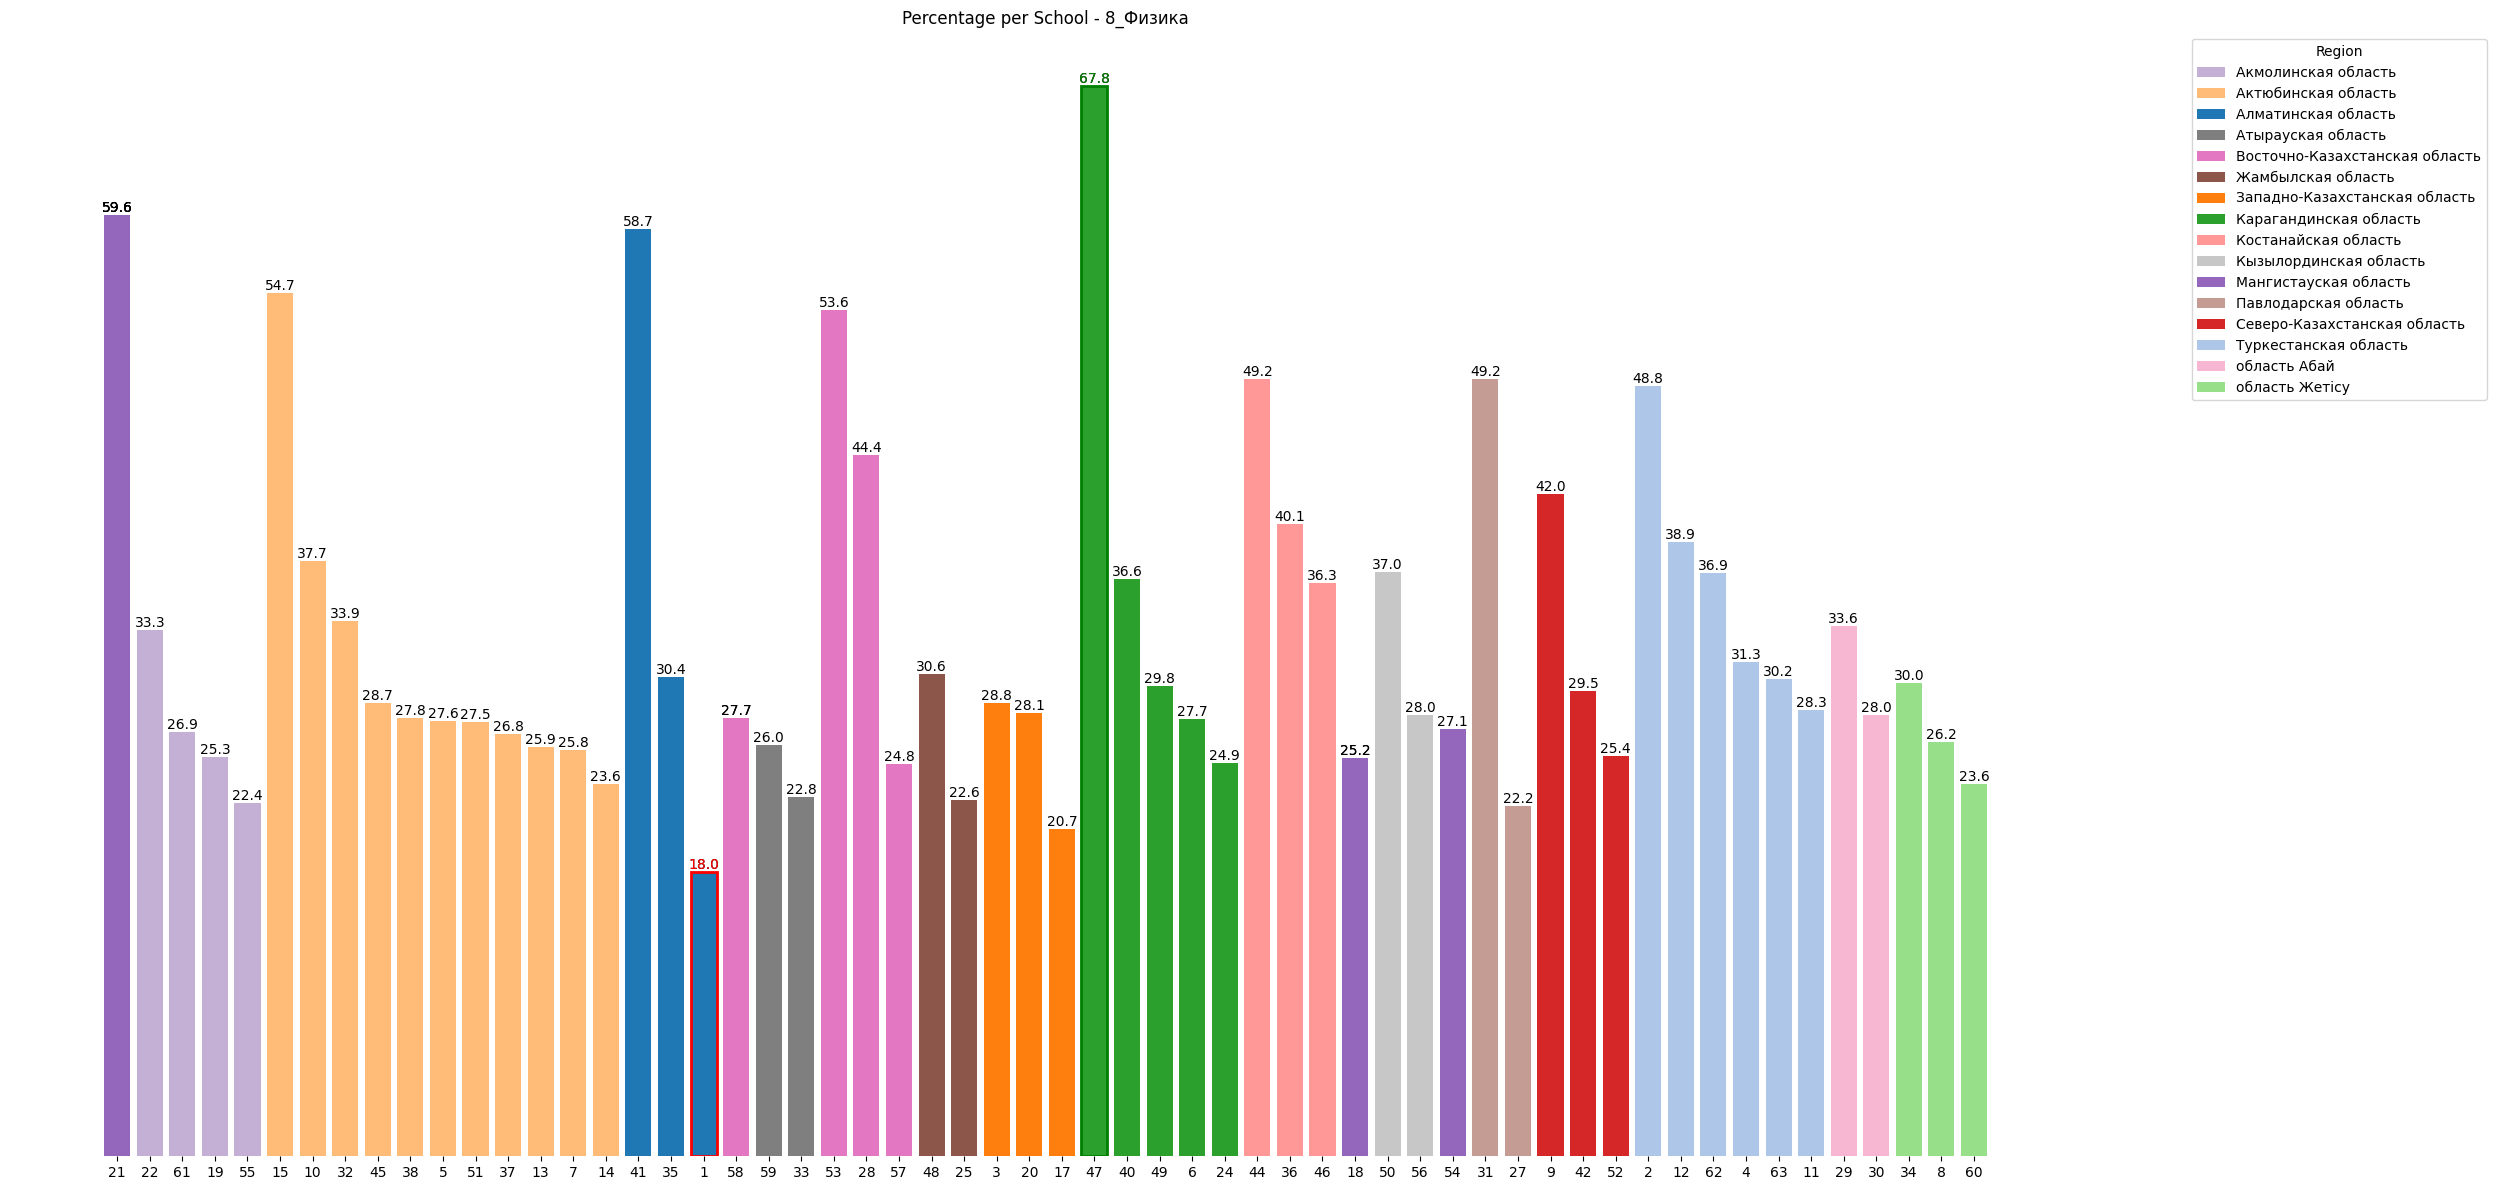

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


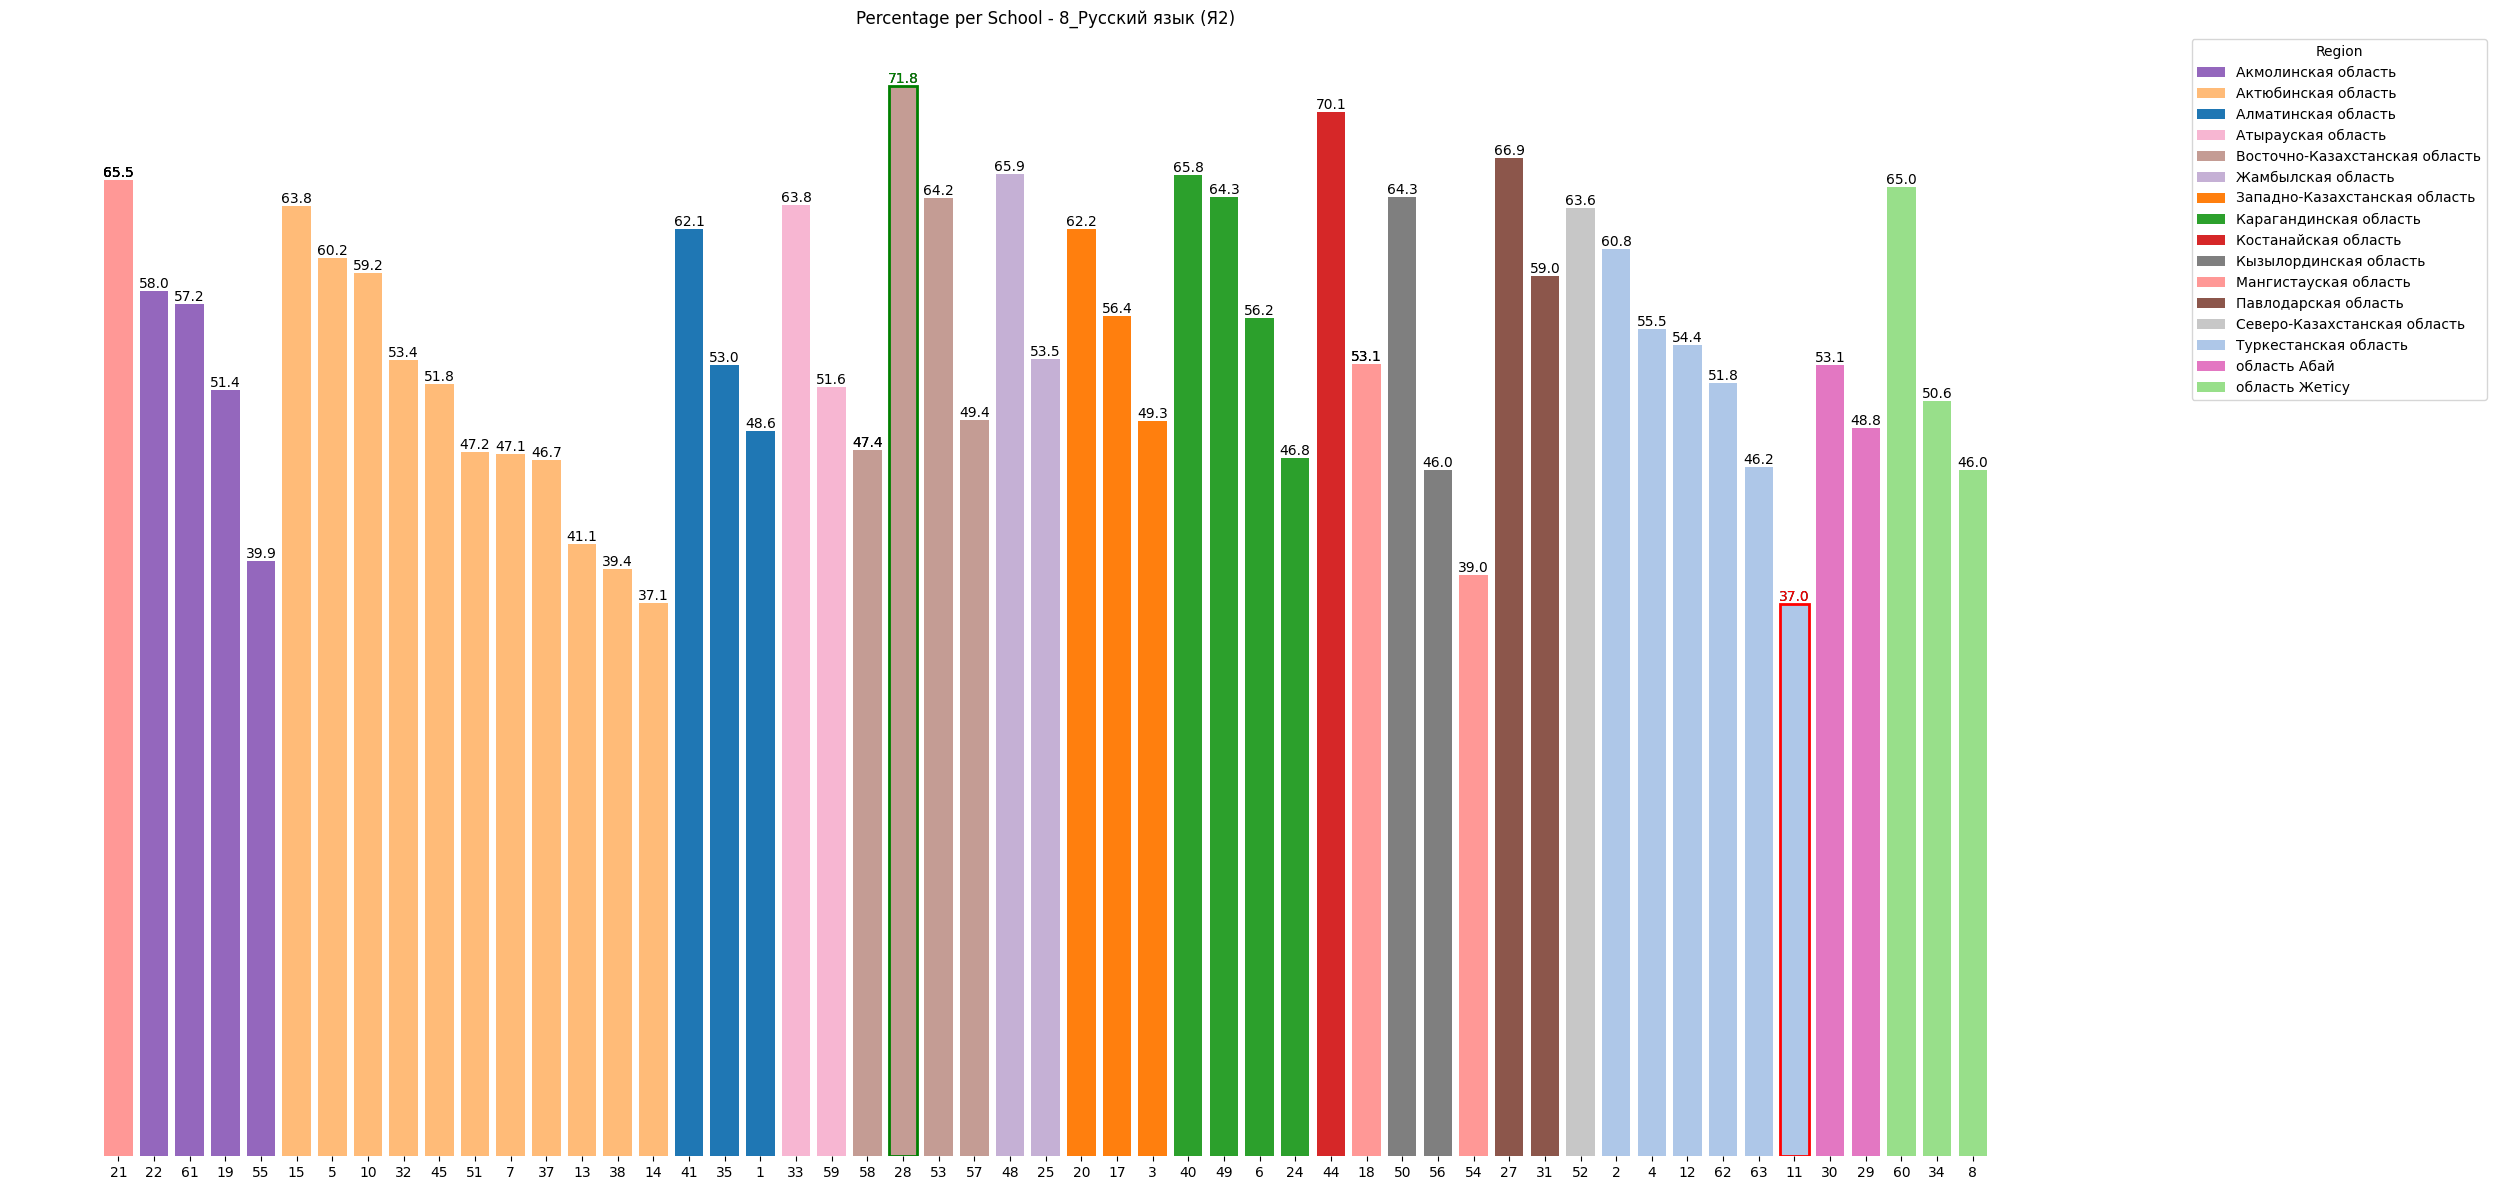

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


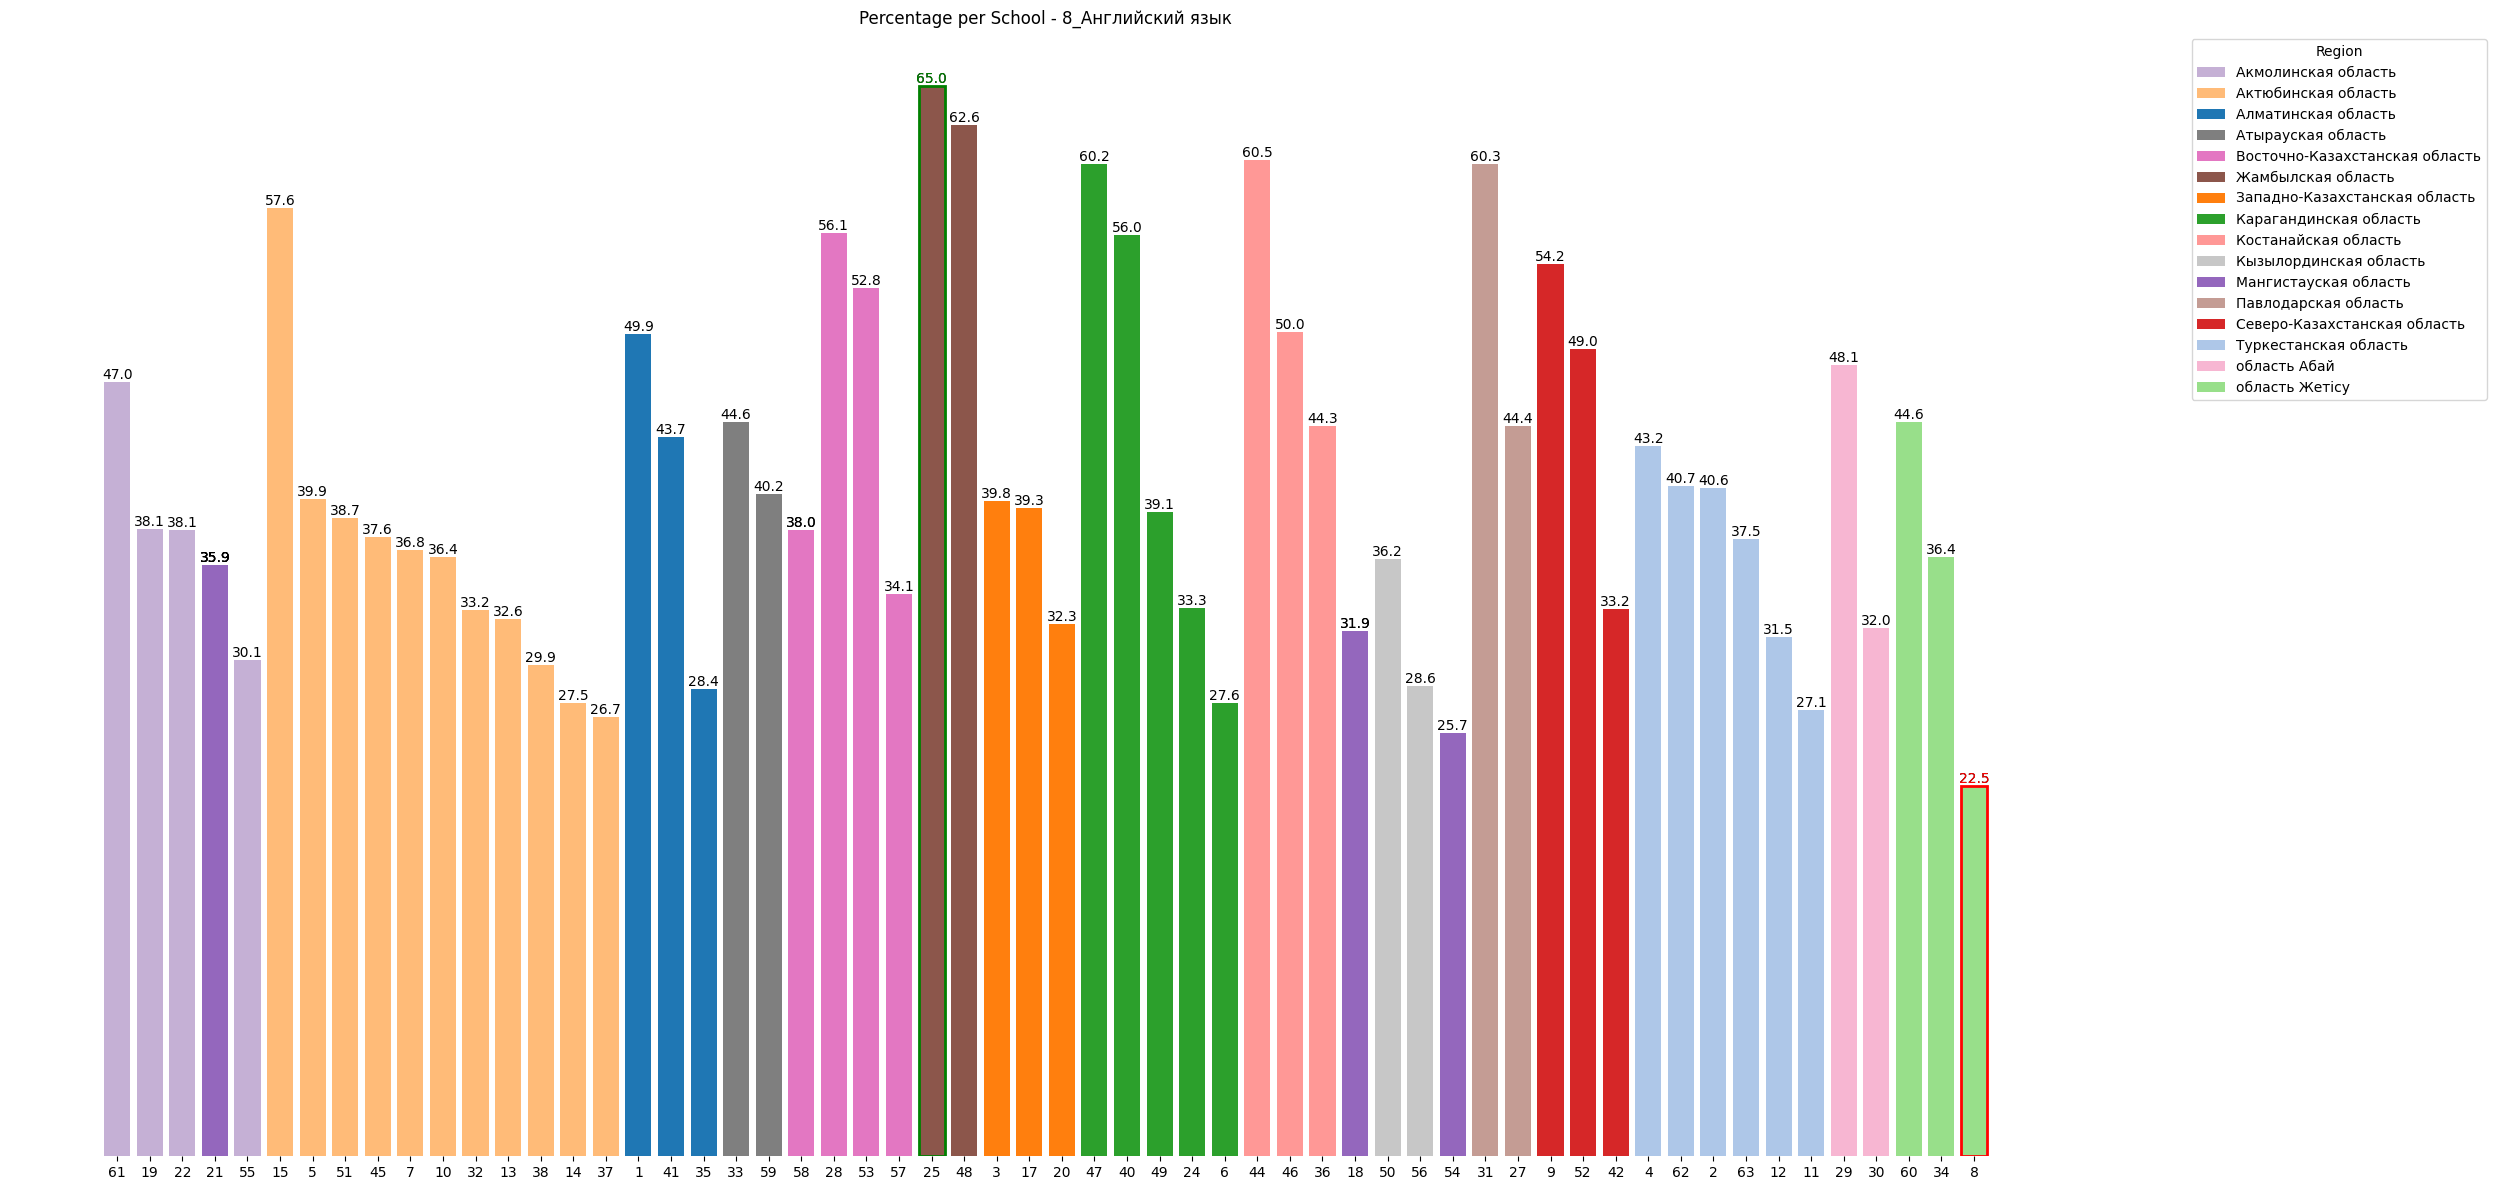

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


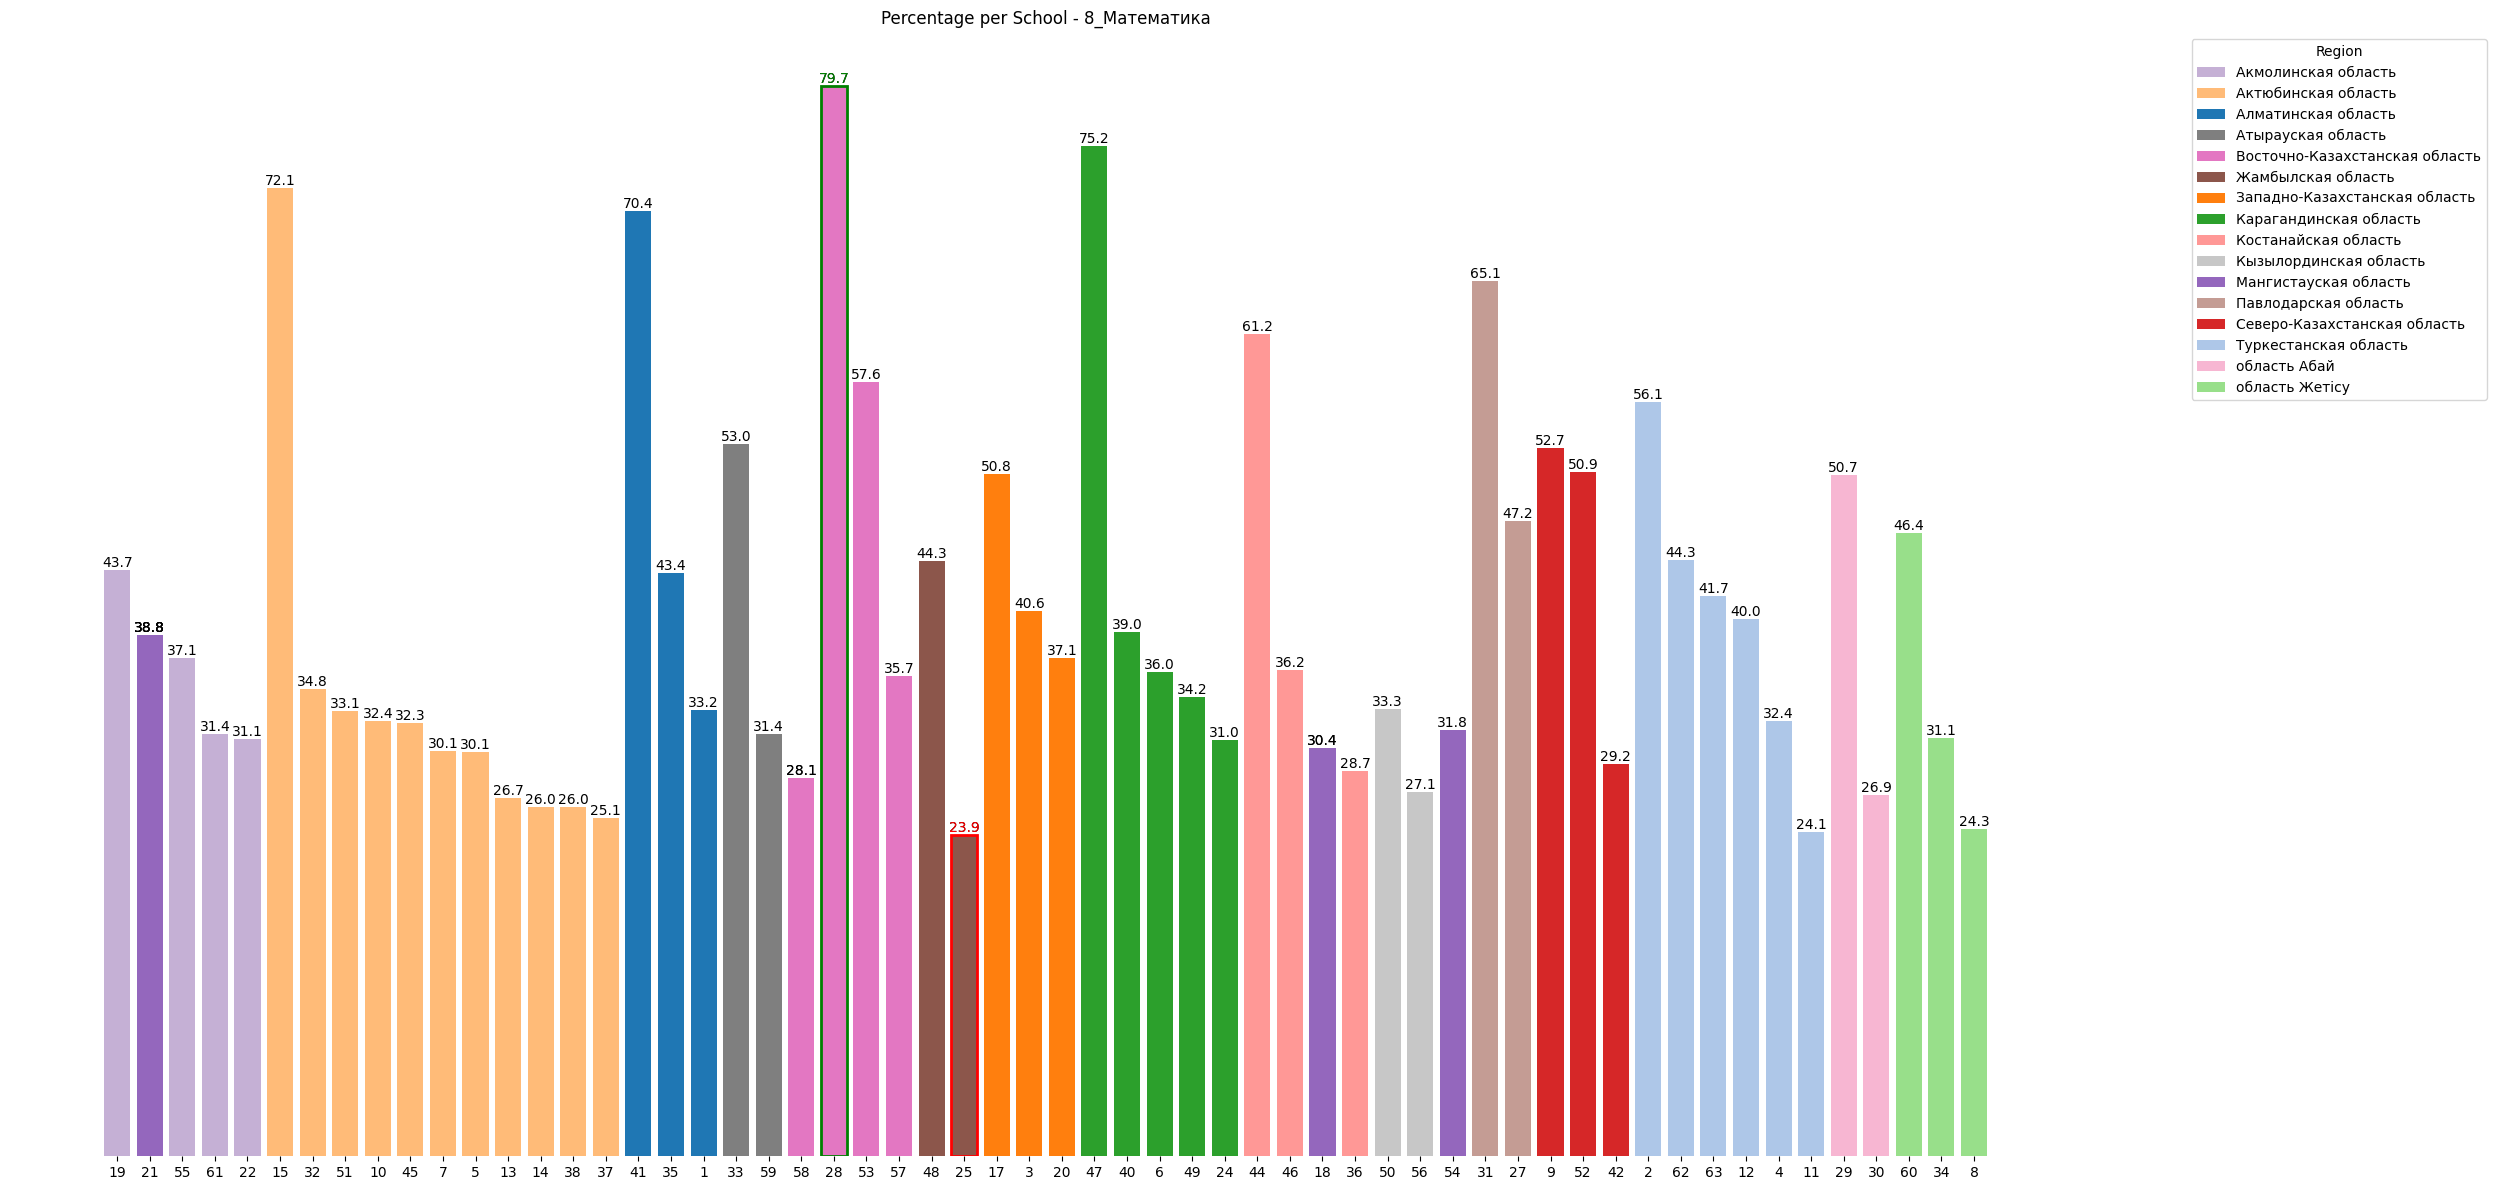

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


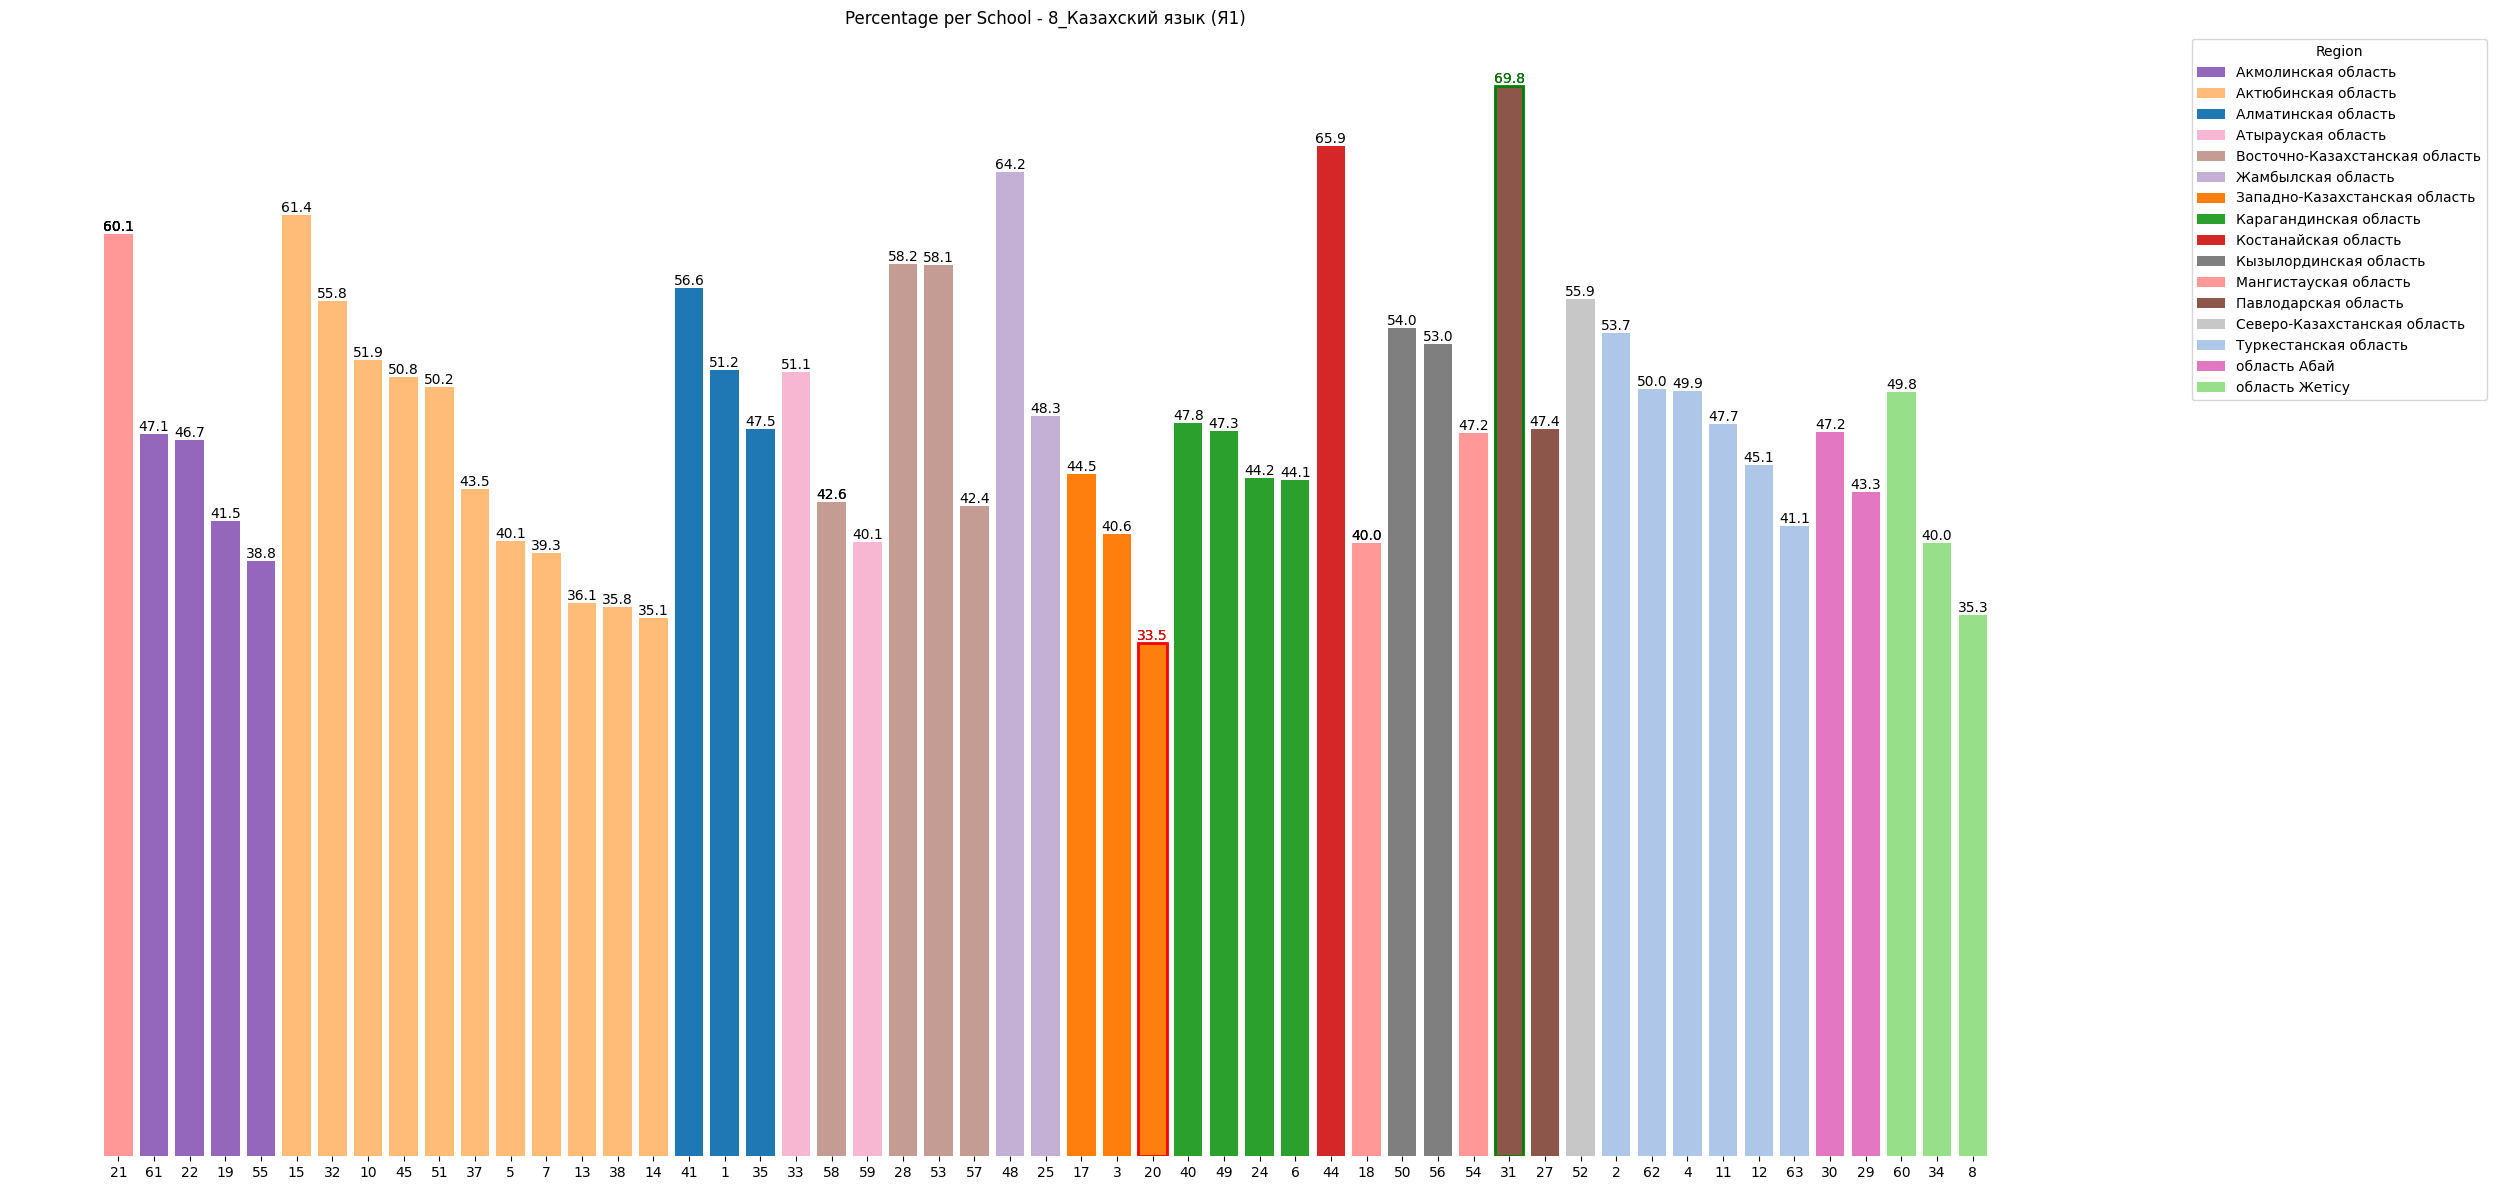

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


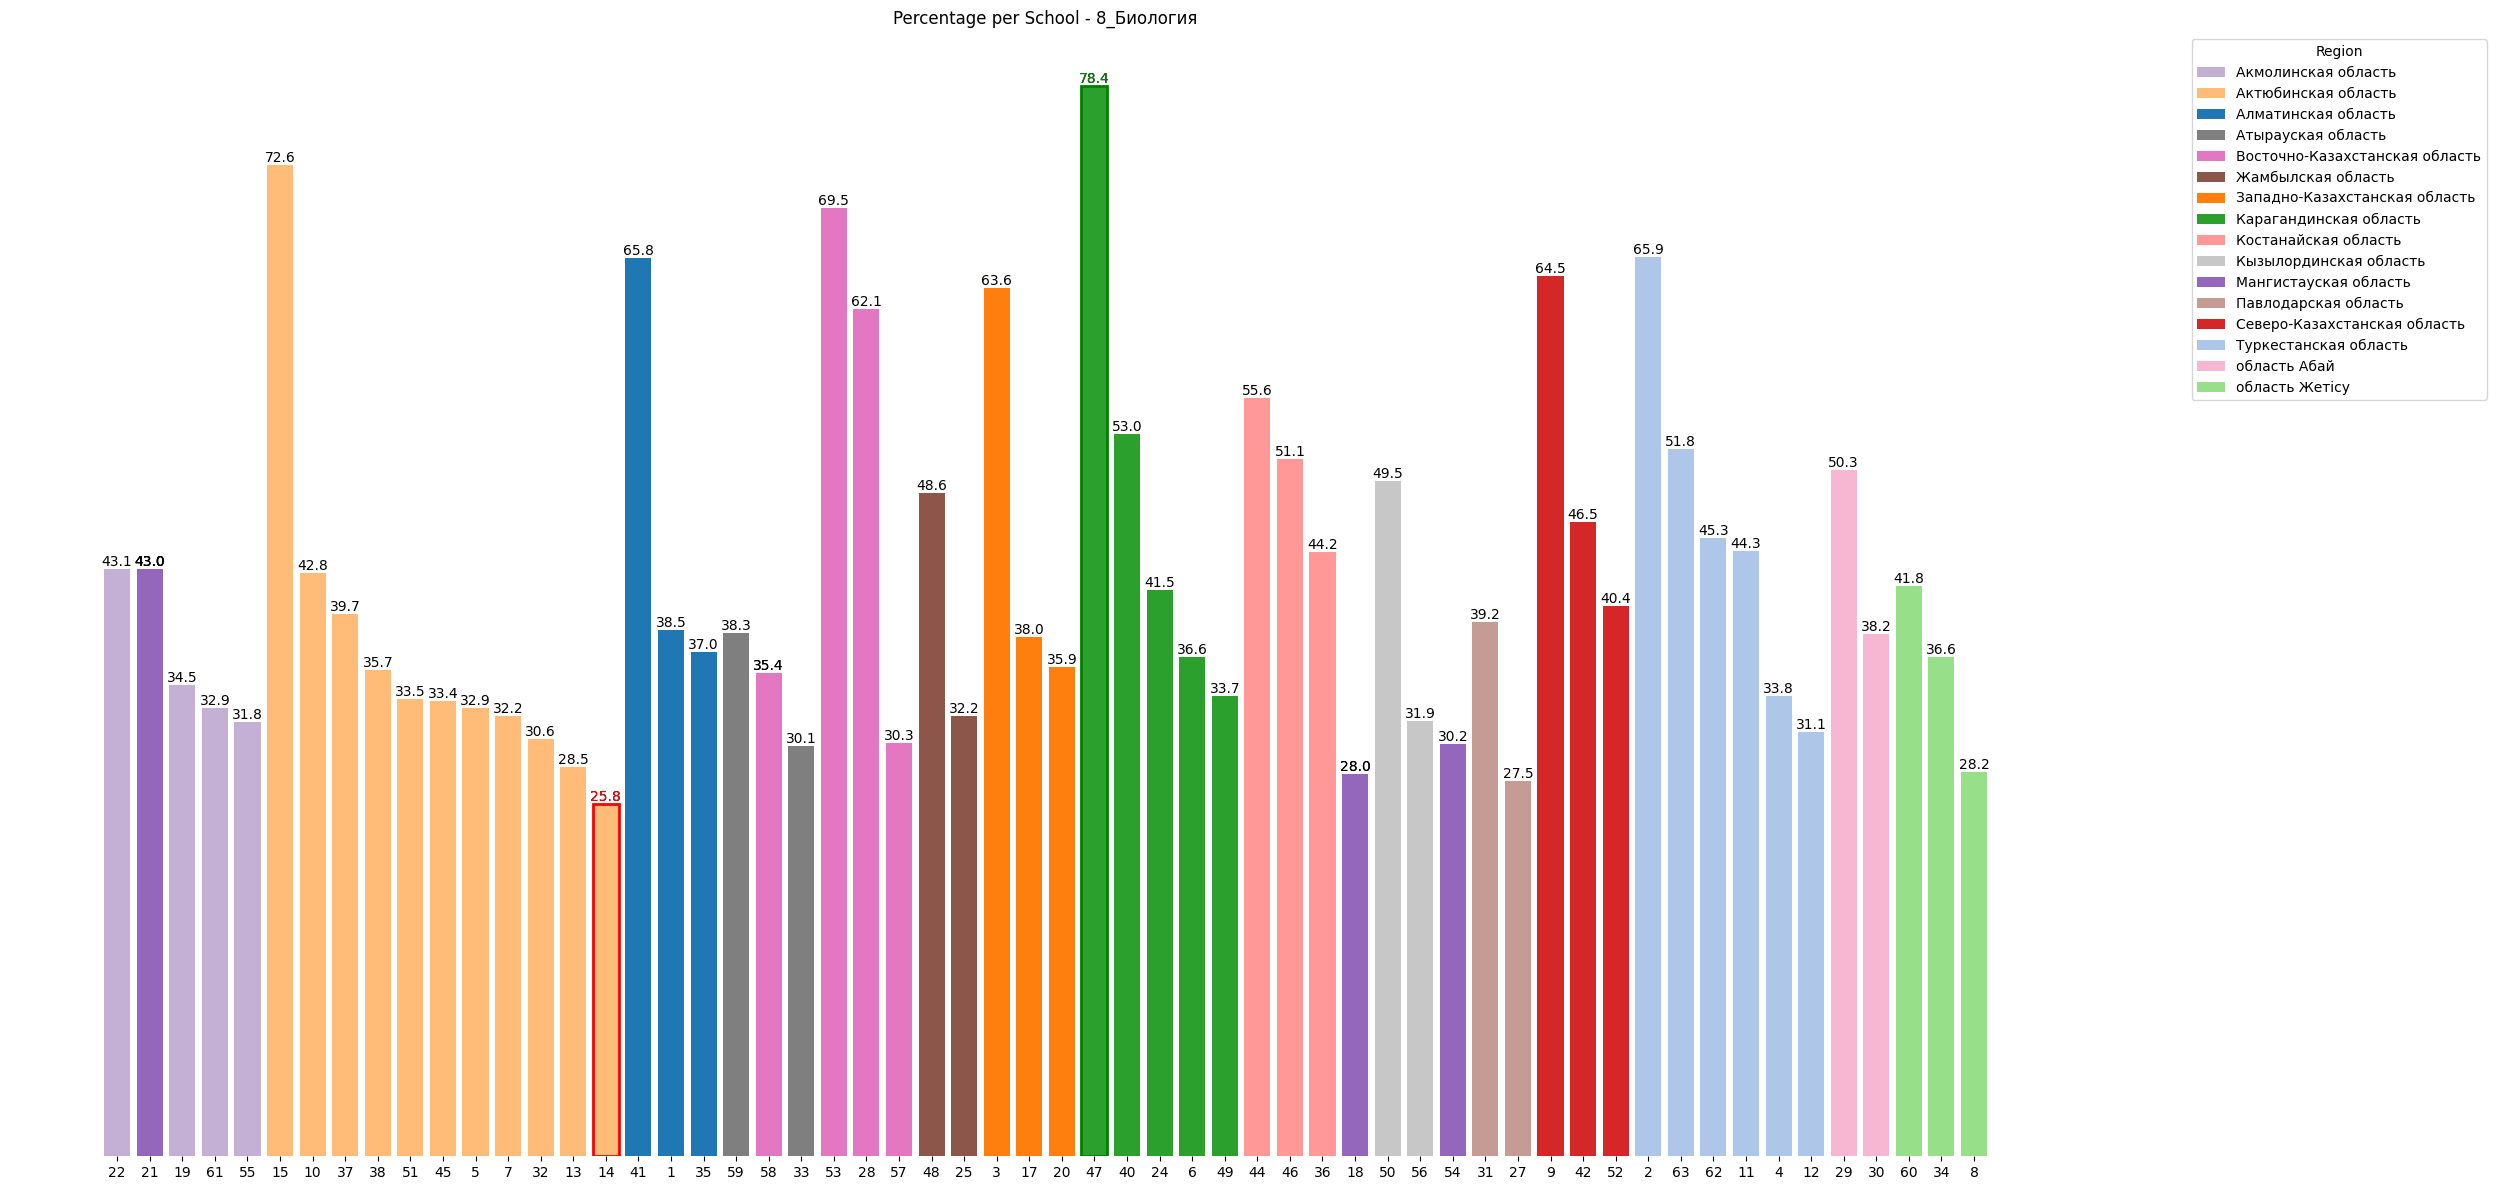

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


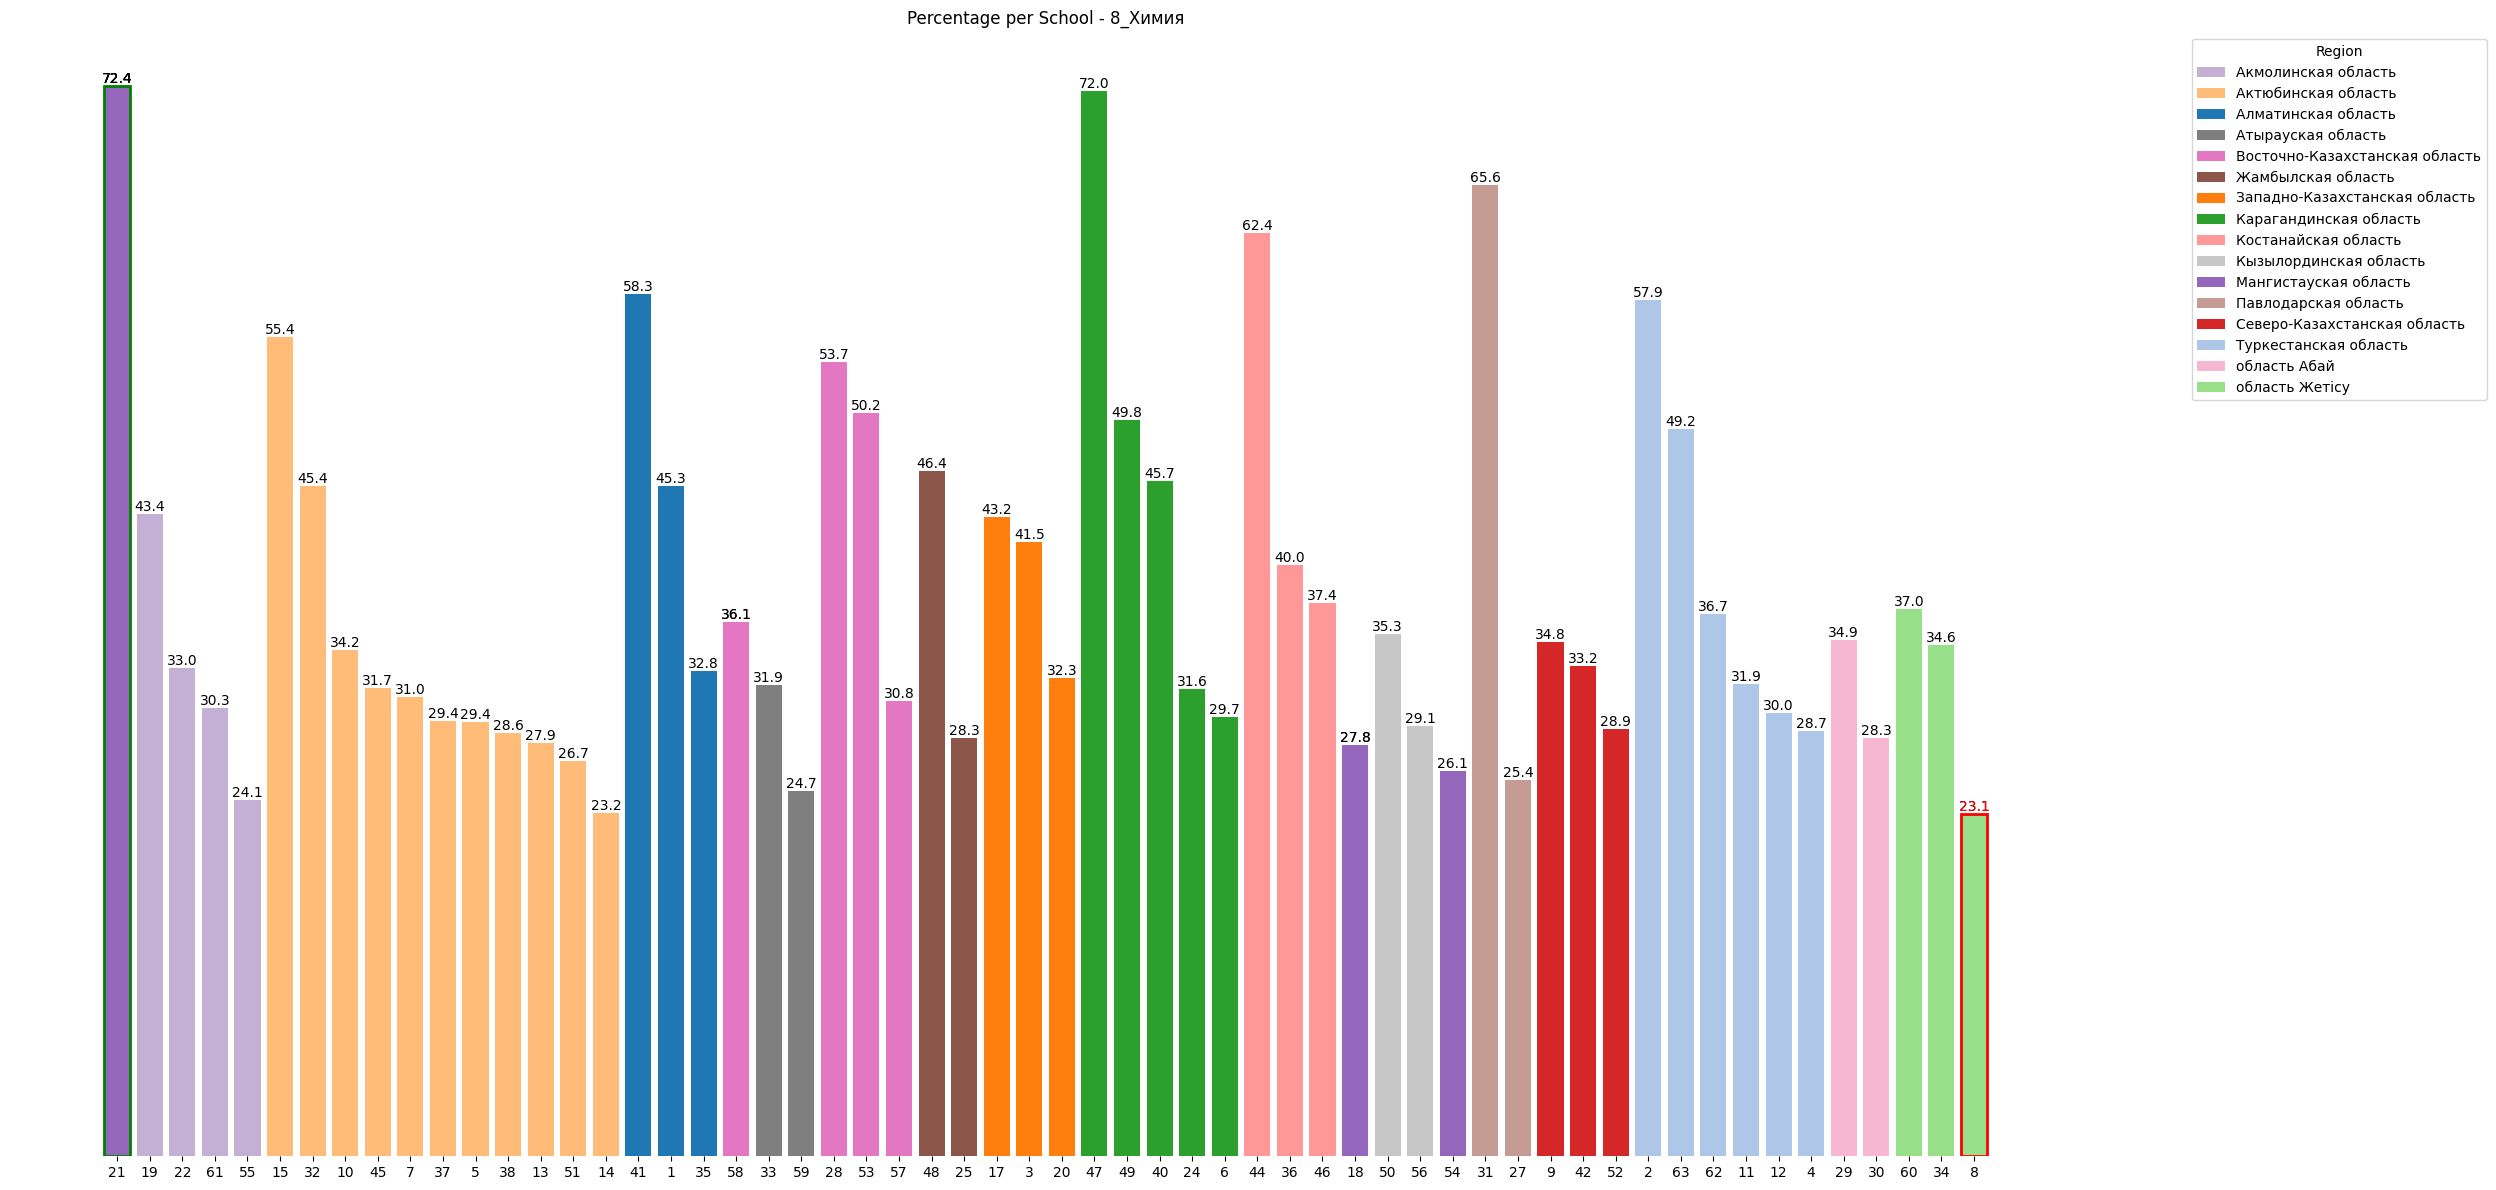

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


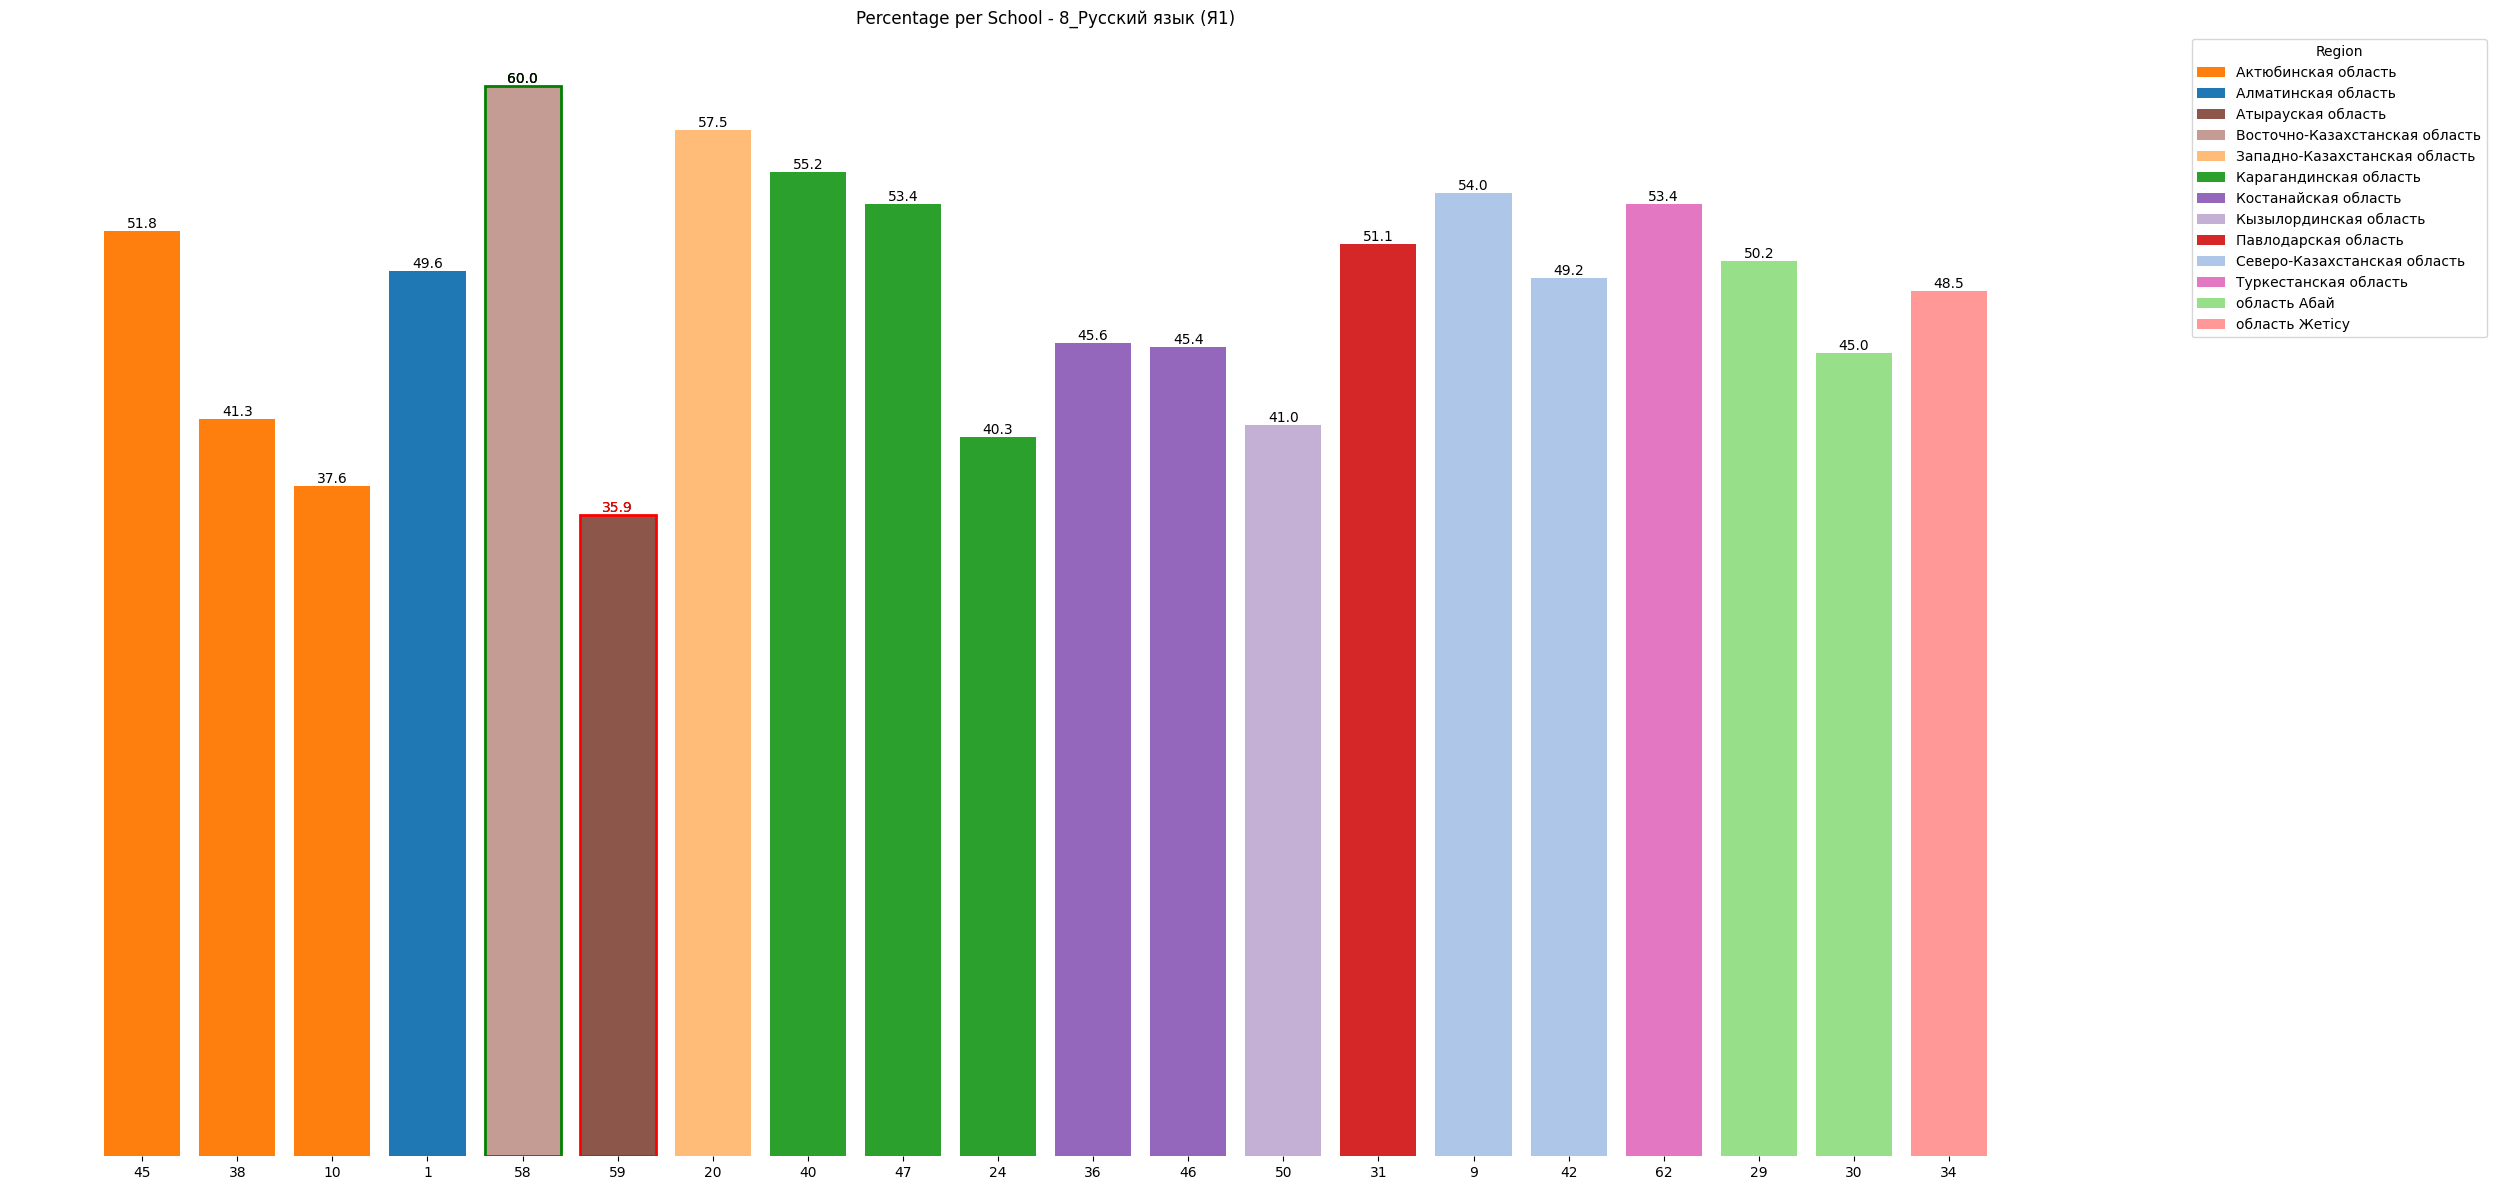

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


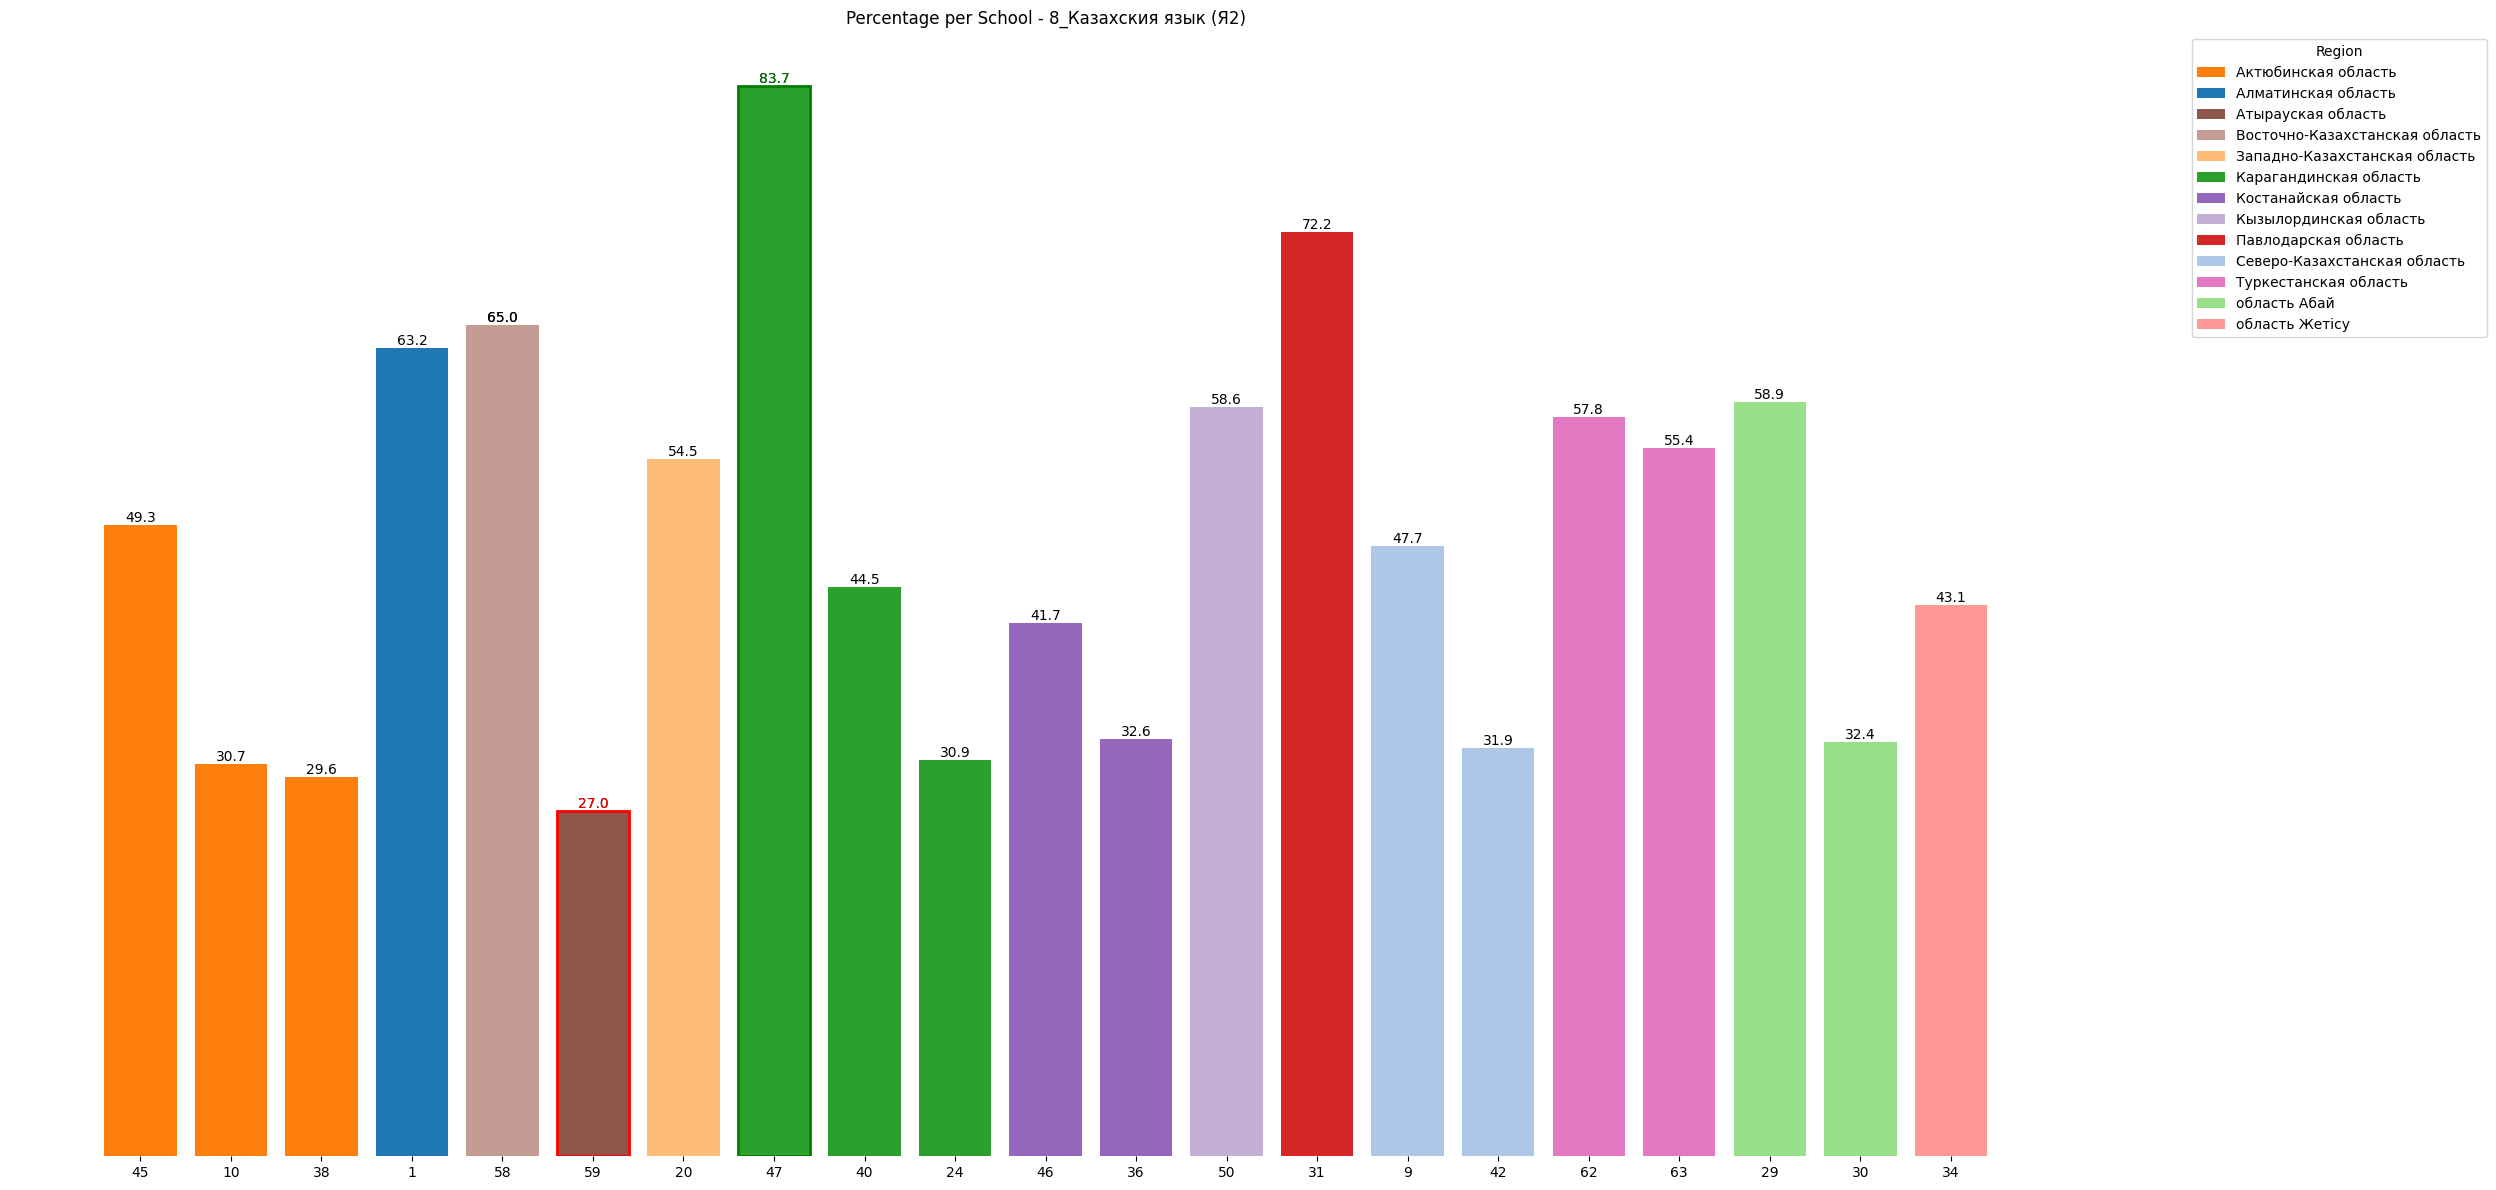

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


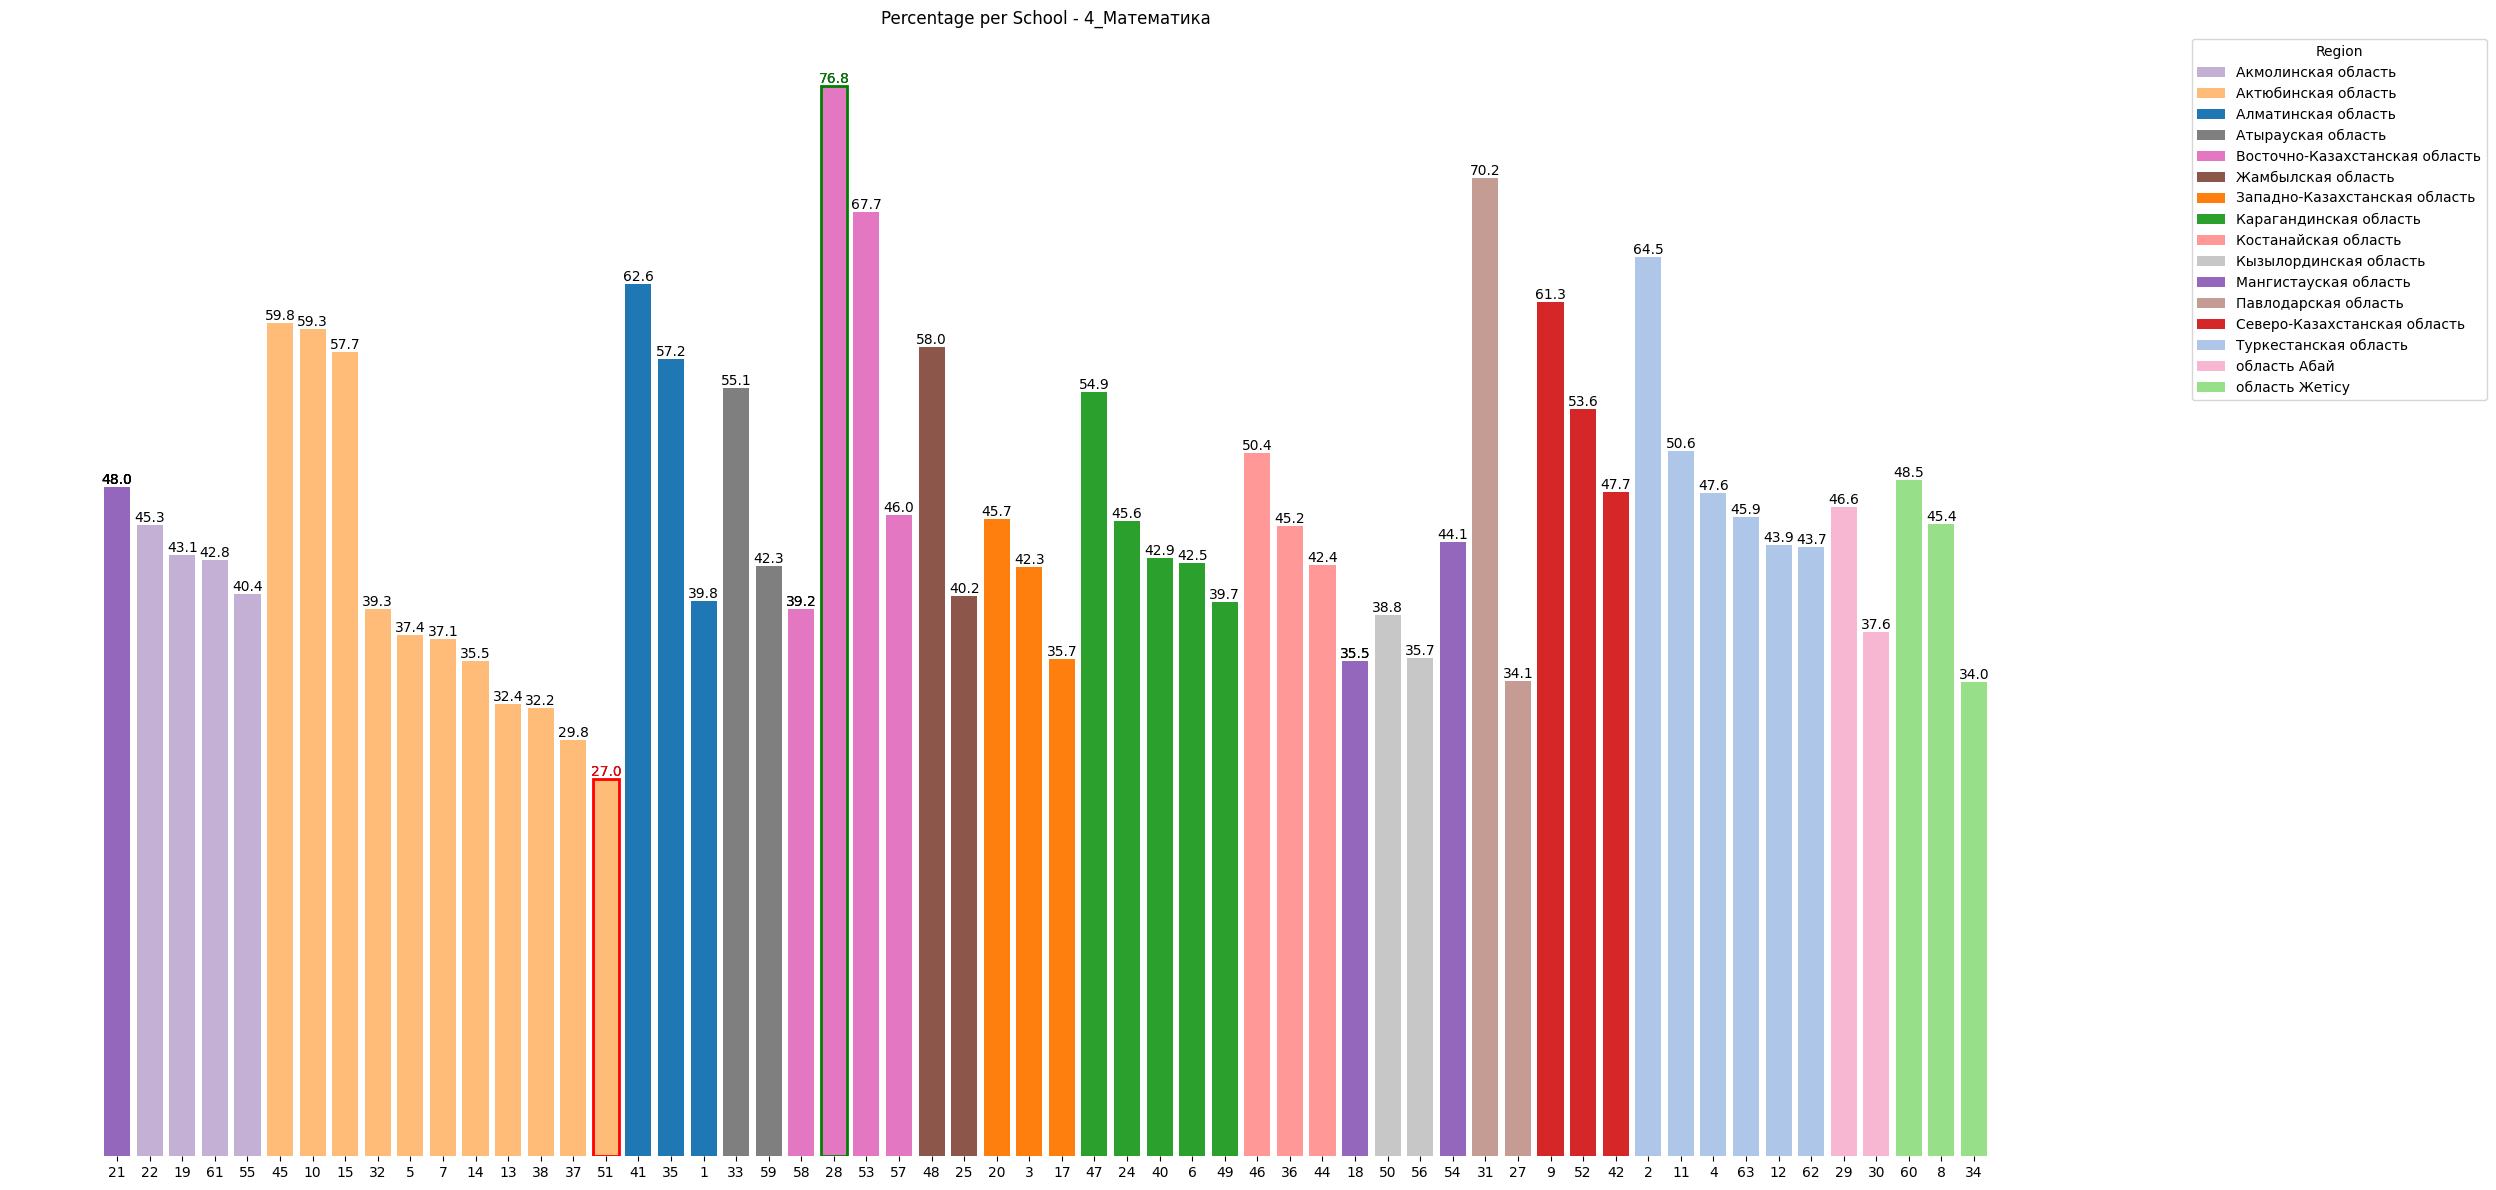

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


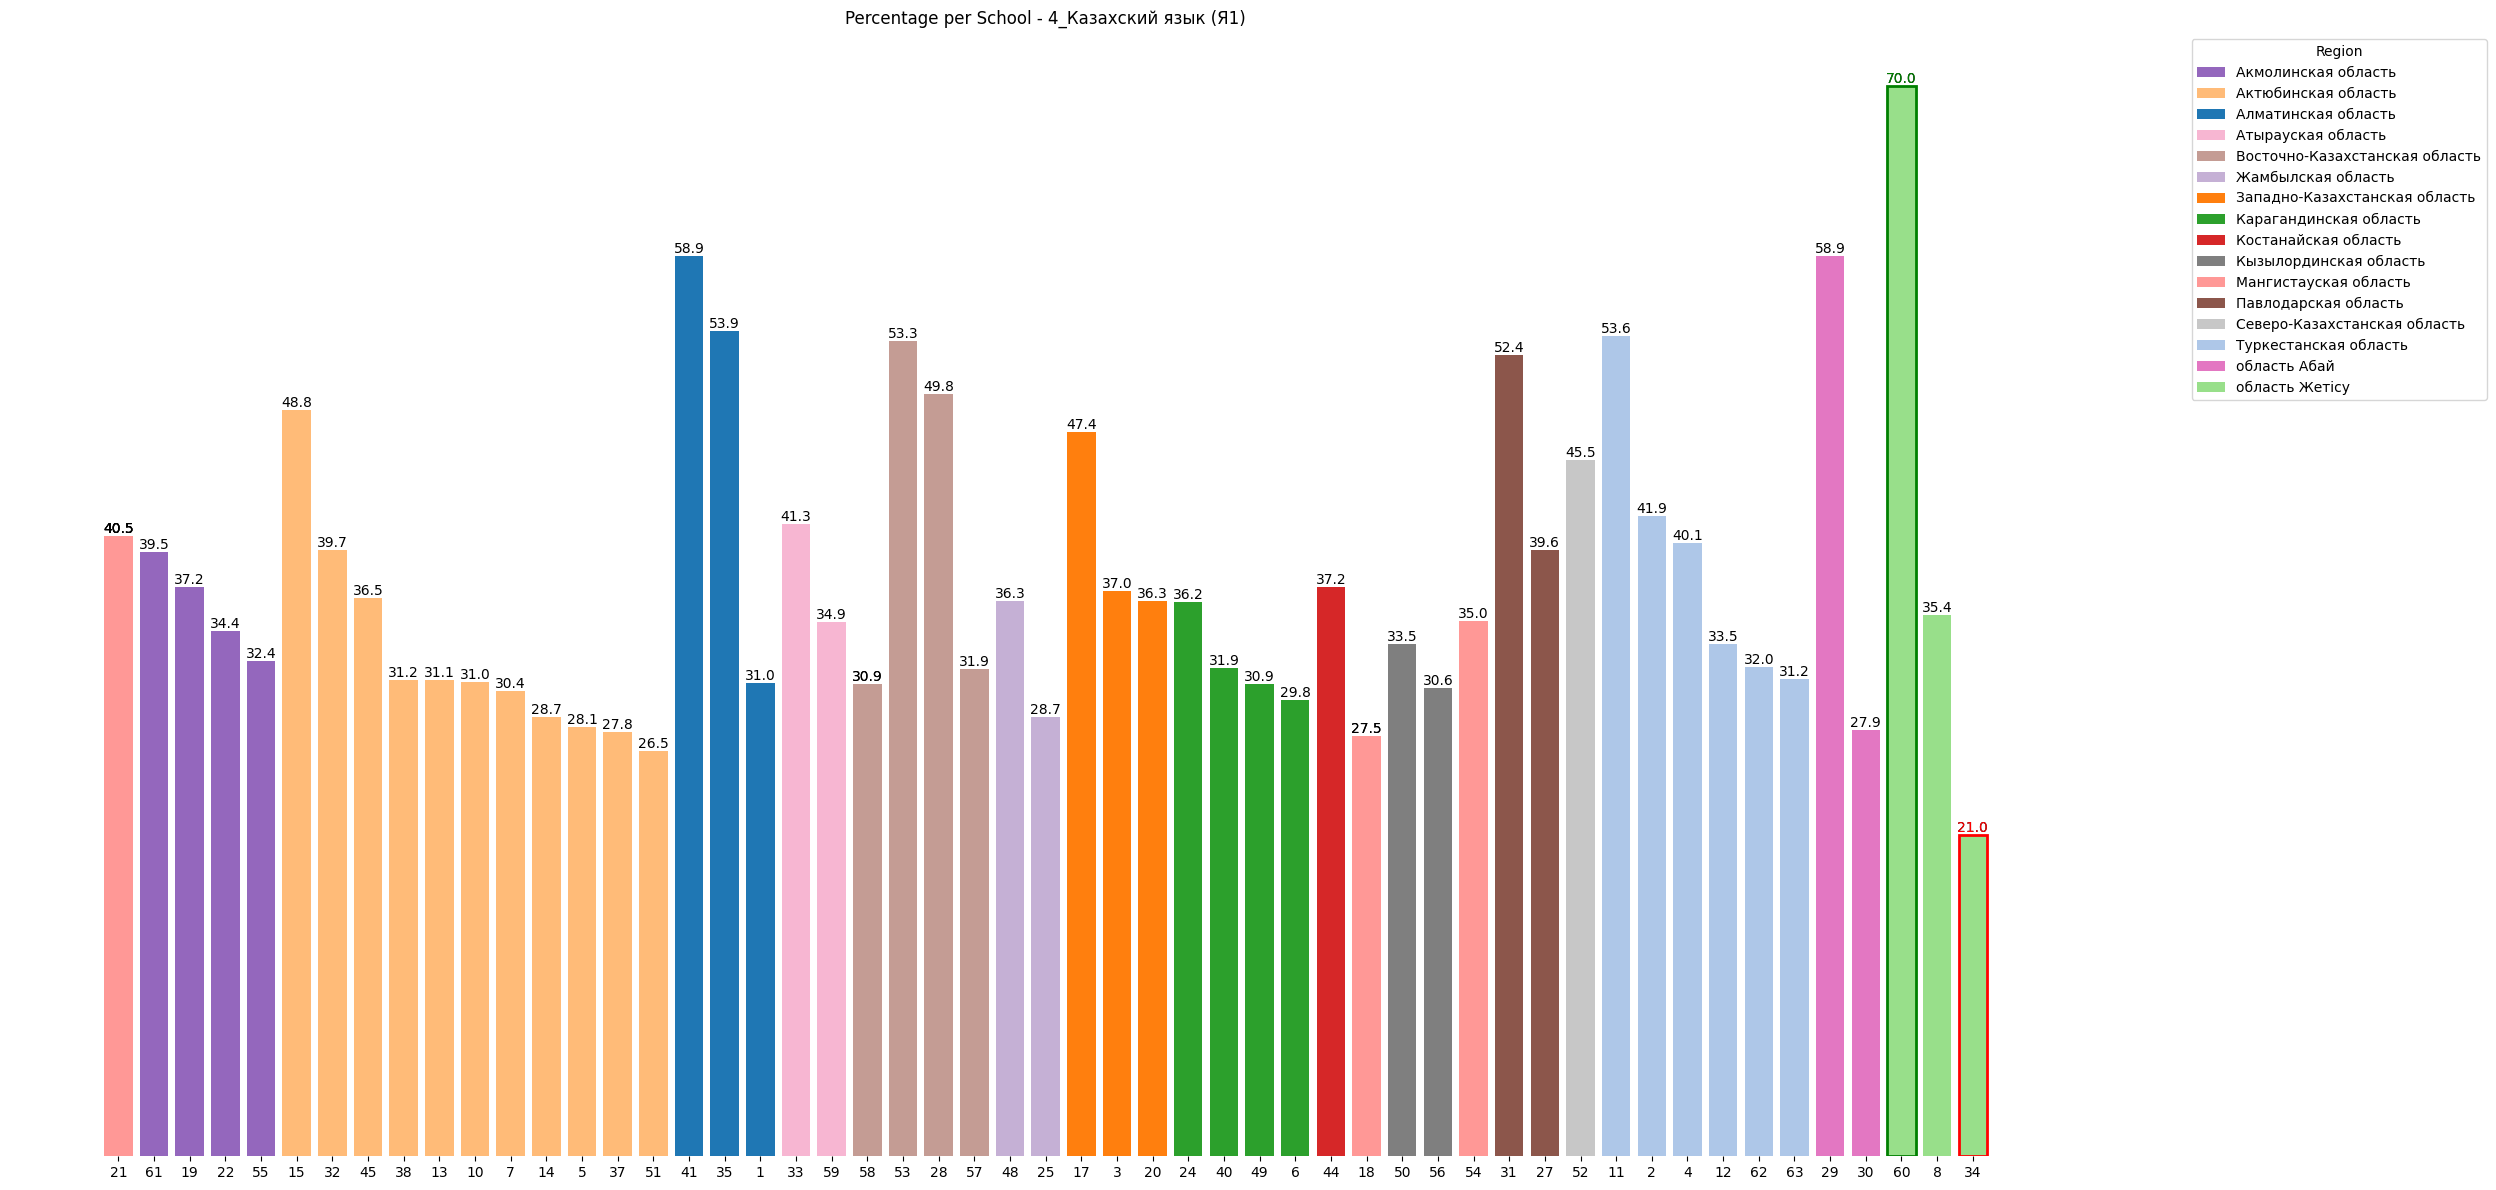

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


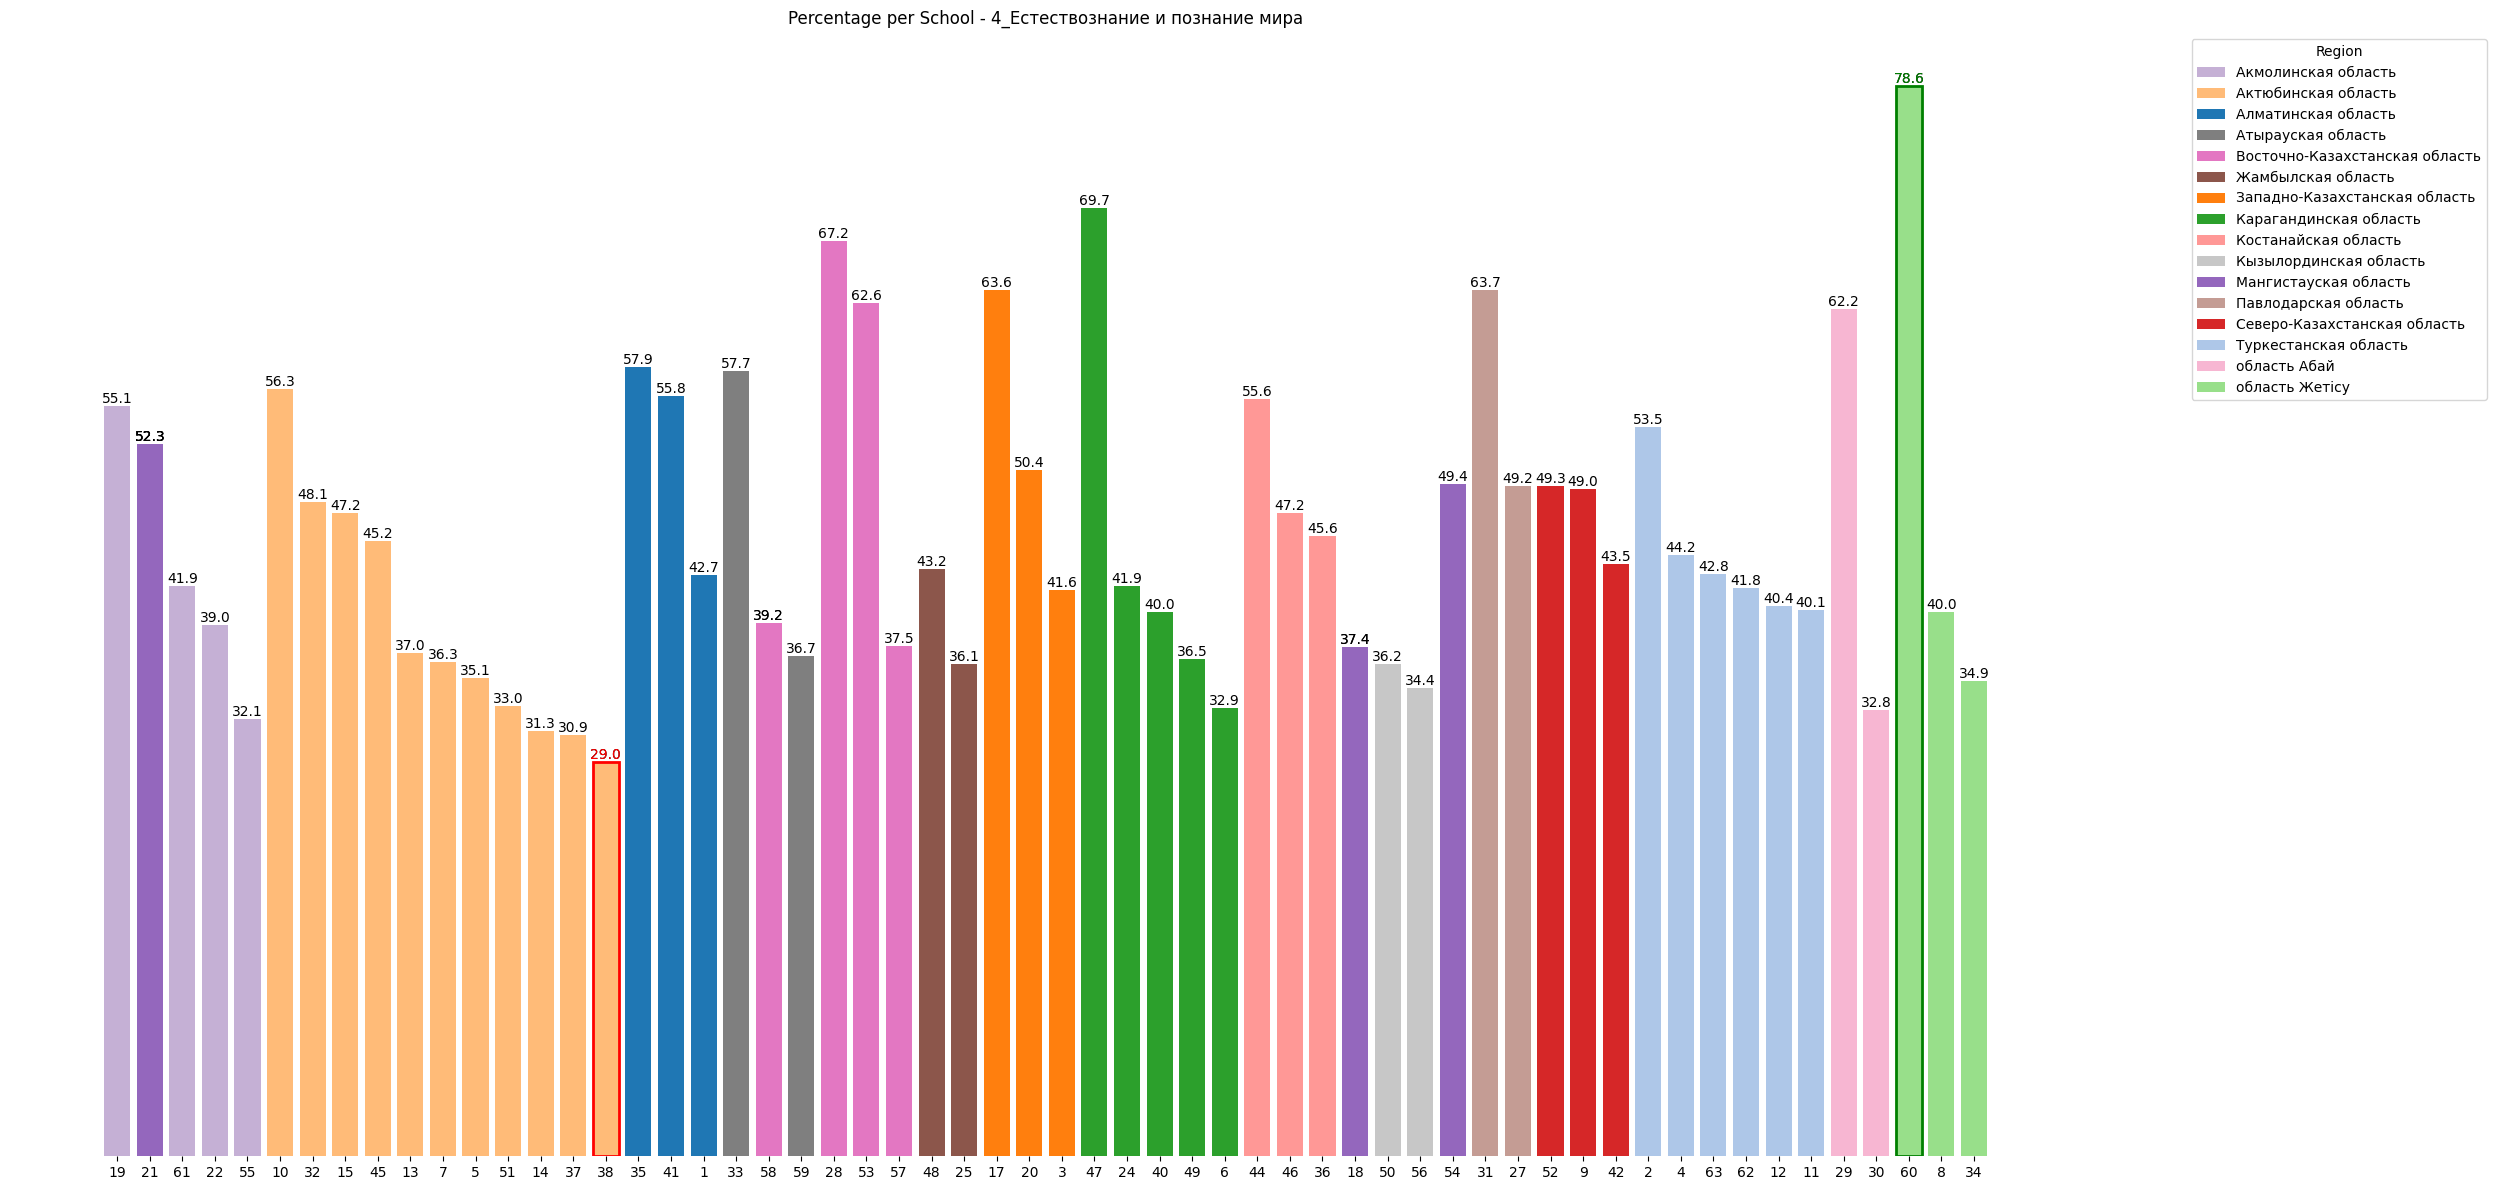

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1822360887.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


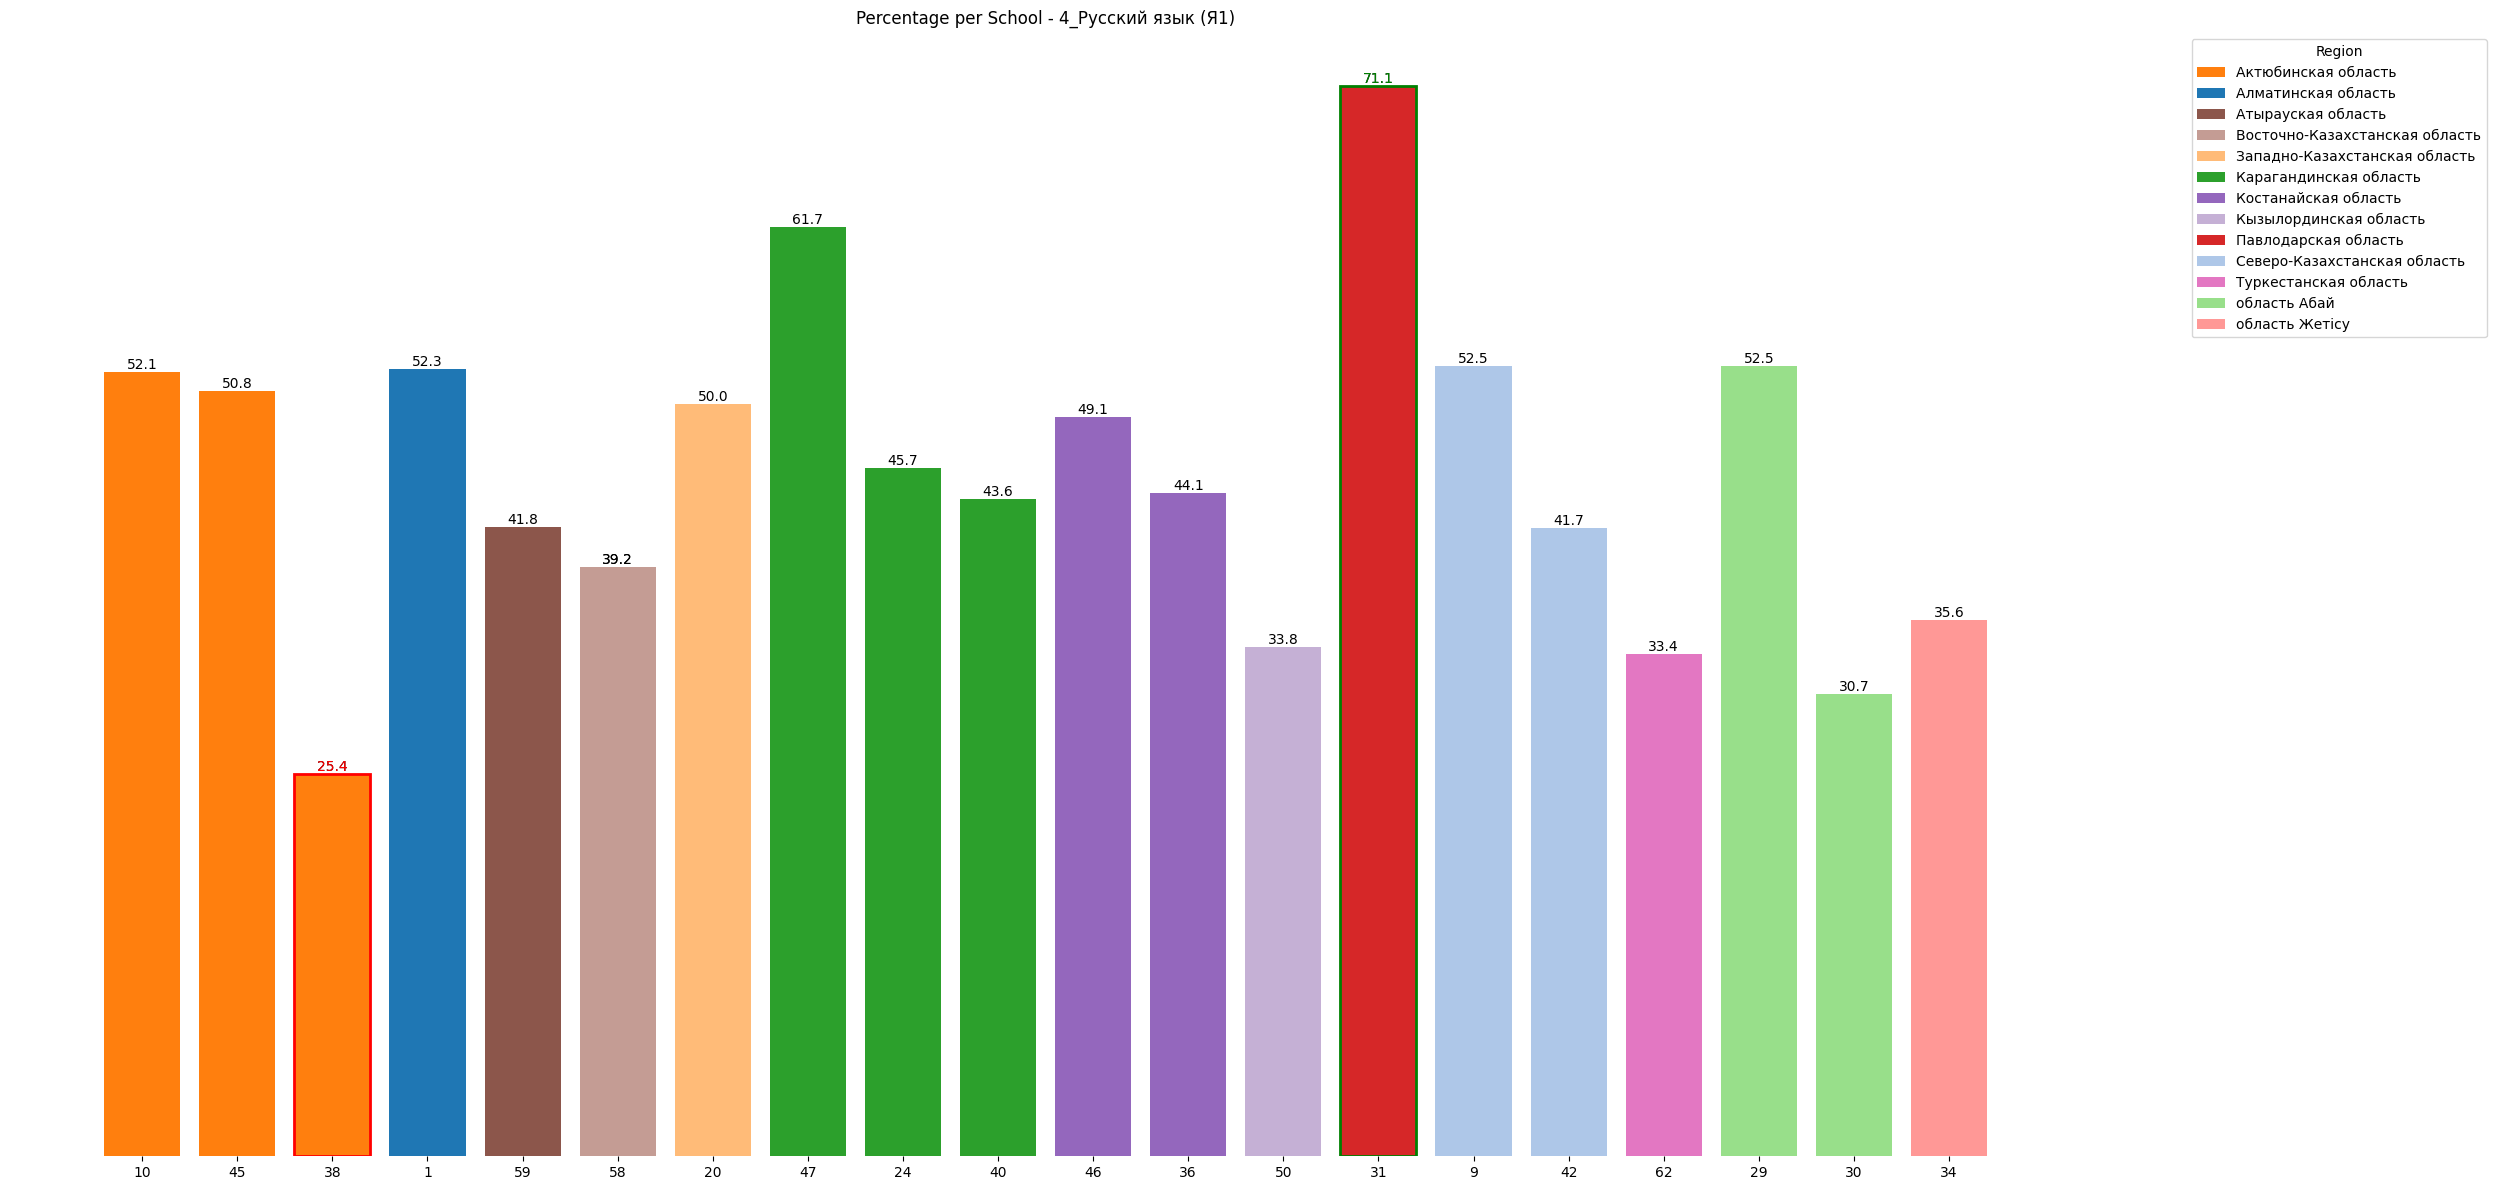

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assuming 'table' is a dictionary containing DataFrames

for table_name, df in tables.items():
    plt.figure(figsize=(25, 12))  # Adjust the figure size as needed for each chart
    df['school_id'] = df['school_id'].astype(str)
    
    # Replace NaN values in 'region' column with 'Unknown'
    df['region'].fillna('Unknown', inplace=True)

    regions = df['region'].unique()
    color_dict = {}

    for i, region in enumerate(regions):
        color_dict[region] = plt.cm.get_cmap('tab20')(i)

    # Exclude 'nan' string explicitly for plotting
    df_no_nan = df[df['region'] != 'nan']

    # Sorting the DataFrame by 'percent' in descending order within each 'region'
    df_sorted = df_no_nan.sort_values(by=['region', 'percent'], ascending=[True, False])

    for region, group in df_sorted.groupby('region'):
        if region in color_dict:
            bars = plt.bar(group['school_id'], group['percent'], label=region, color=color_dict[region])
        else:
            bars = plt.bar(group['school_id'], group['percent'], label=region)
    
    # Iterate through bars to find the maximum and minimum values across all regions
    all_bars = [bar for sublist in [container for container in plt.gca().containers] for bar in sublist]
    max_bar = max(all_bars, key=lambda x: x.get_height())
    min_bar = min(all_bars, key=lambda x: x.get_height())
    
    for bar in all_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                 ha='center', va='bottom', 
                 color='black')
        # Set the highest data label to green and the lowest to red
        if bar == max_bar:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                     ha='center', va='bottom', 
                     color='green')
        elif bar == min_bar:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                     ha='center', va='bottom', 
                     color='red')

    # Highlighting the max and min bars with rectangles
    max_rect = patches.Rectangle((max_bar.get_x(), 0), 
                                 max_bar.get_width(), max_bar.get_height(), 
                                 edgecolor='green', facecolor='none', lw=2, zorder=5)
    min_rect = patches.Rectangle((min_bar.get_x(), 0), 
                                 min_bar.get_width(), min_bar.get_height(), 
                                 edgecolor='red', facecolor='none', lw=2, zorder=5)

    plt.gca().add_patch(max_rect)
    plt.gca().add_patch(min_rect)
    
    plt.xlabel('')
    plt.title(f'Percentage per School - {table_name}')
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tick_params(axis='y', labelleft=False)  # Remove y-axis labels
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(axis='y', linestyle='')  # Remove grid lines along the y-axis
    plt.box(False)  # Remove box border around the plot
    plt.tight_layout()
    plt.savefig(rf"C:\Users\kassenov_r\report-automation\suburban_schools\presentation\images\{table_name}.png")
    plt.show()

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


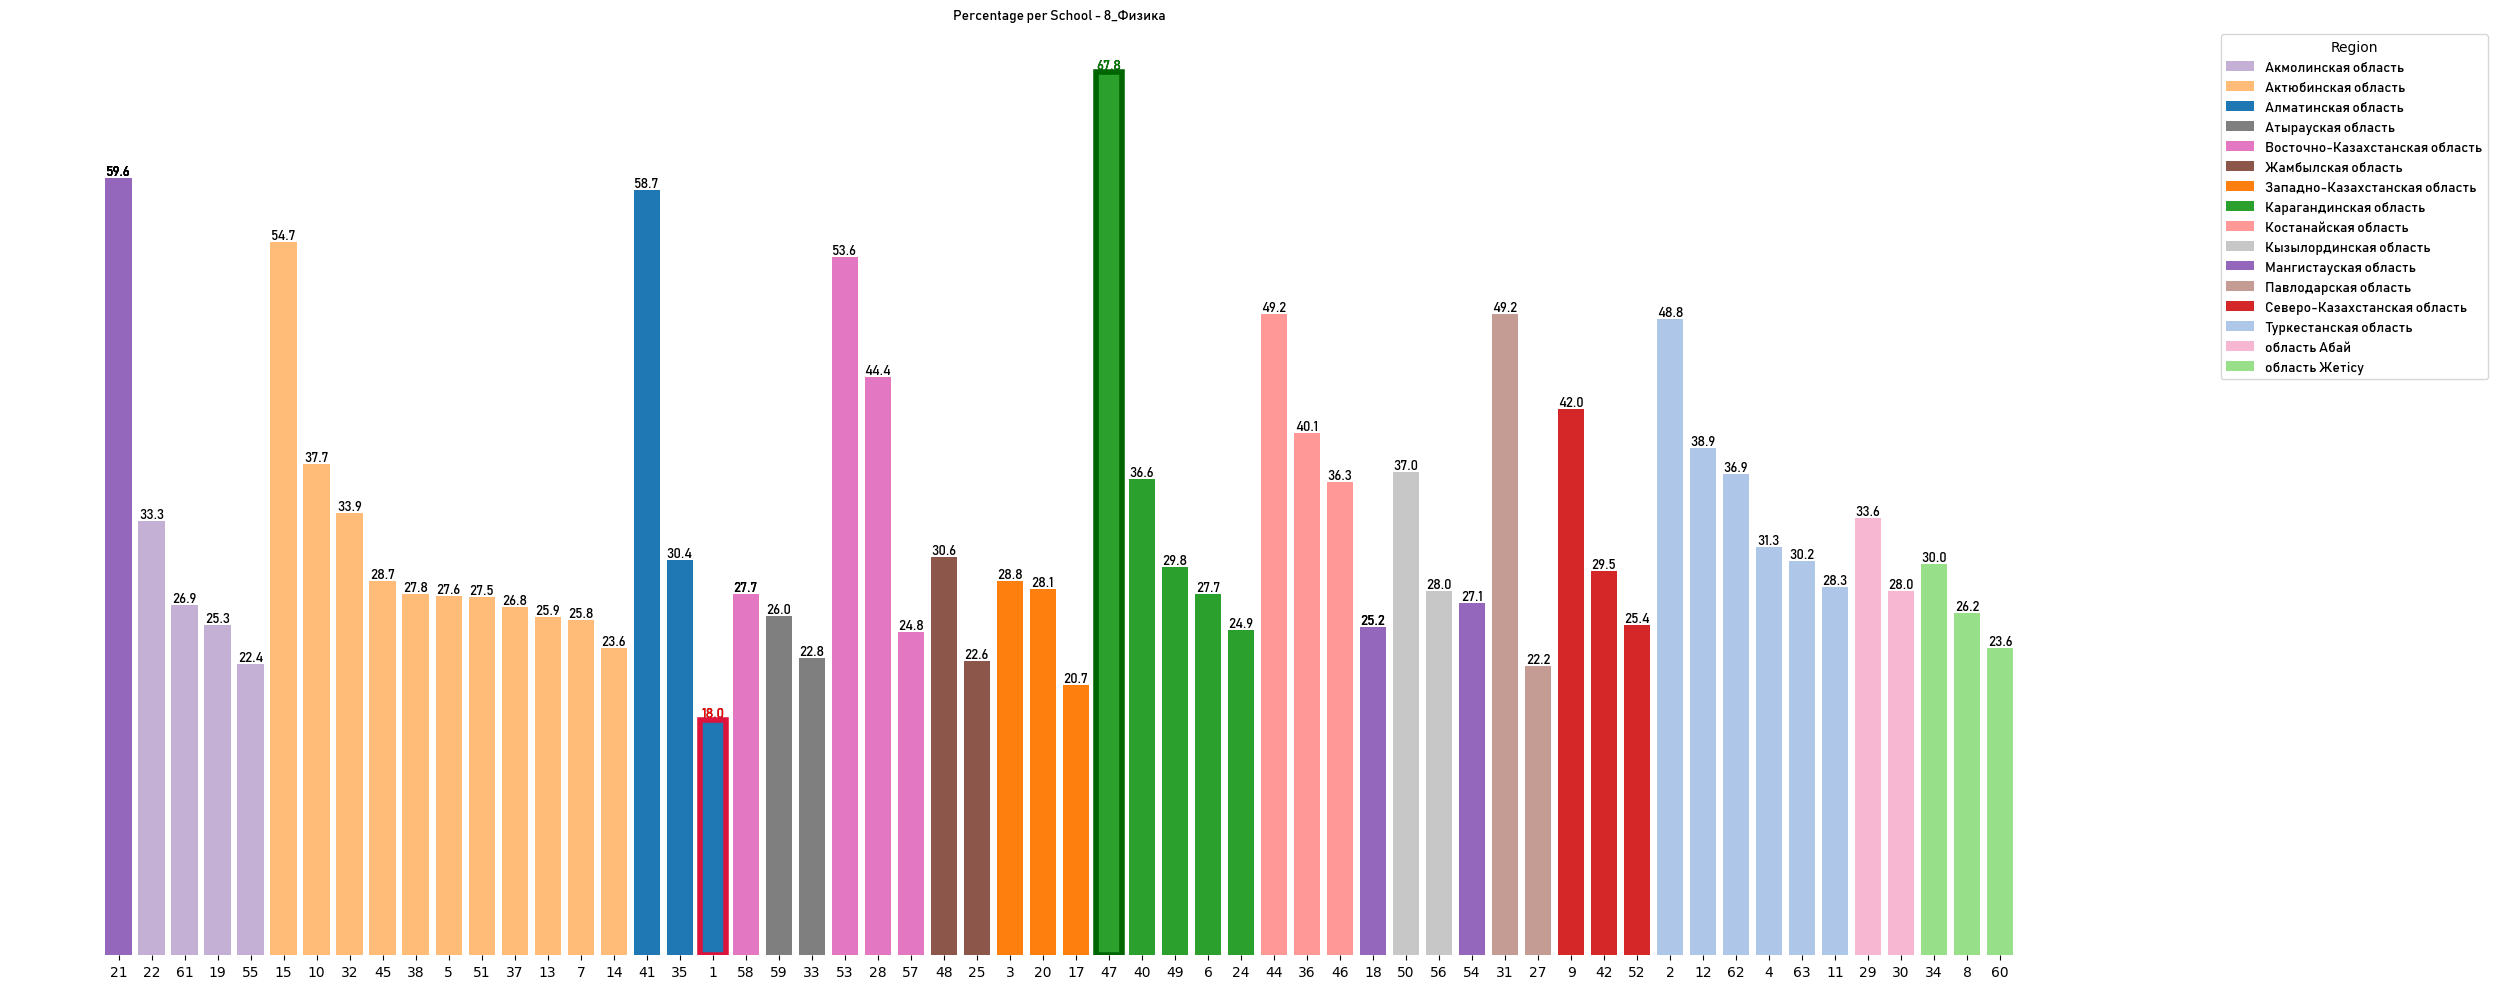

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


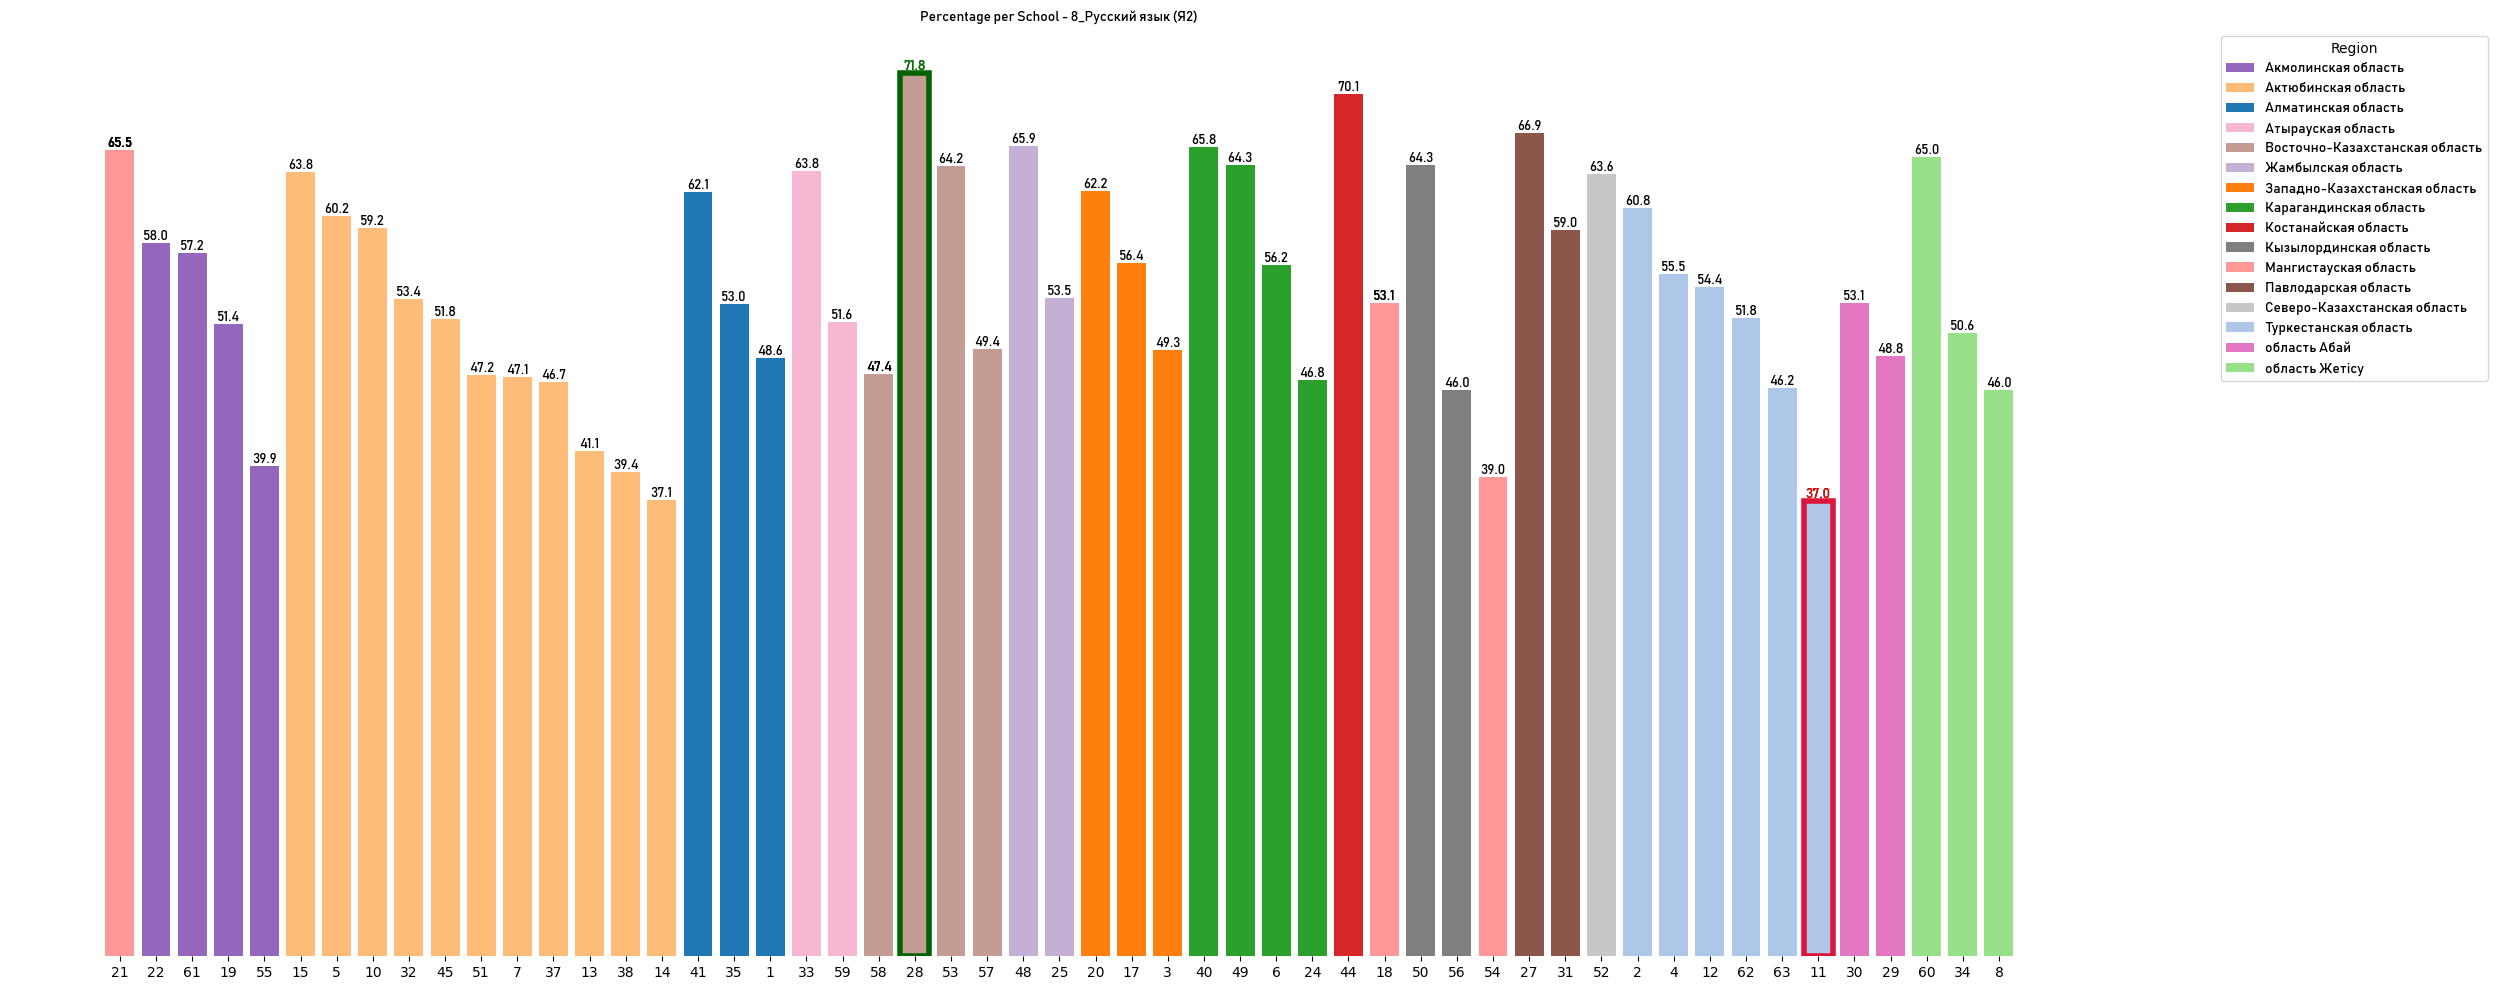

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


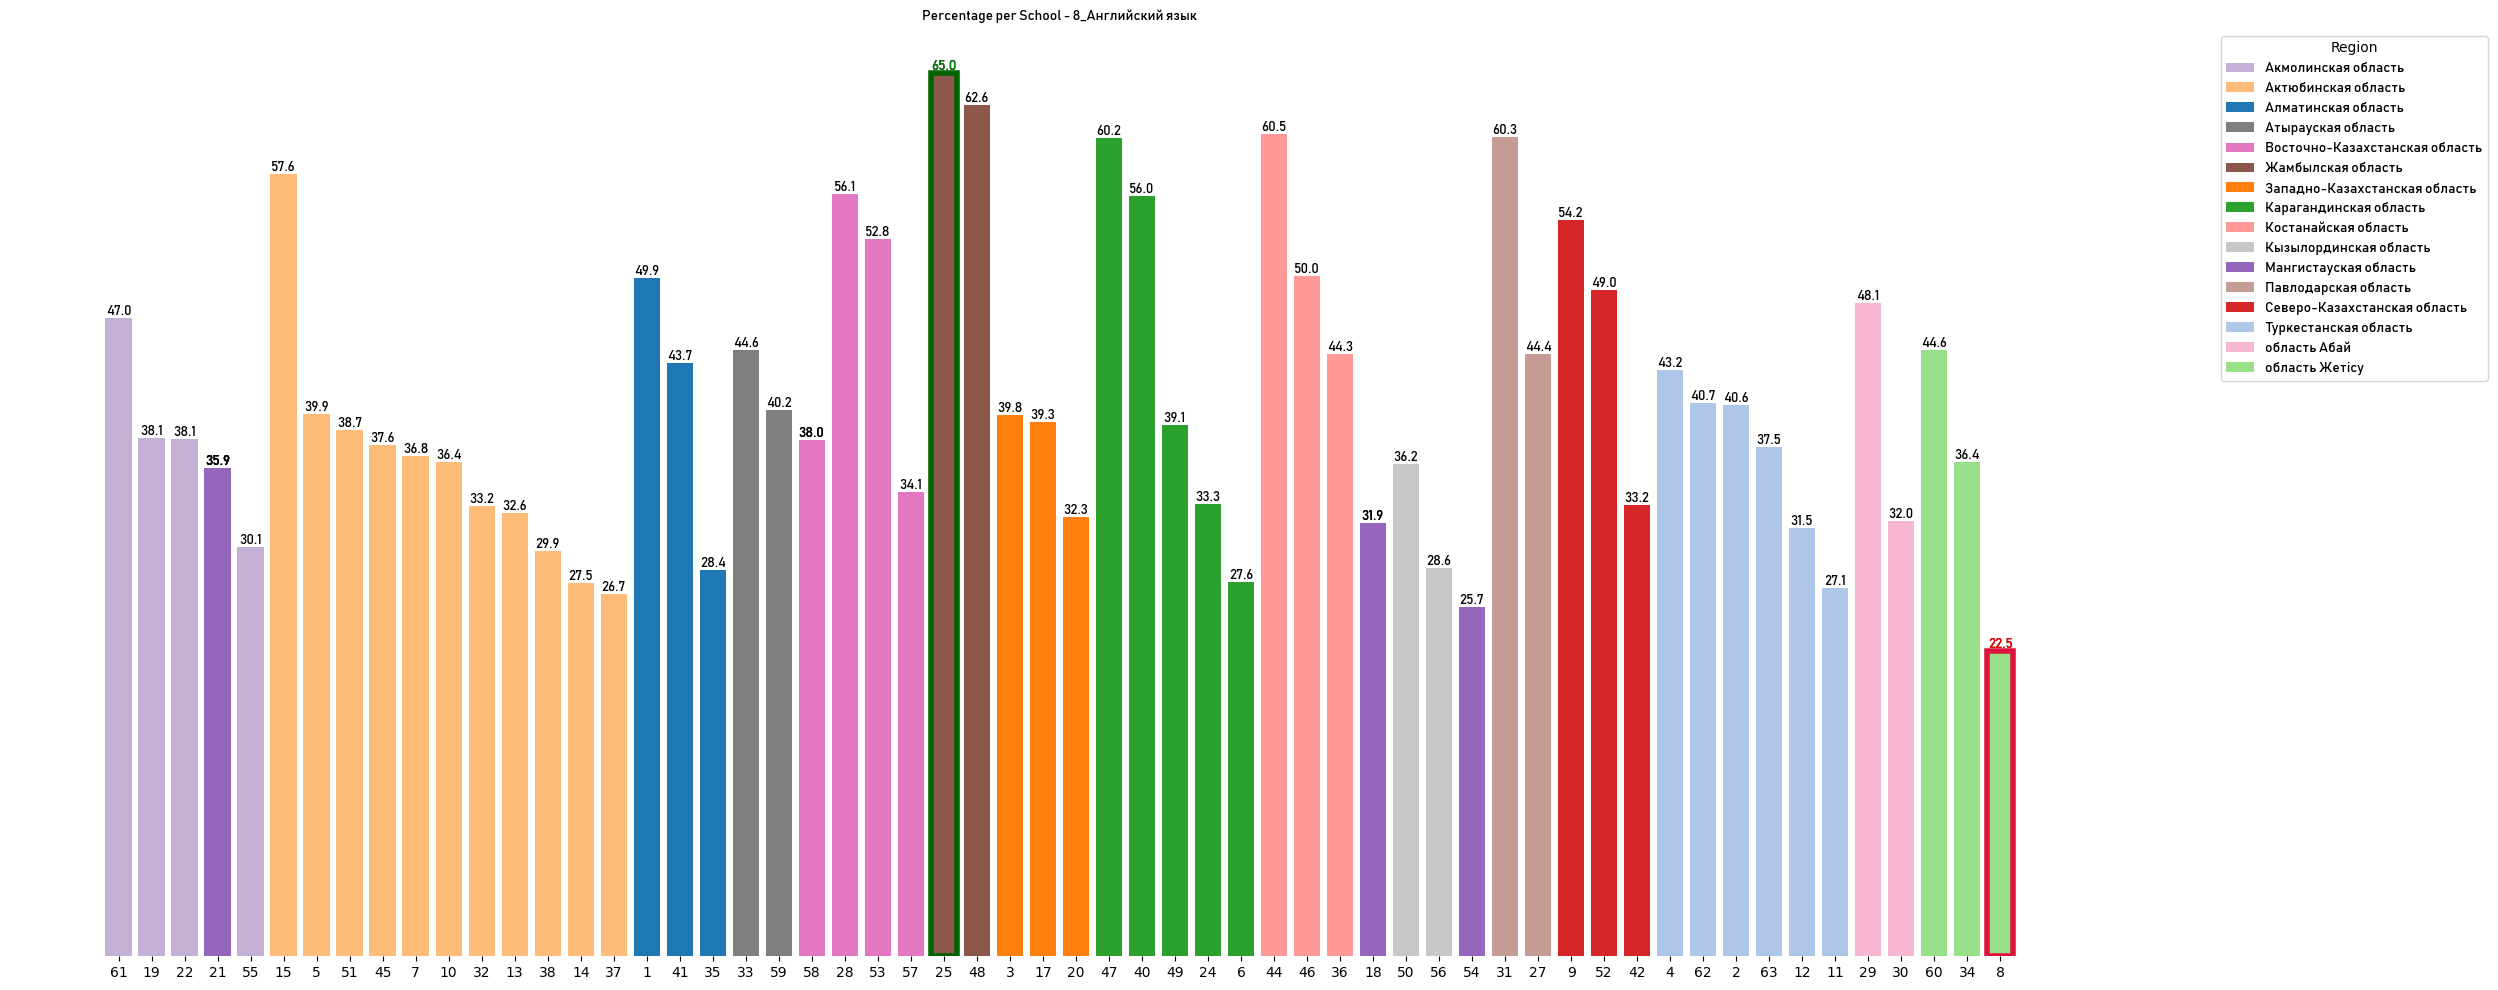

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


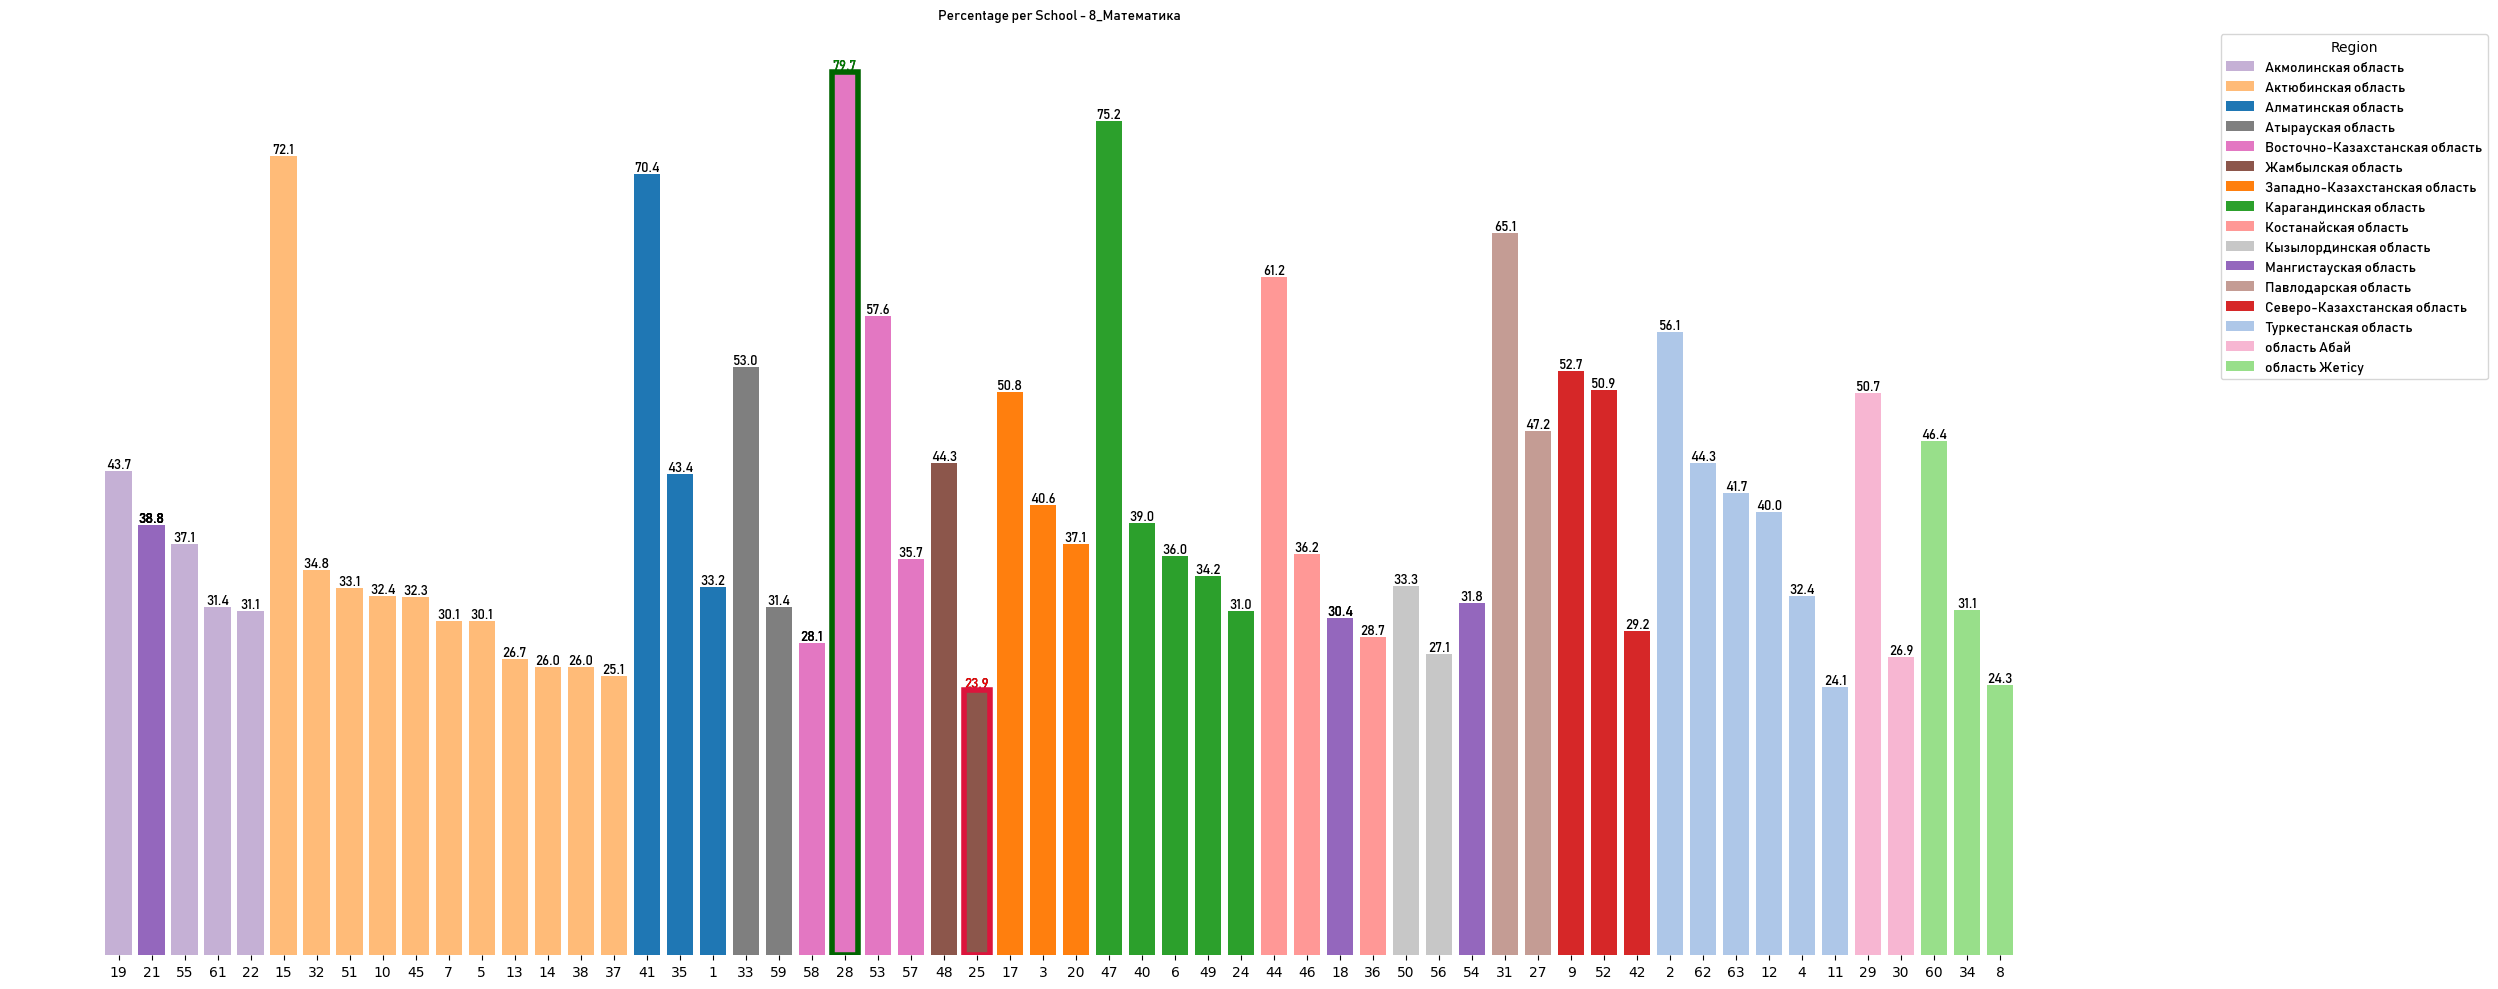

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


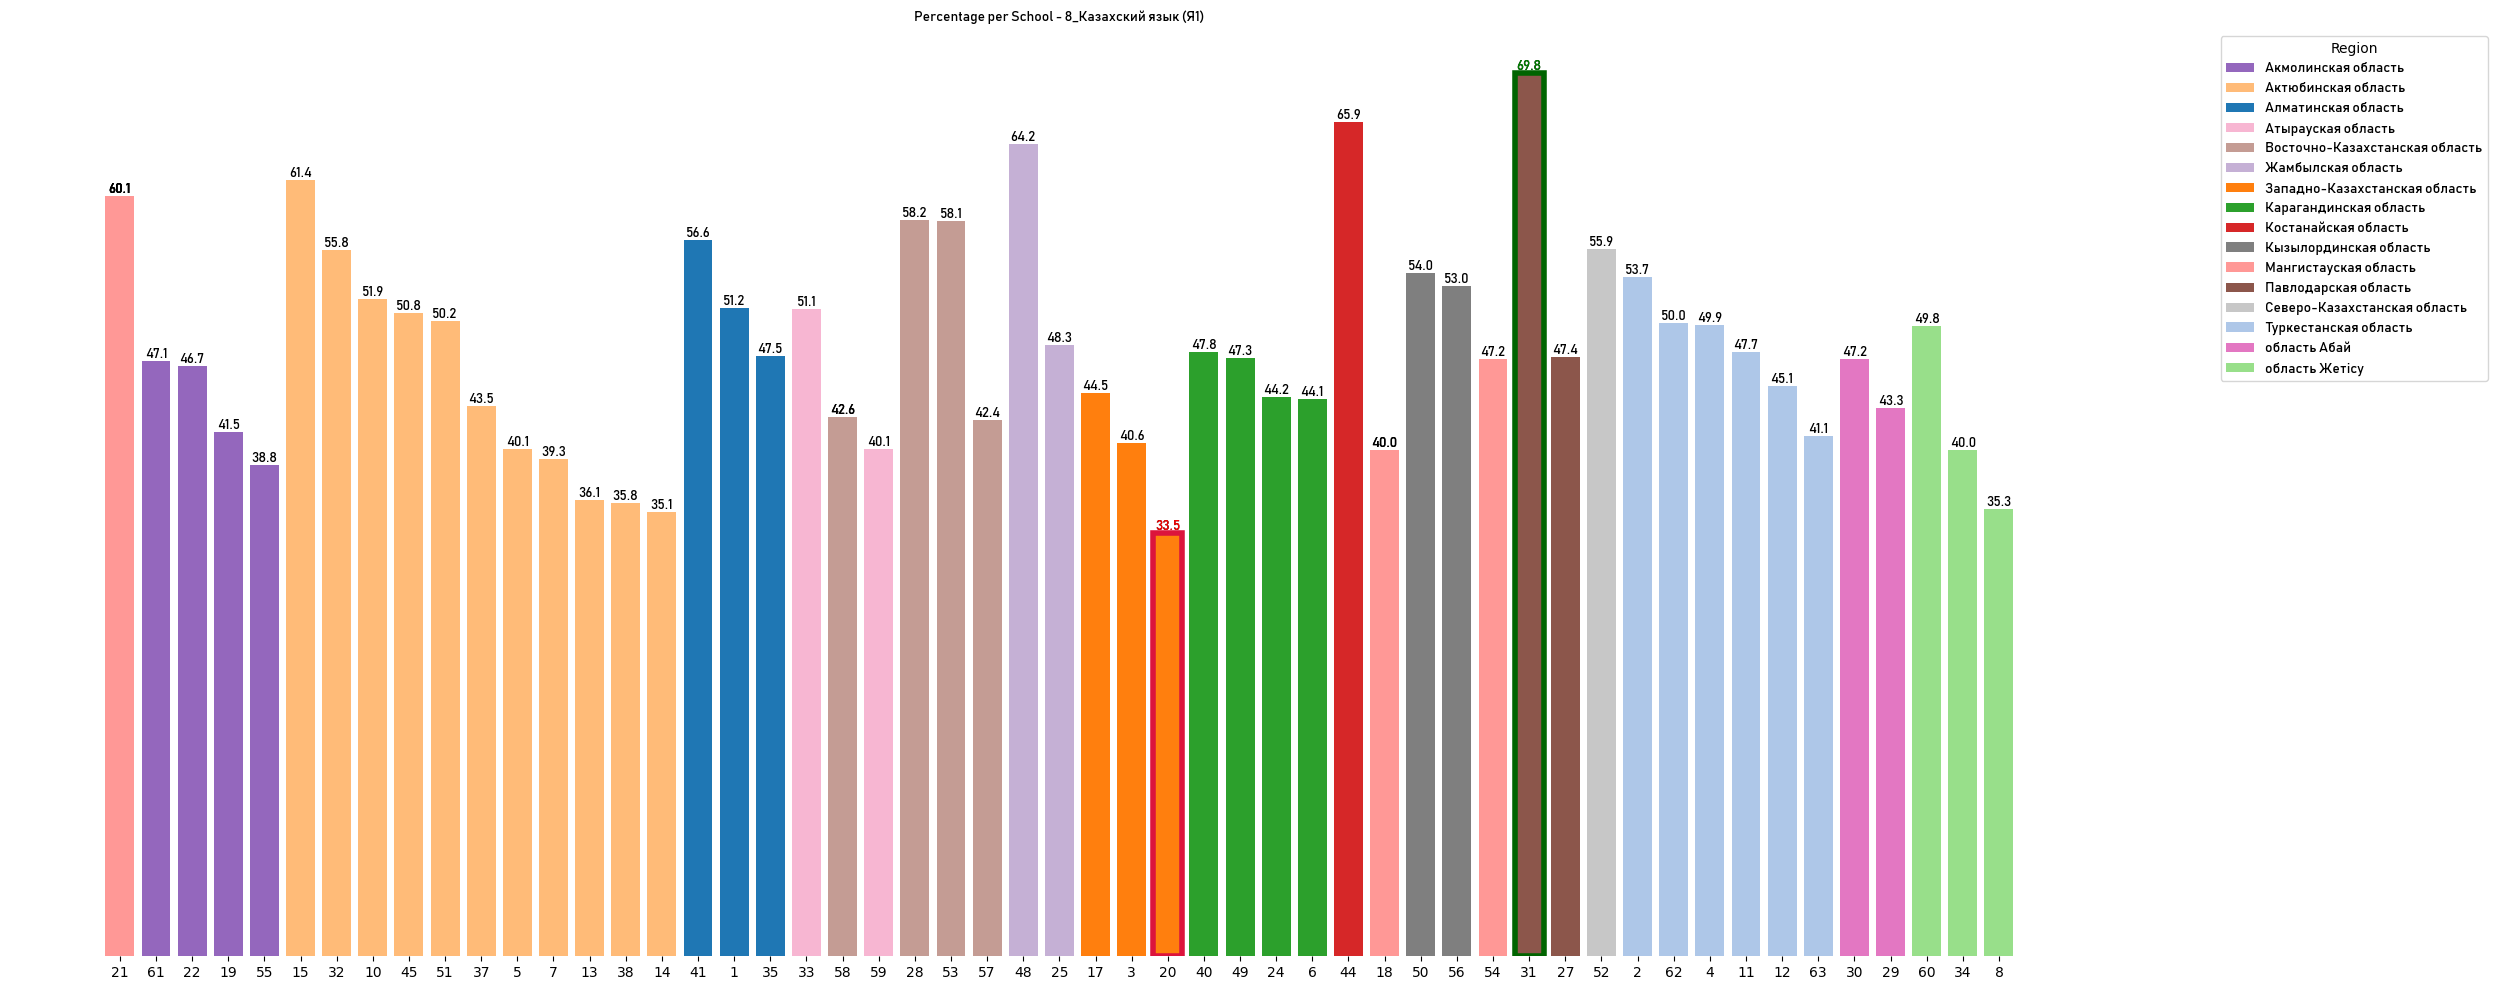

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


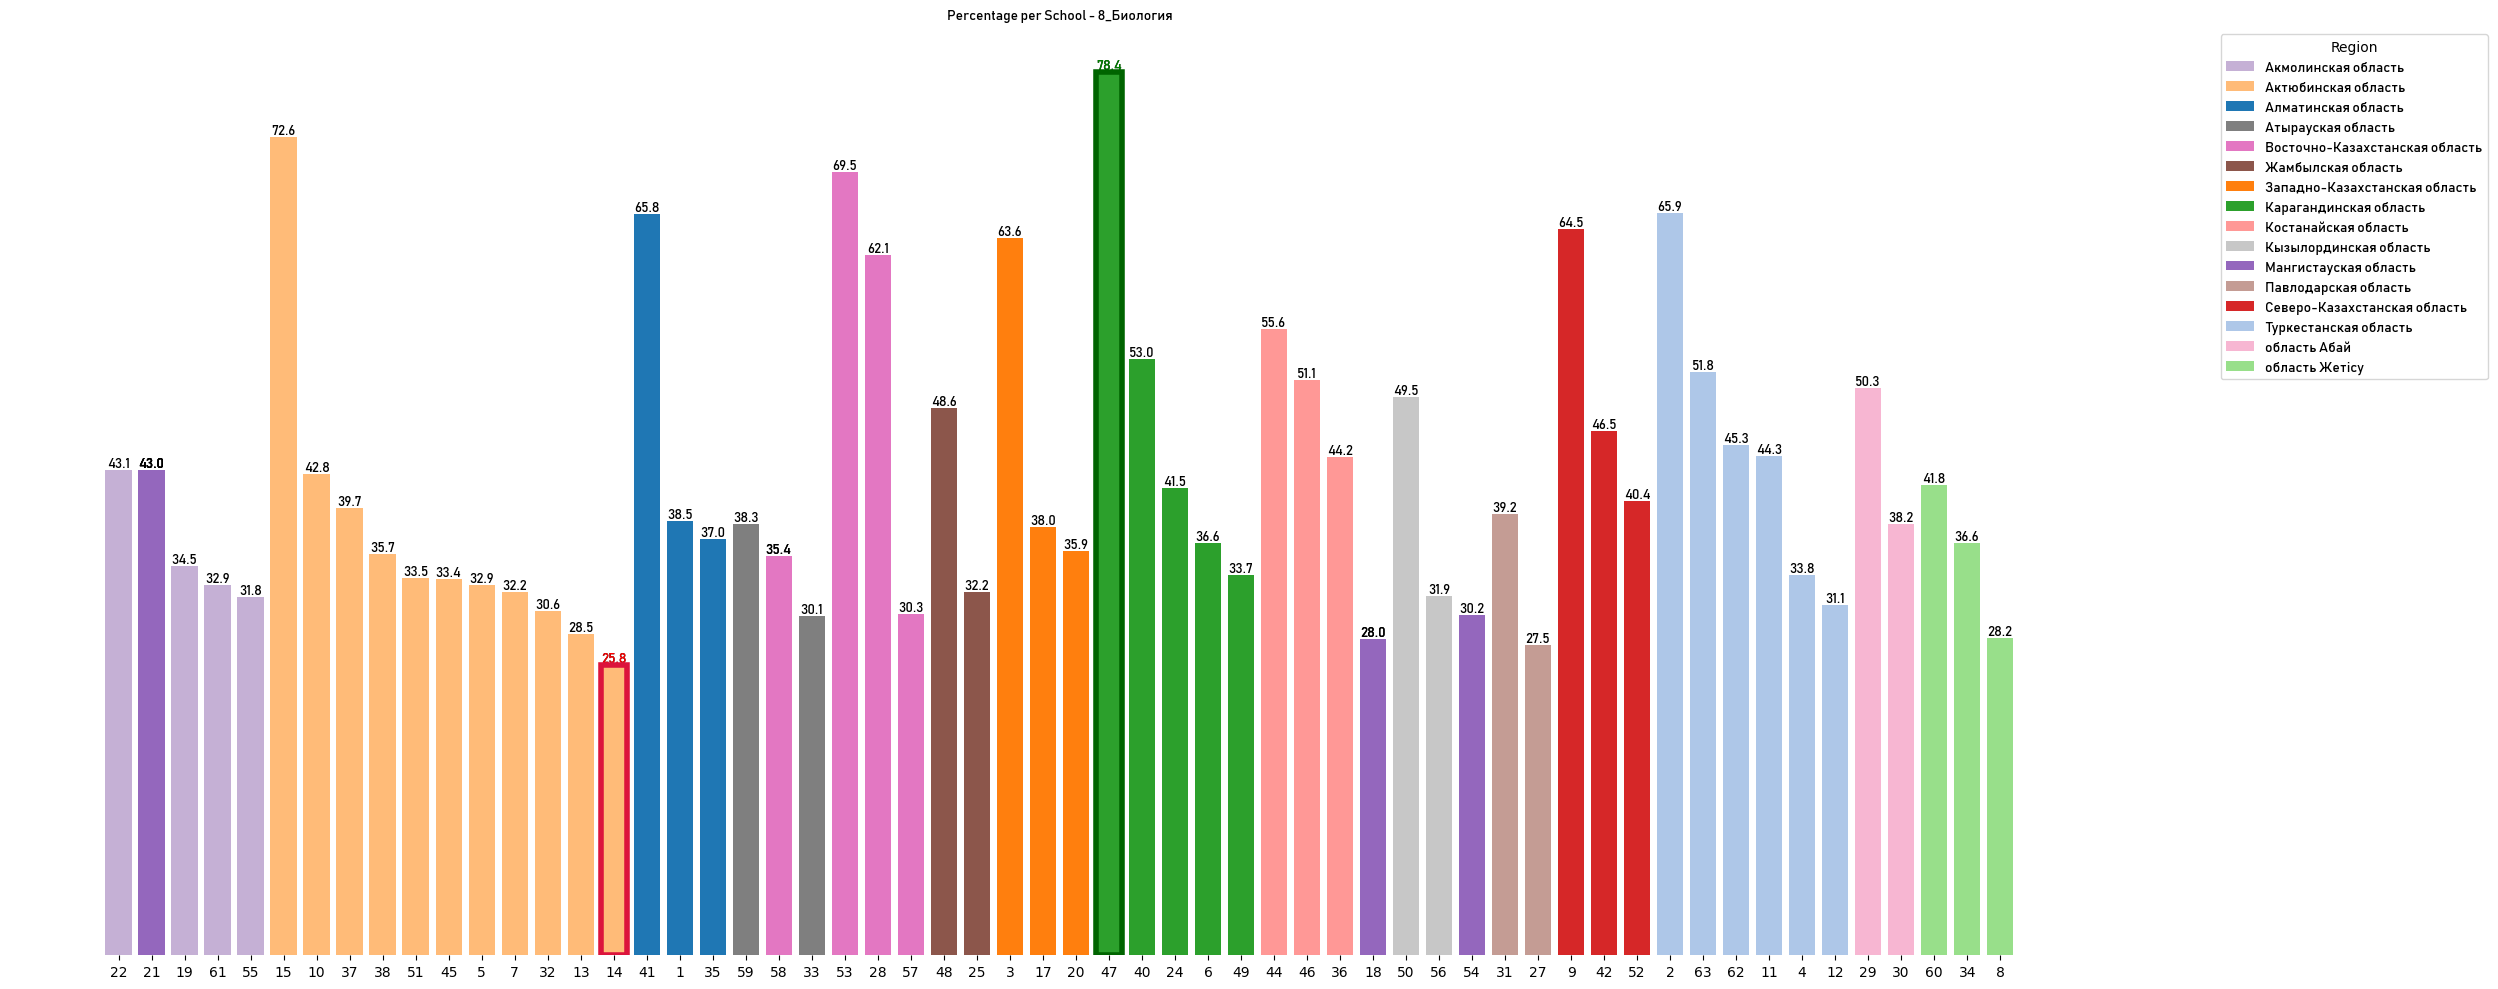

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


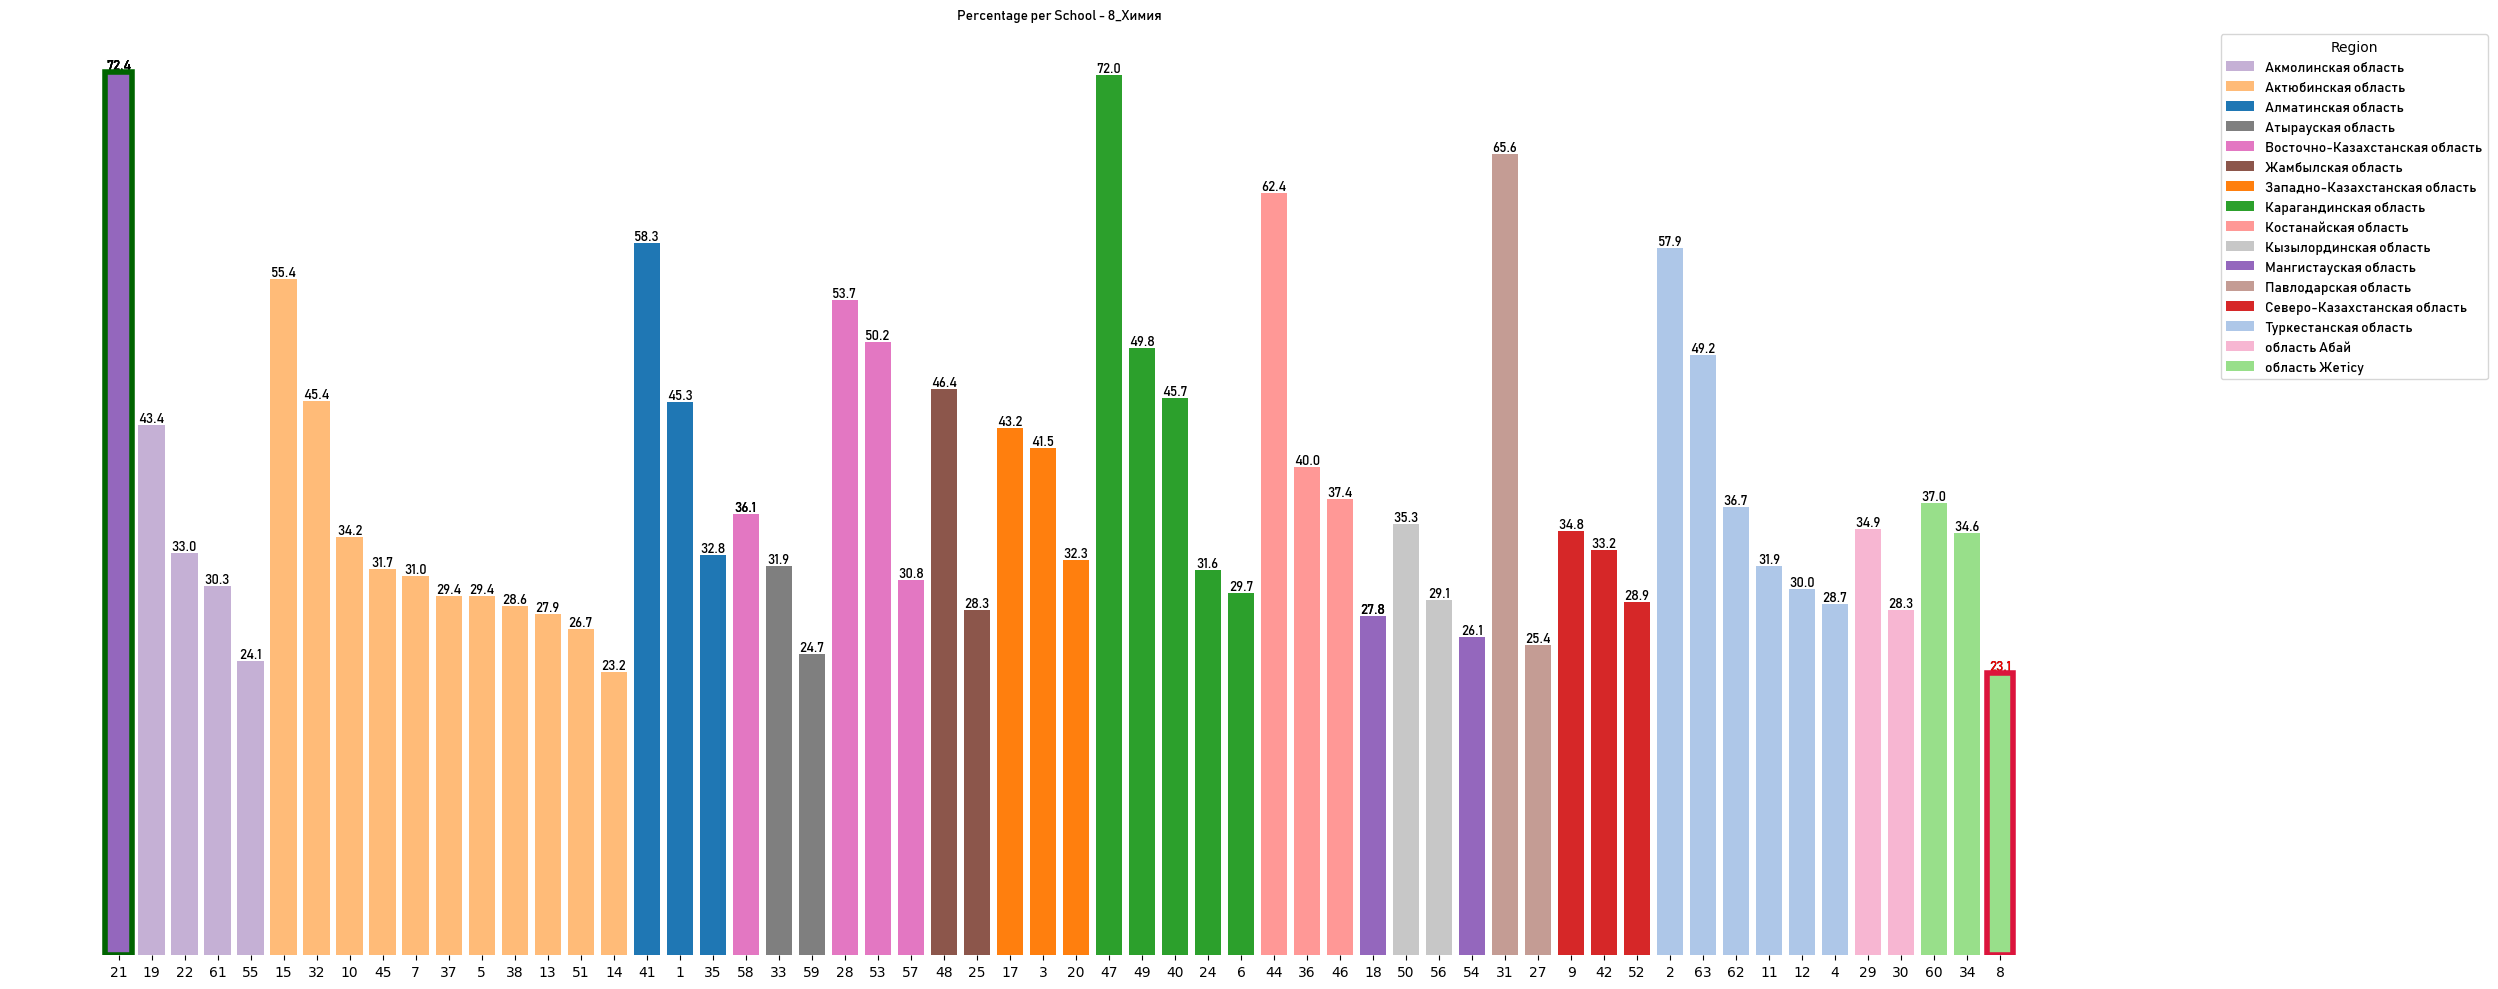

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


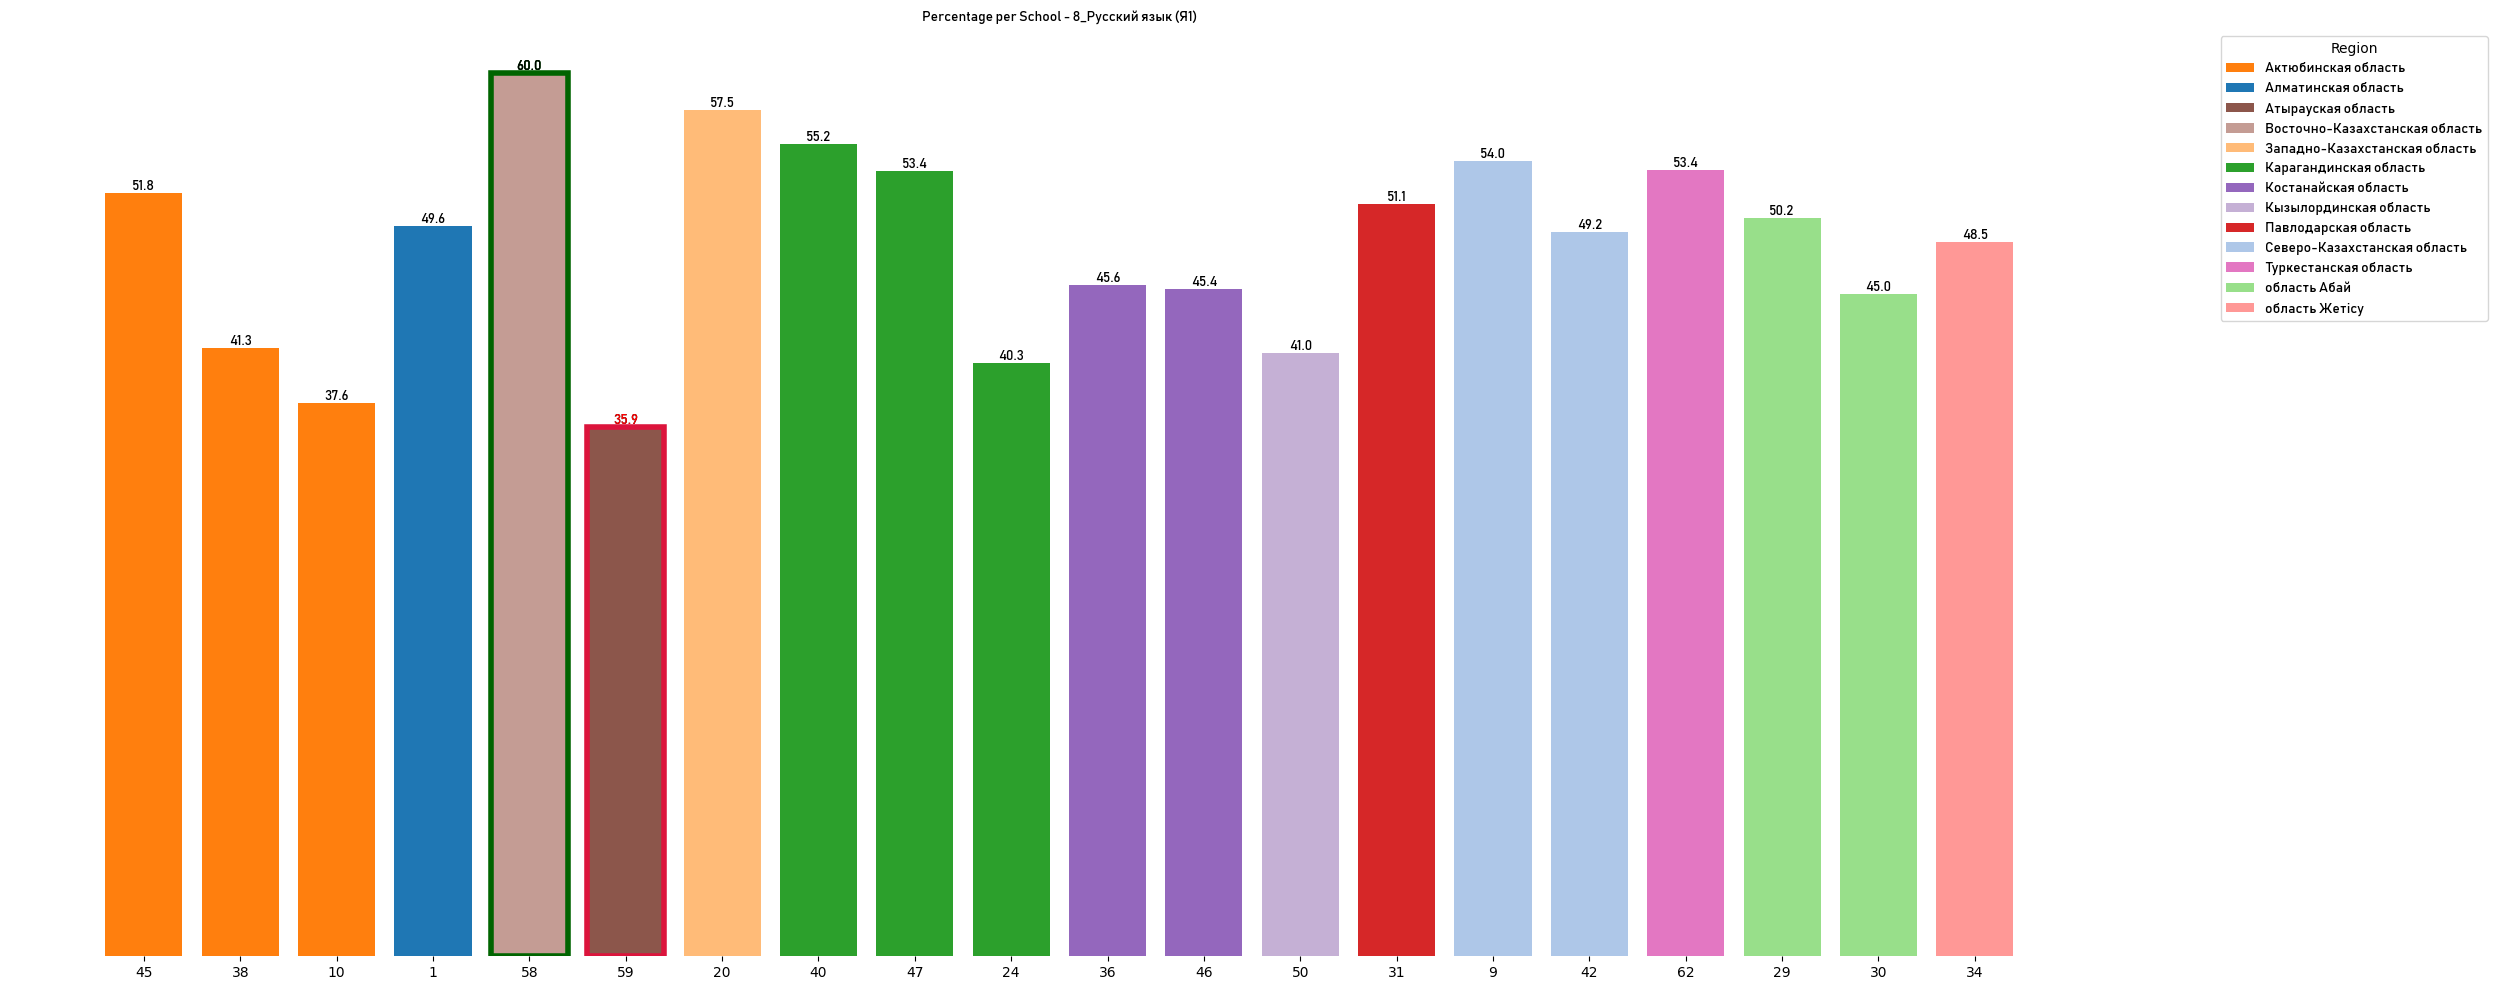

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


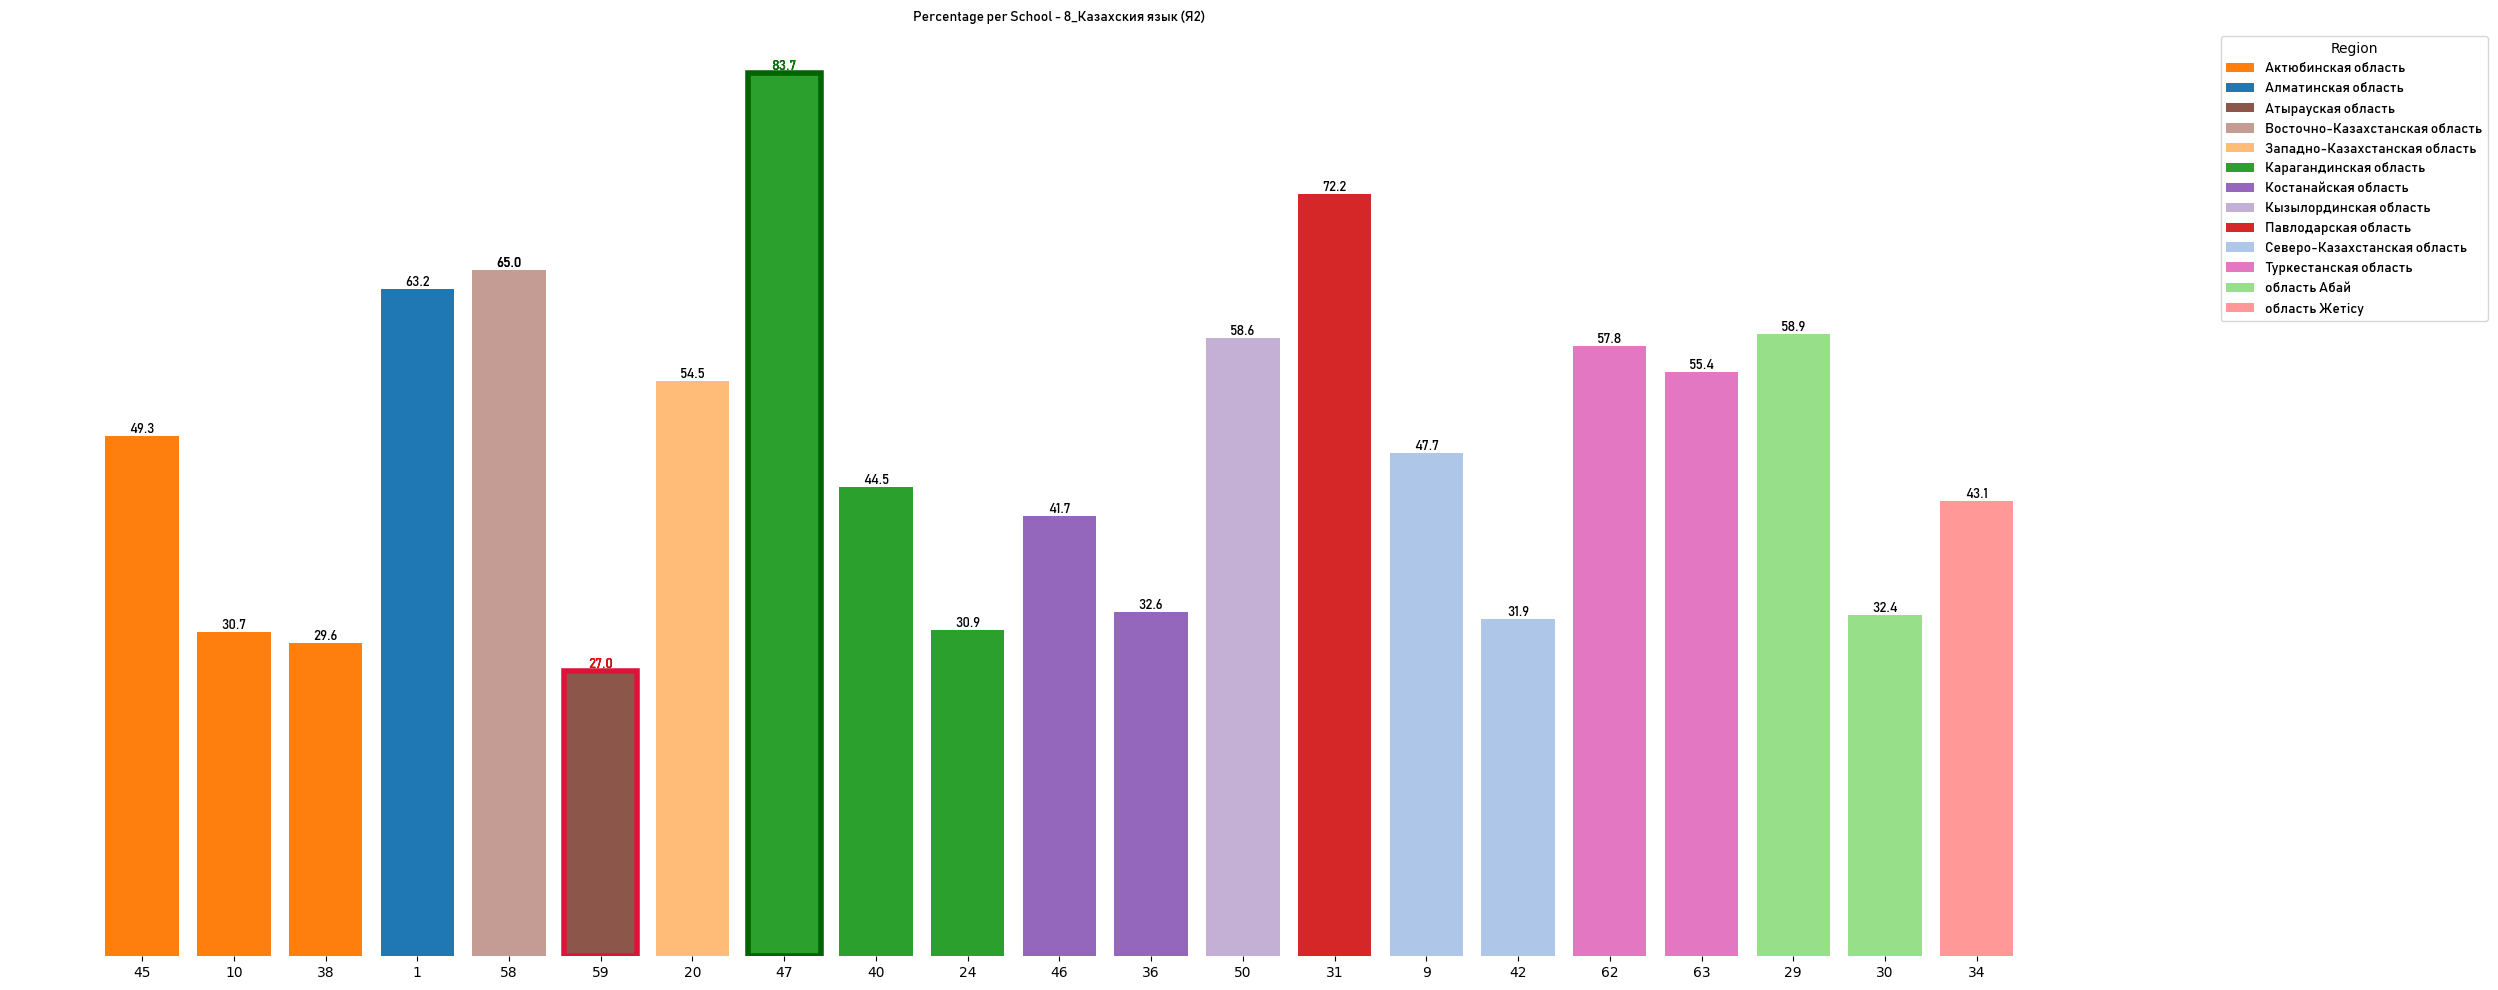

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


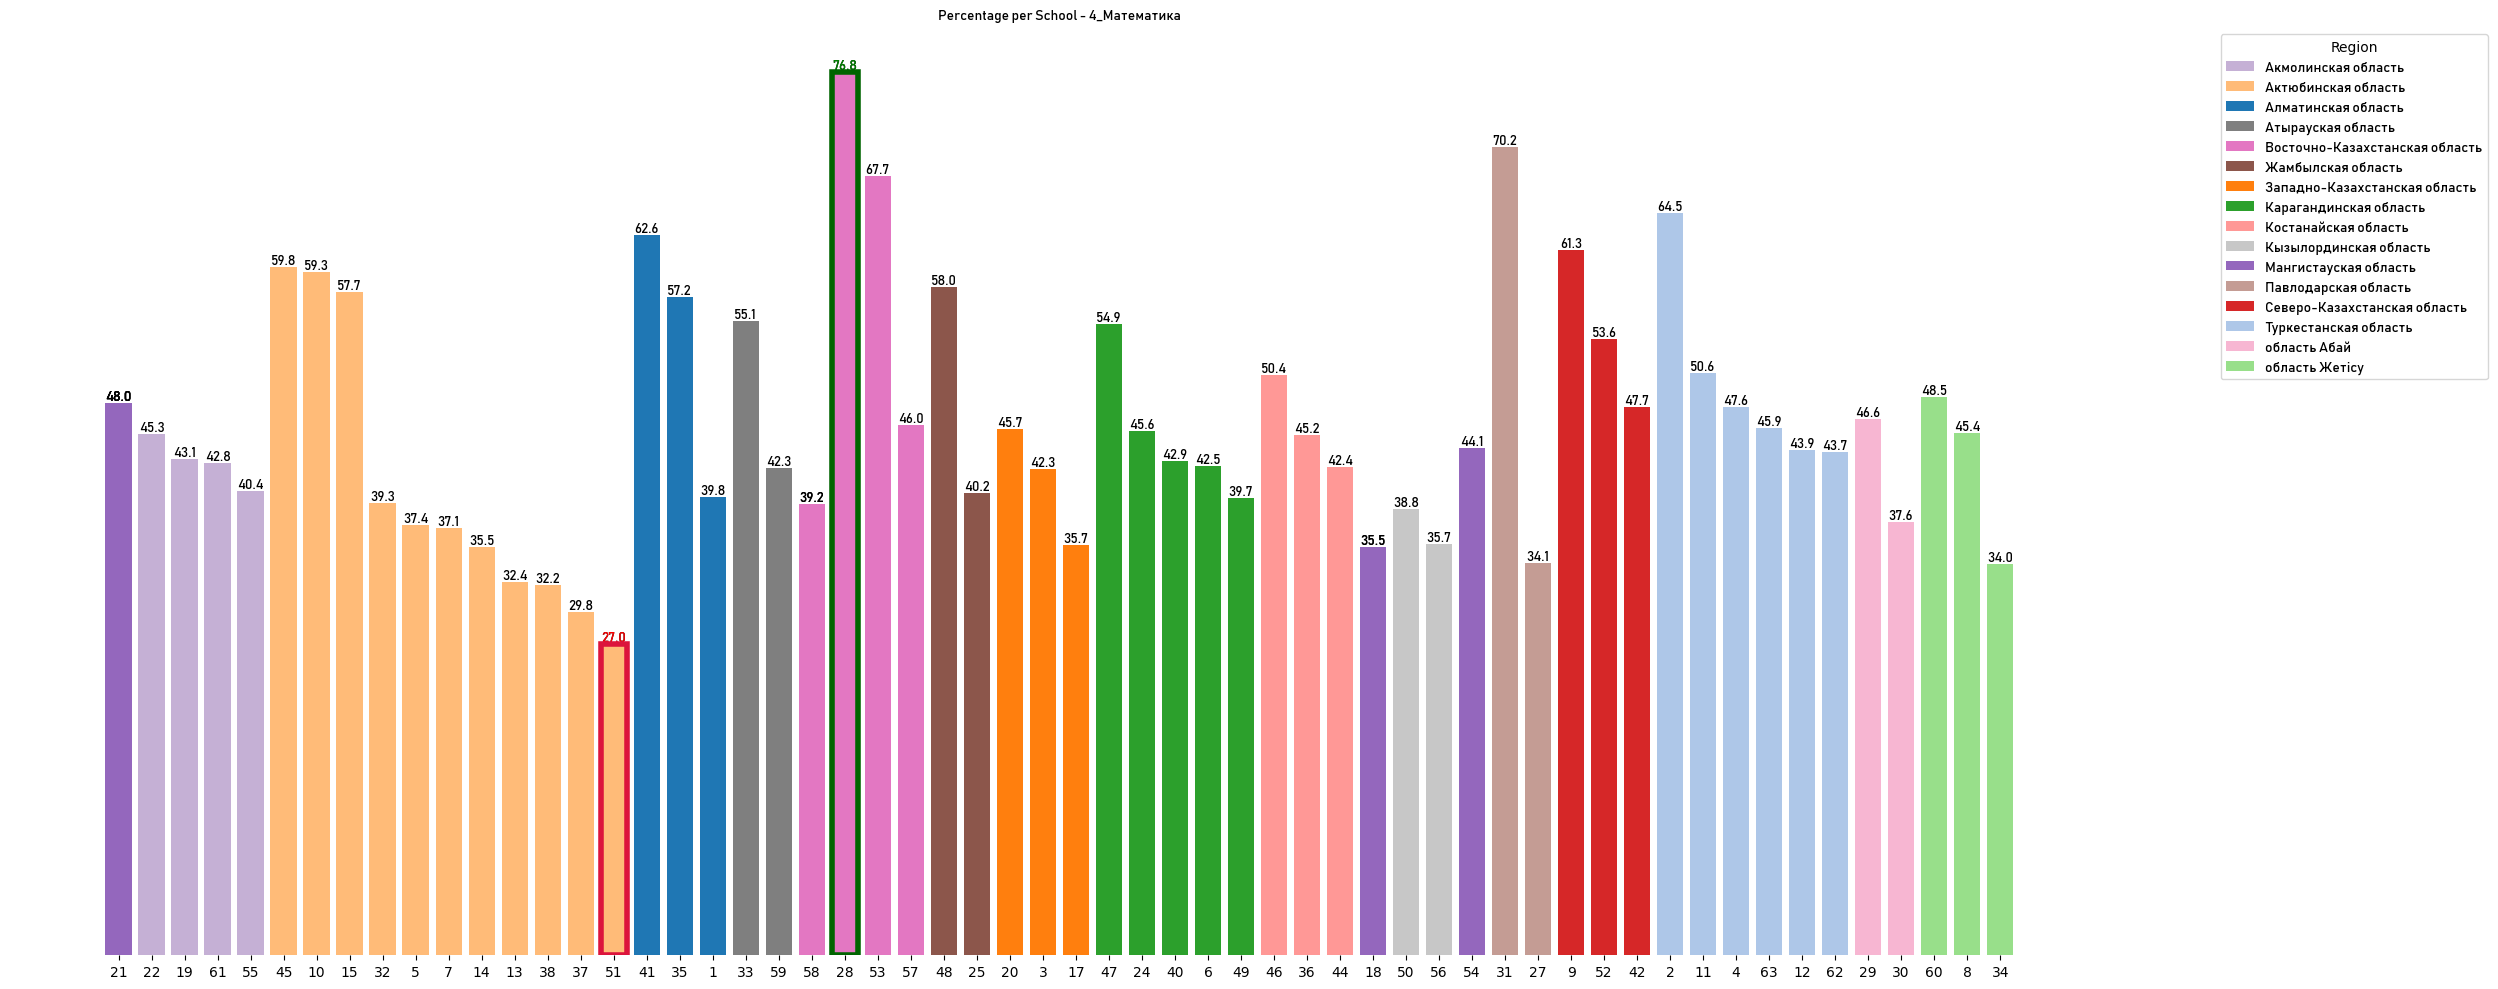

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


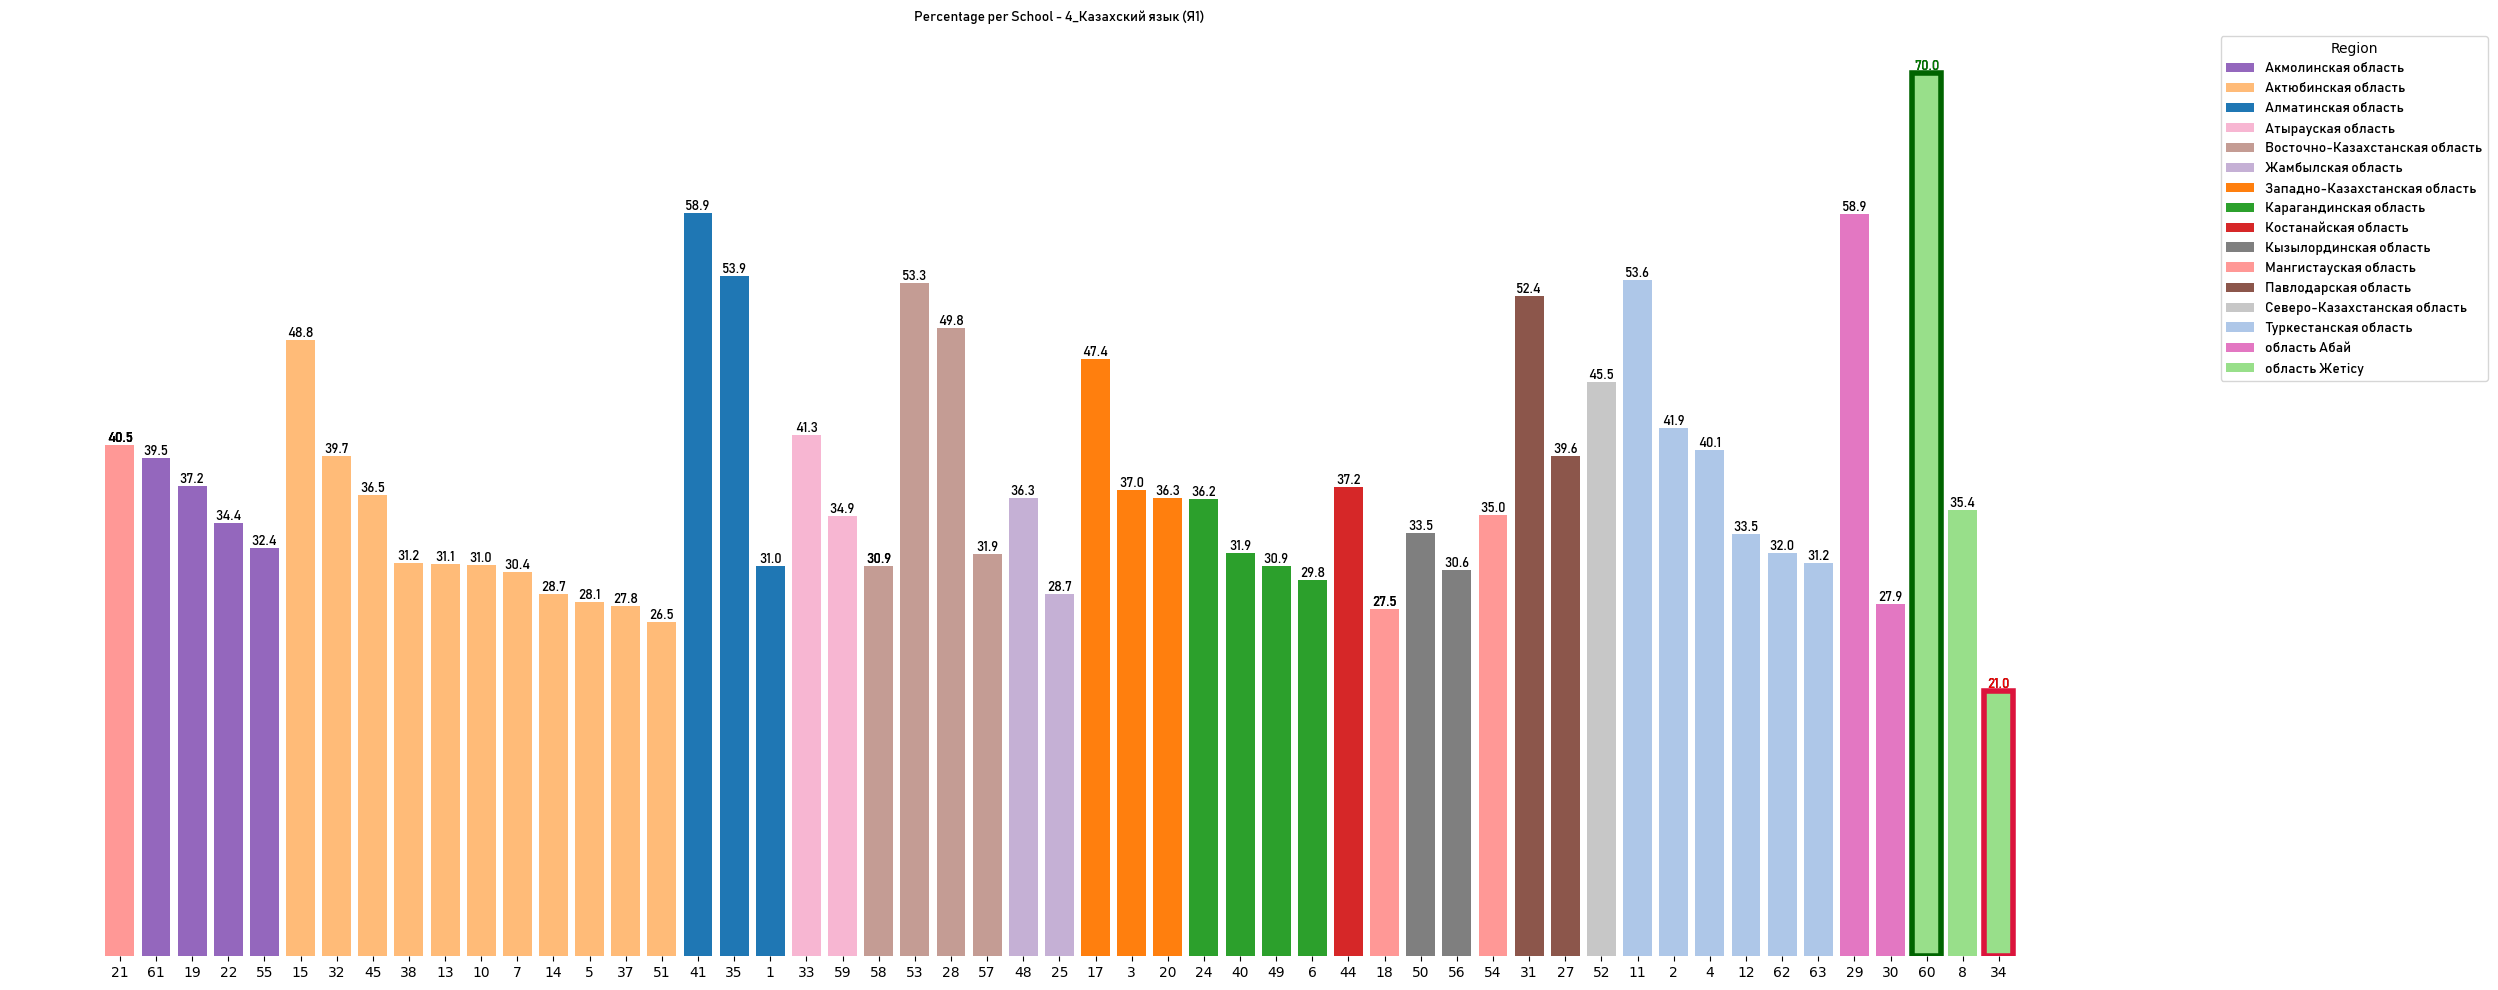

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


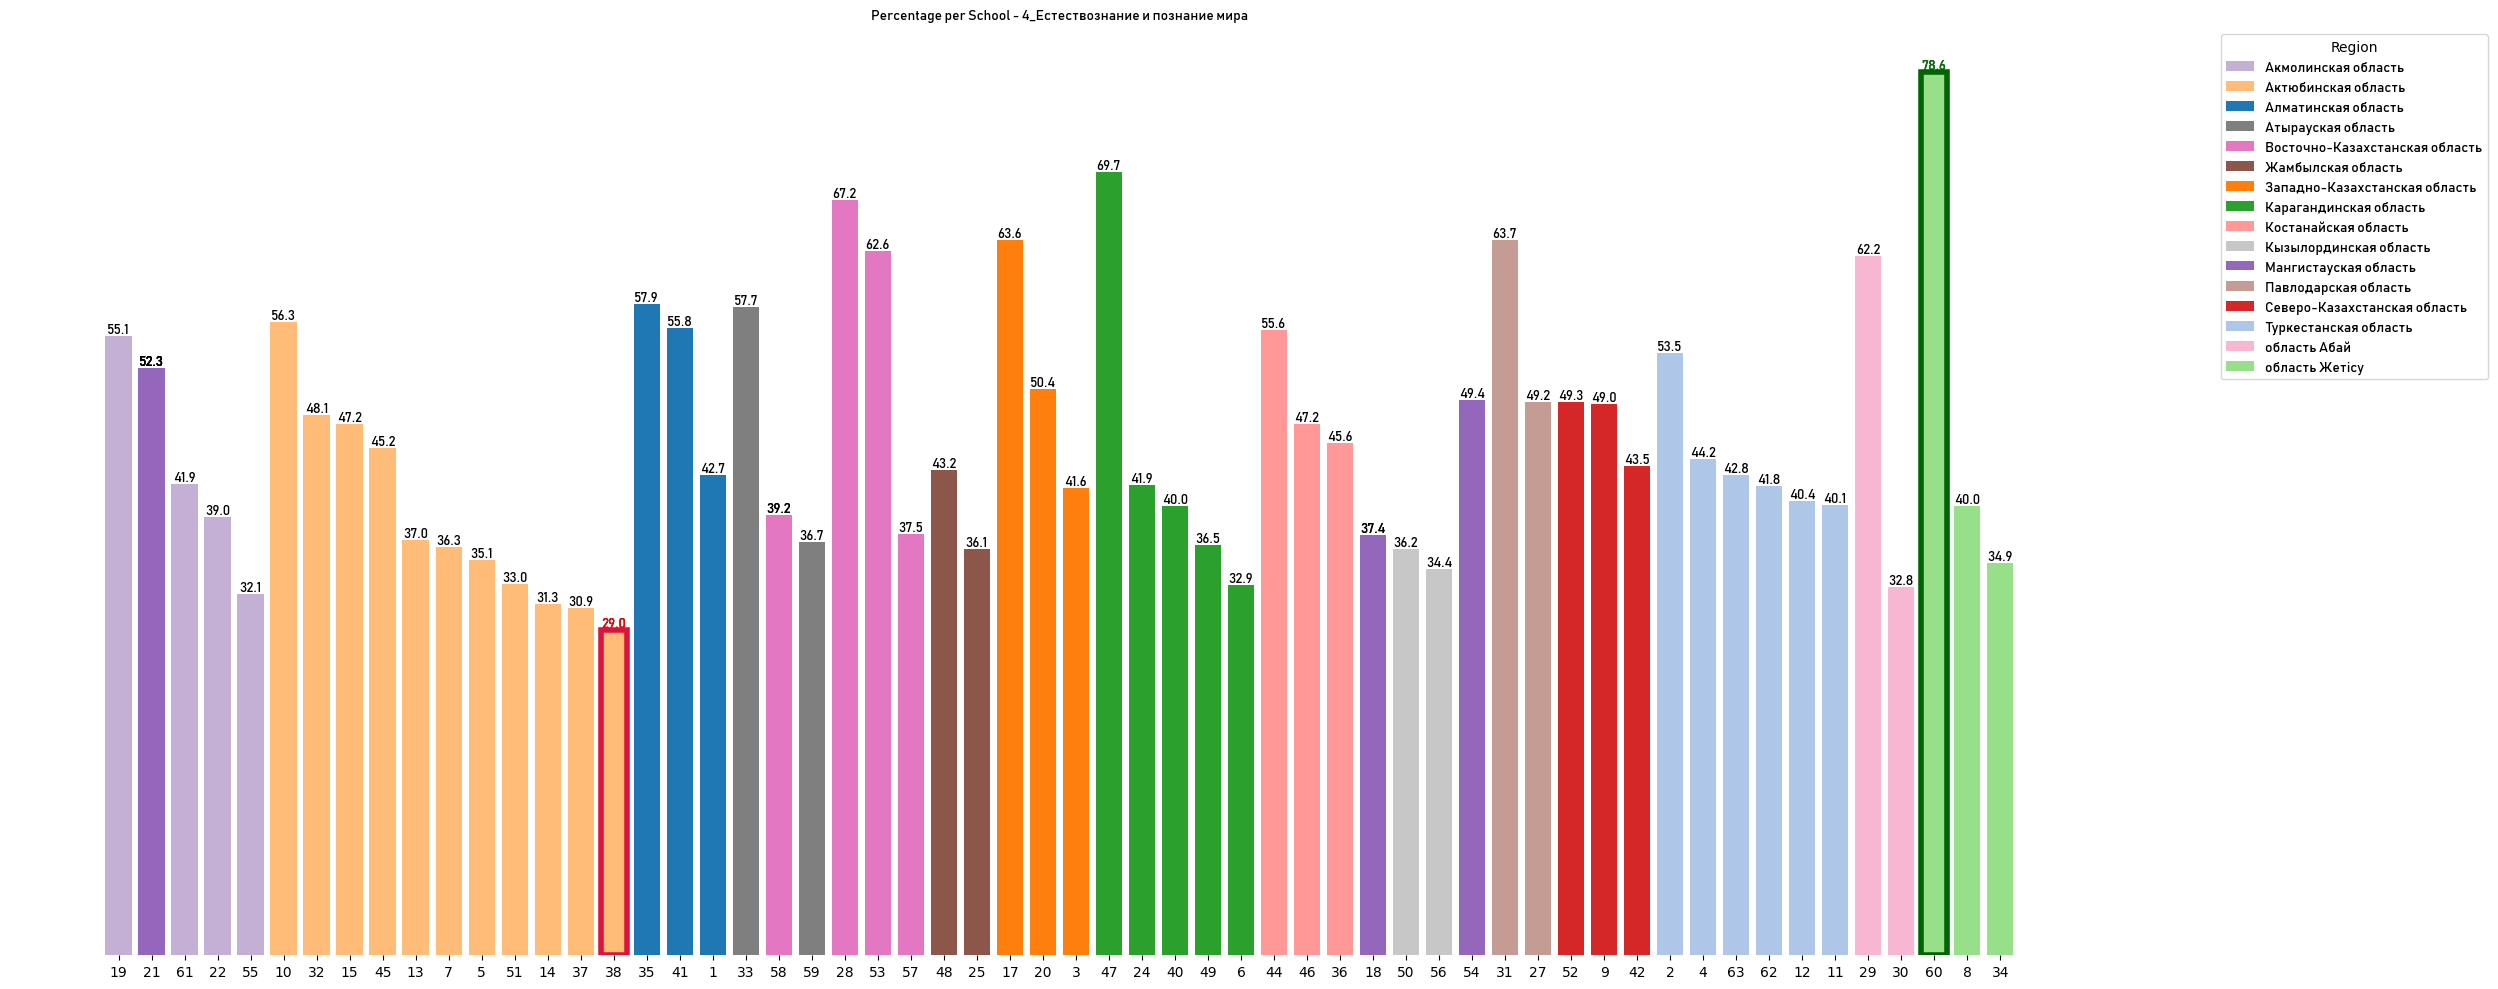

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\1914166441.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


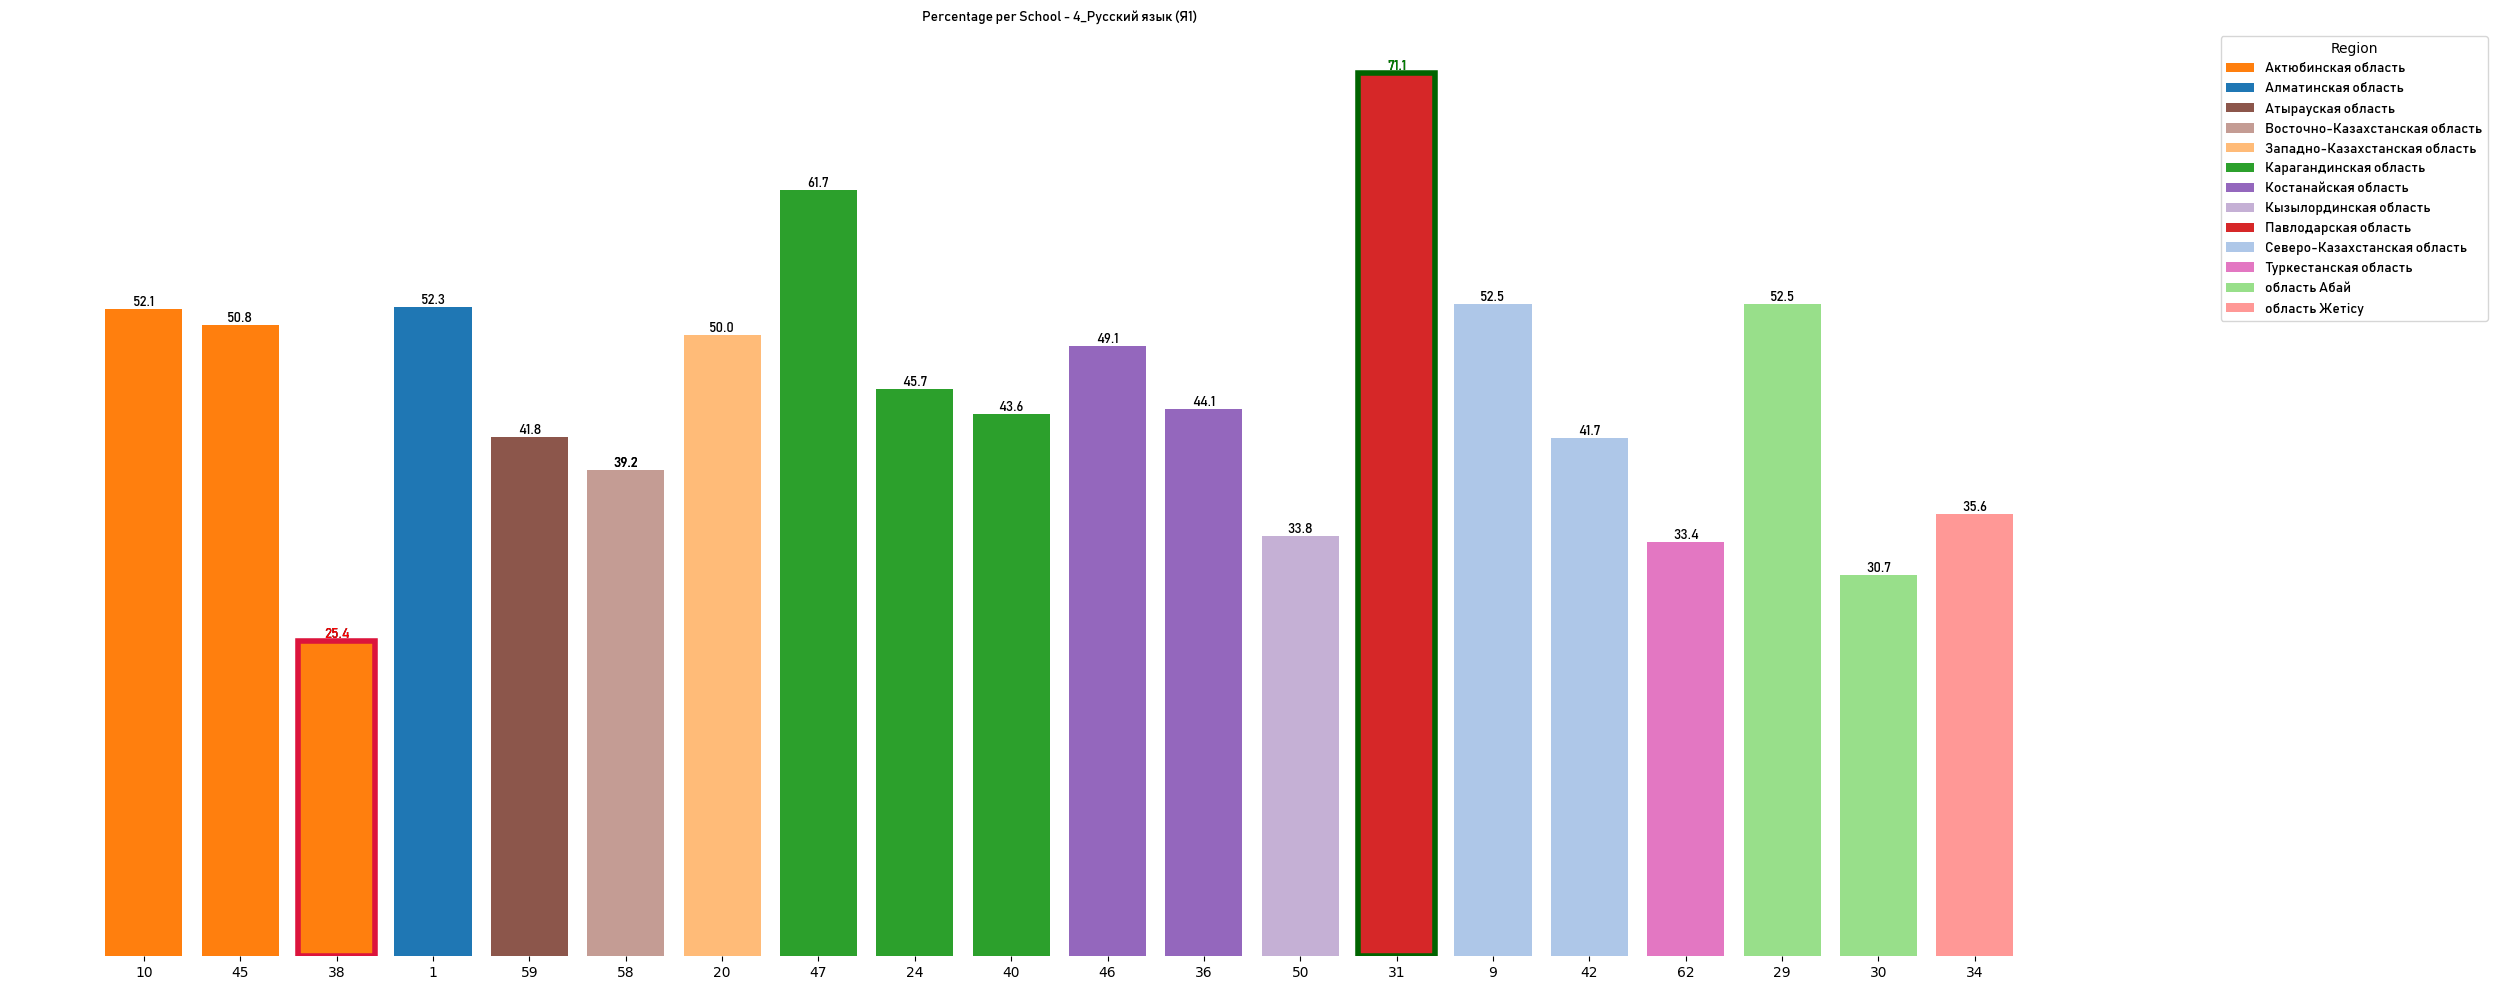

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.font_manager as fm

# Assuming 'table' is a dictionary containing DataFrames

# Specify the path to the strict and condensed font file (.ttf format)
font_path = r"C:\Users\kassenov_r\report-automation\suburban_schools\presentation\images\BAHNSCHRIFT.TTF" 

for table_name, df in tables.items():
    plt.figure(figsize=(25, 10))  # Adjust the figure size as needed for each chart
    df['school_id'] = df['school_id'].astype(str)
    
    # Replace NaN values in 'region' column with 'Unknown'
    df['region'].fillna('Unknown', inplace=True)

    regions = df['region'].unique()
    color_dict = {}

    for i, region in enumerate(regions):
        color_dict[region] = plt.cm.get_cmap('tab20')(i)

    # Exclude 'nan' string explicitly for plotting
    df_no_nan = df[df['region'] != 'nan']

    # Sorting the DataFrame by 'percent' in descending order within each 'region'
    df_sorted = df_no_nan.sort_values(by=['region', 'percent'], ascending=[True, False])

    for region, group in df_sorted.groupby('region'):
        if region in color_dict:
            bars = plt.bar(group['school_id'], group['percent'], label=region, color=color_dict[region])
        else:
            bars = plt.bar(group['school_id'], group['percent'], label=region)
    
    # Iterate through bars to find the maximum and minimum values across all regions
    all_bars = [bar for sublist in [container for container in plt.gca().containers] for bar in sublist]
    max_bar = max(all_bars, key=lambda x: x.get_height())
    min_bar = min(all_bars, key=lambda x: x.get_height())
    
    for bar in all_bars:
        height = bar.get_height()
        # Set the font properties for data labels
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                 ha='center', va='bottom', 
                 color='black', fontproperties=fm.FontProperties(fname=font_path))
        # Set the highest data label to green and the lowest to red
        if bar == max_bar:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                     ha='center', va='bottom', 
                     color='green', fontproperties=fm.FontProperties(fname=font_path))
        elif bar == min_bar:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                     ha='center', va='bottom', 
                     color='red', fontproperties=fm.FontProperties(fname=font_path))

    # Highlighting the max and min bars with rectangles
    max_rect = patches.Rectangle((max_bar.get_x(), 0), 
                                 max_bar.get_width(), max_bar.get_height(), 
                                 edgecolor='darkgreen', facecolor='none', lw=4, zorder=5)
    min_rect = patches.Rectangle((min_bar.get_x(), 0), 
                                 min_bar.get_width(), min_bar.get_height(), 
                                 edgecolor='crimson', facecolor='none', lw=4, zorder=5)

    plt.gca().add_patch(max_rect)
    plt.gca().add_patch(min_rect)
    
    # Set the font family to the strict and condensed font for labels and title
    prop = fm.FontProperties(fname=font_path)
    plt.xlabel('', fontproperties=prop)
    plt.title(f'Percentage per School - {table_name}', fontproperties=prop)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', prop=prop)
    plt.tick_params(axis='y', labelleft=False)  # Remove y-axis labels
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(axis='y', linestyle='')  # Remove grid lines along the y-axis
    plt.box(False)  # Remove box border around the plot
    plt.tight_layout()
    plt.savefig(rf"C:\Users\kassenov_r\report-automation\suburban_schools\presentation\images\{table_name}.png")
    plt.show()

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


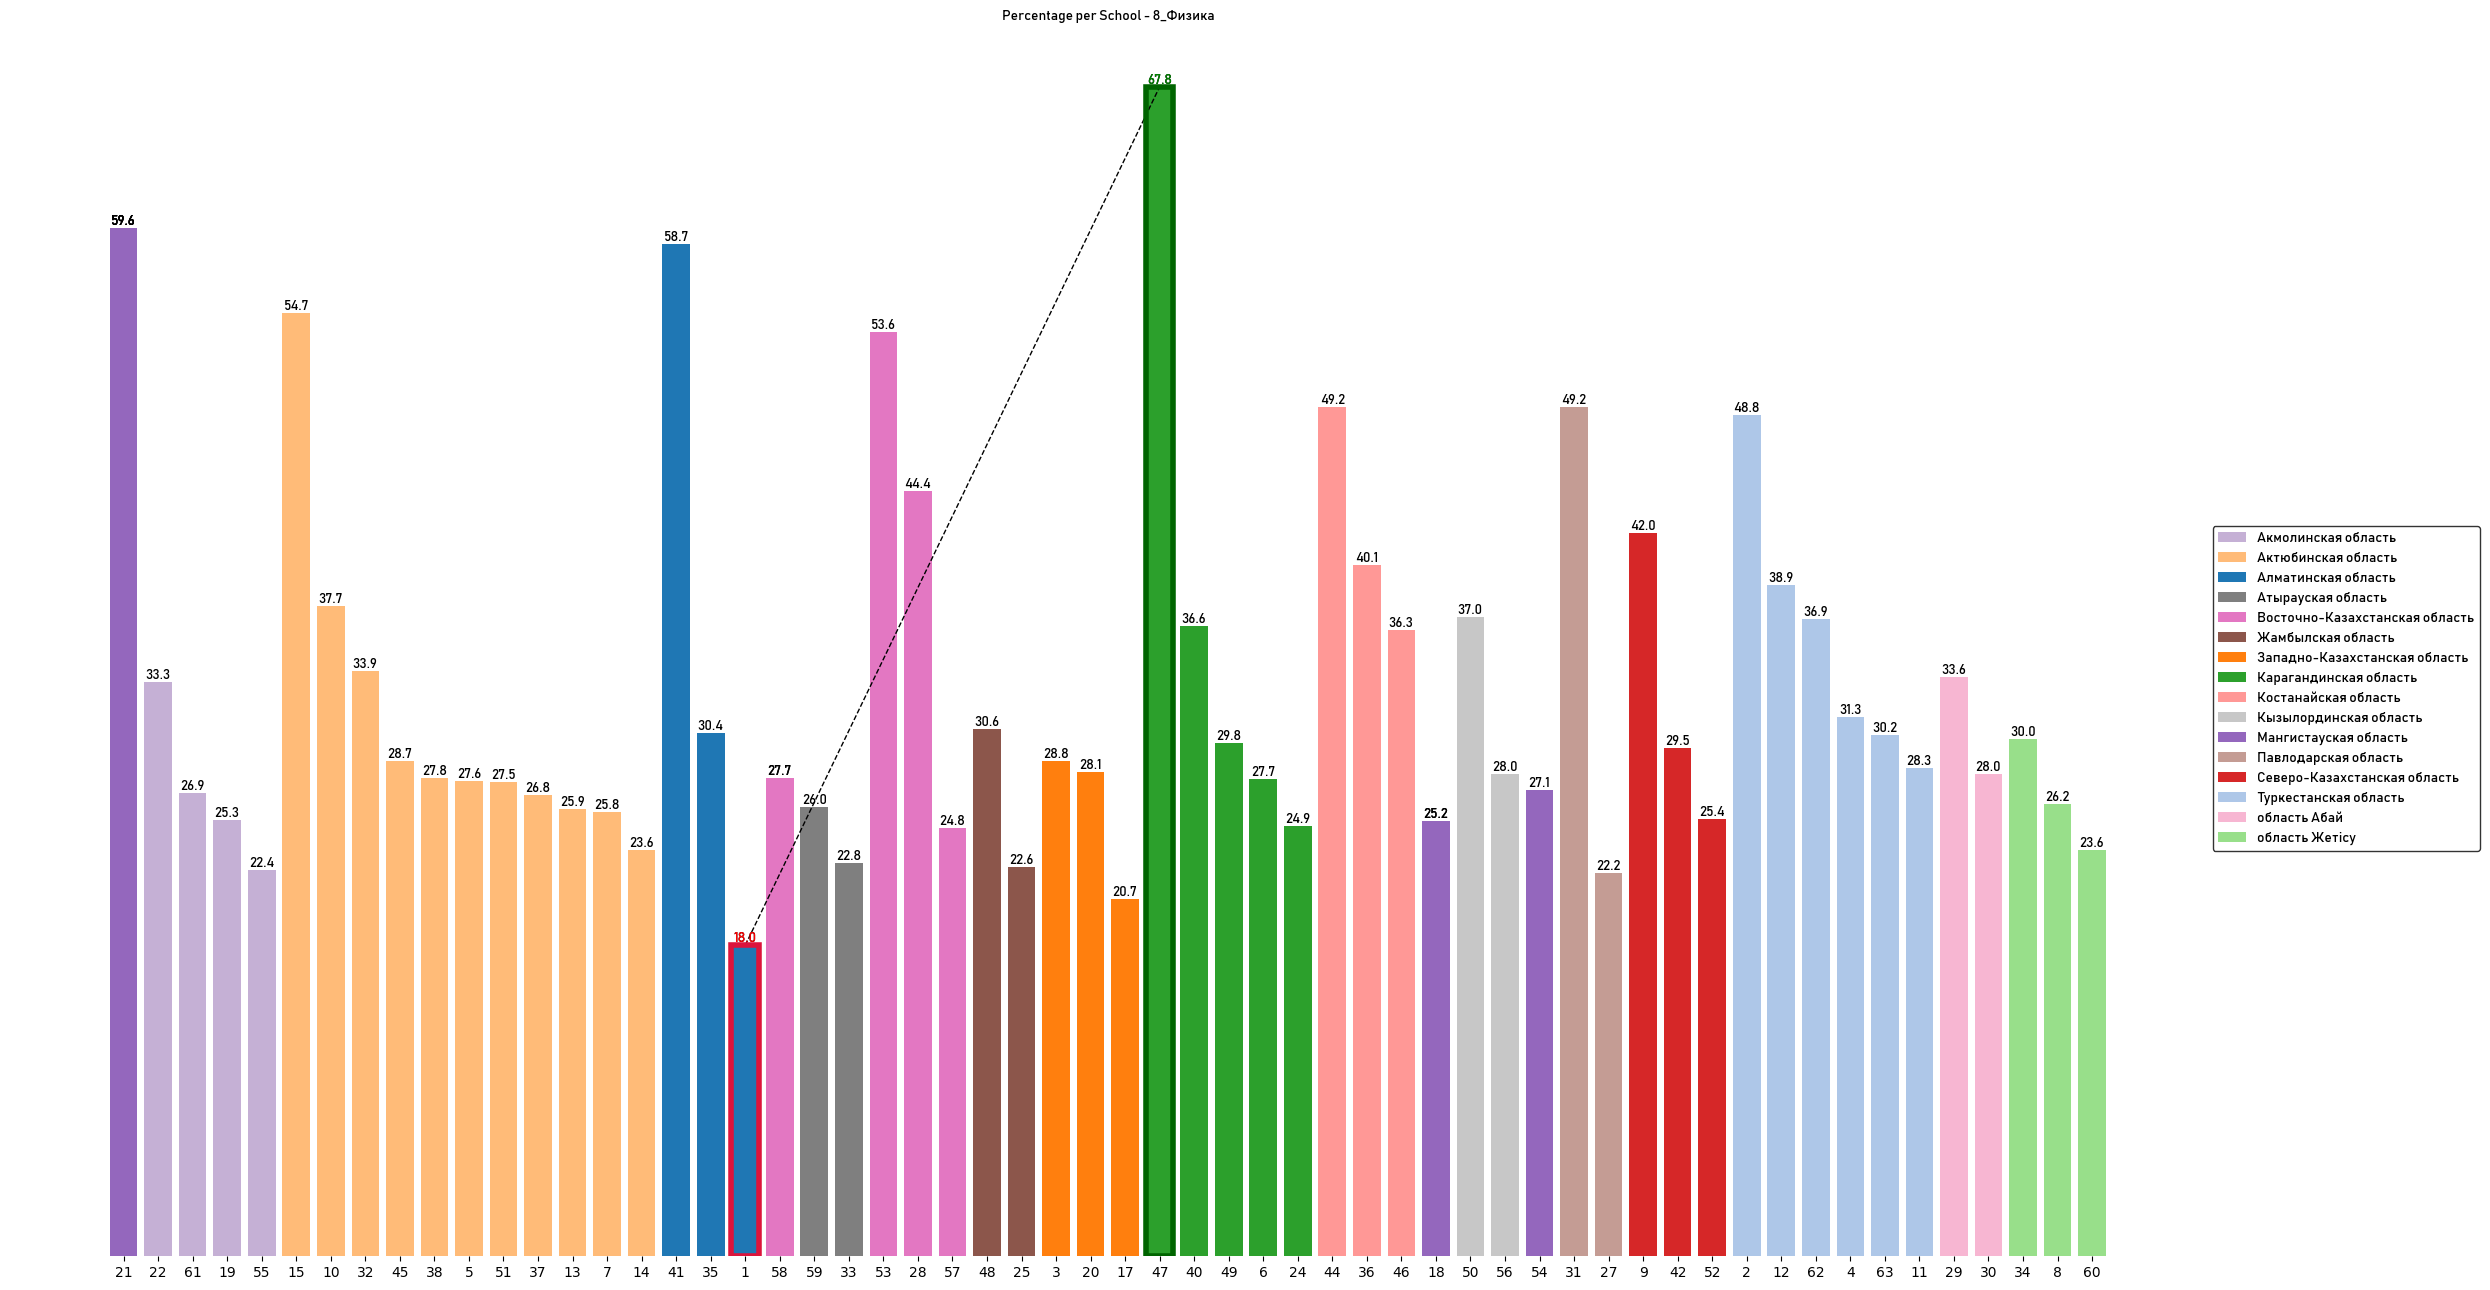

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


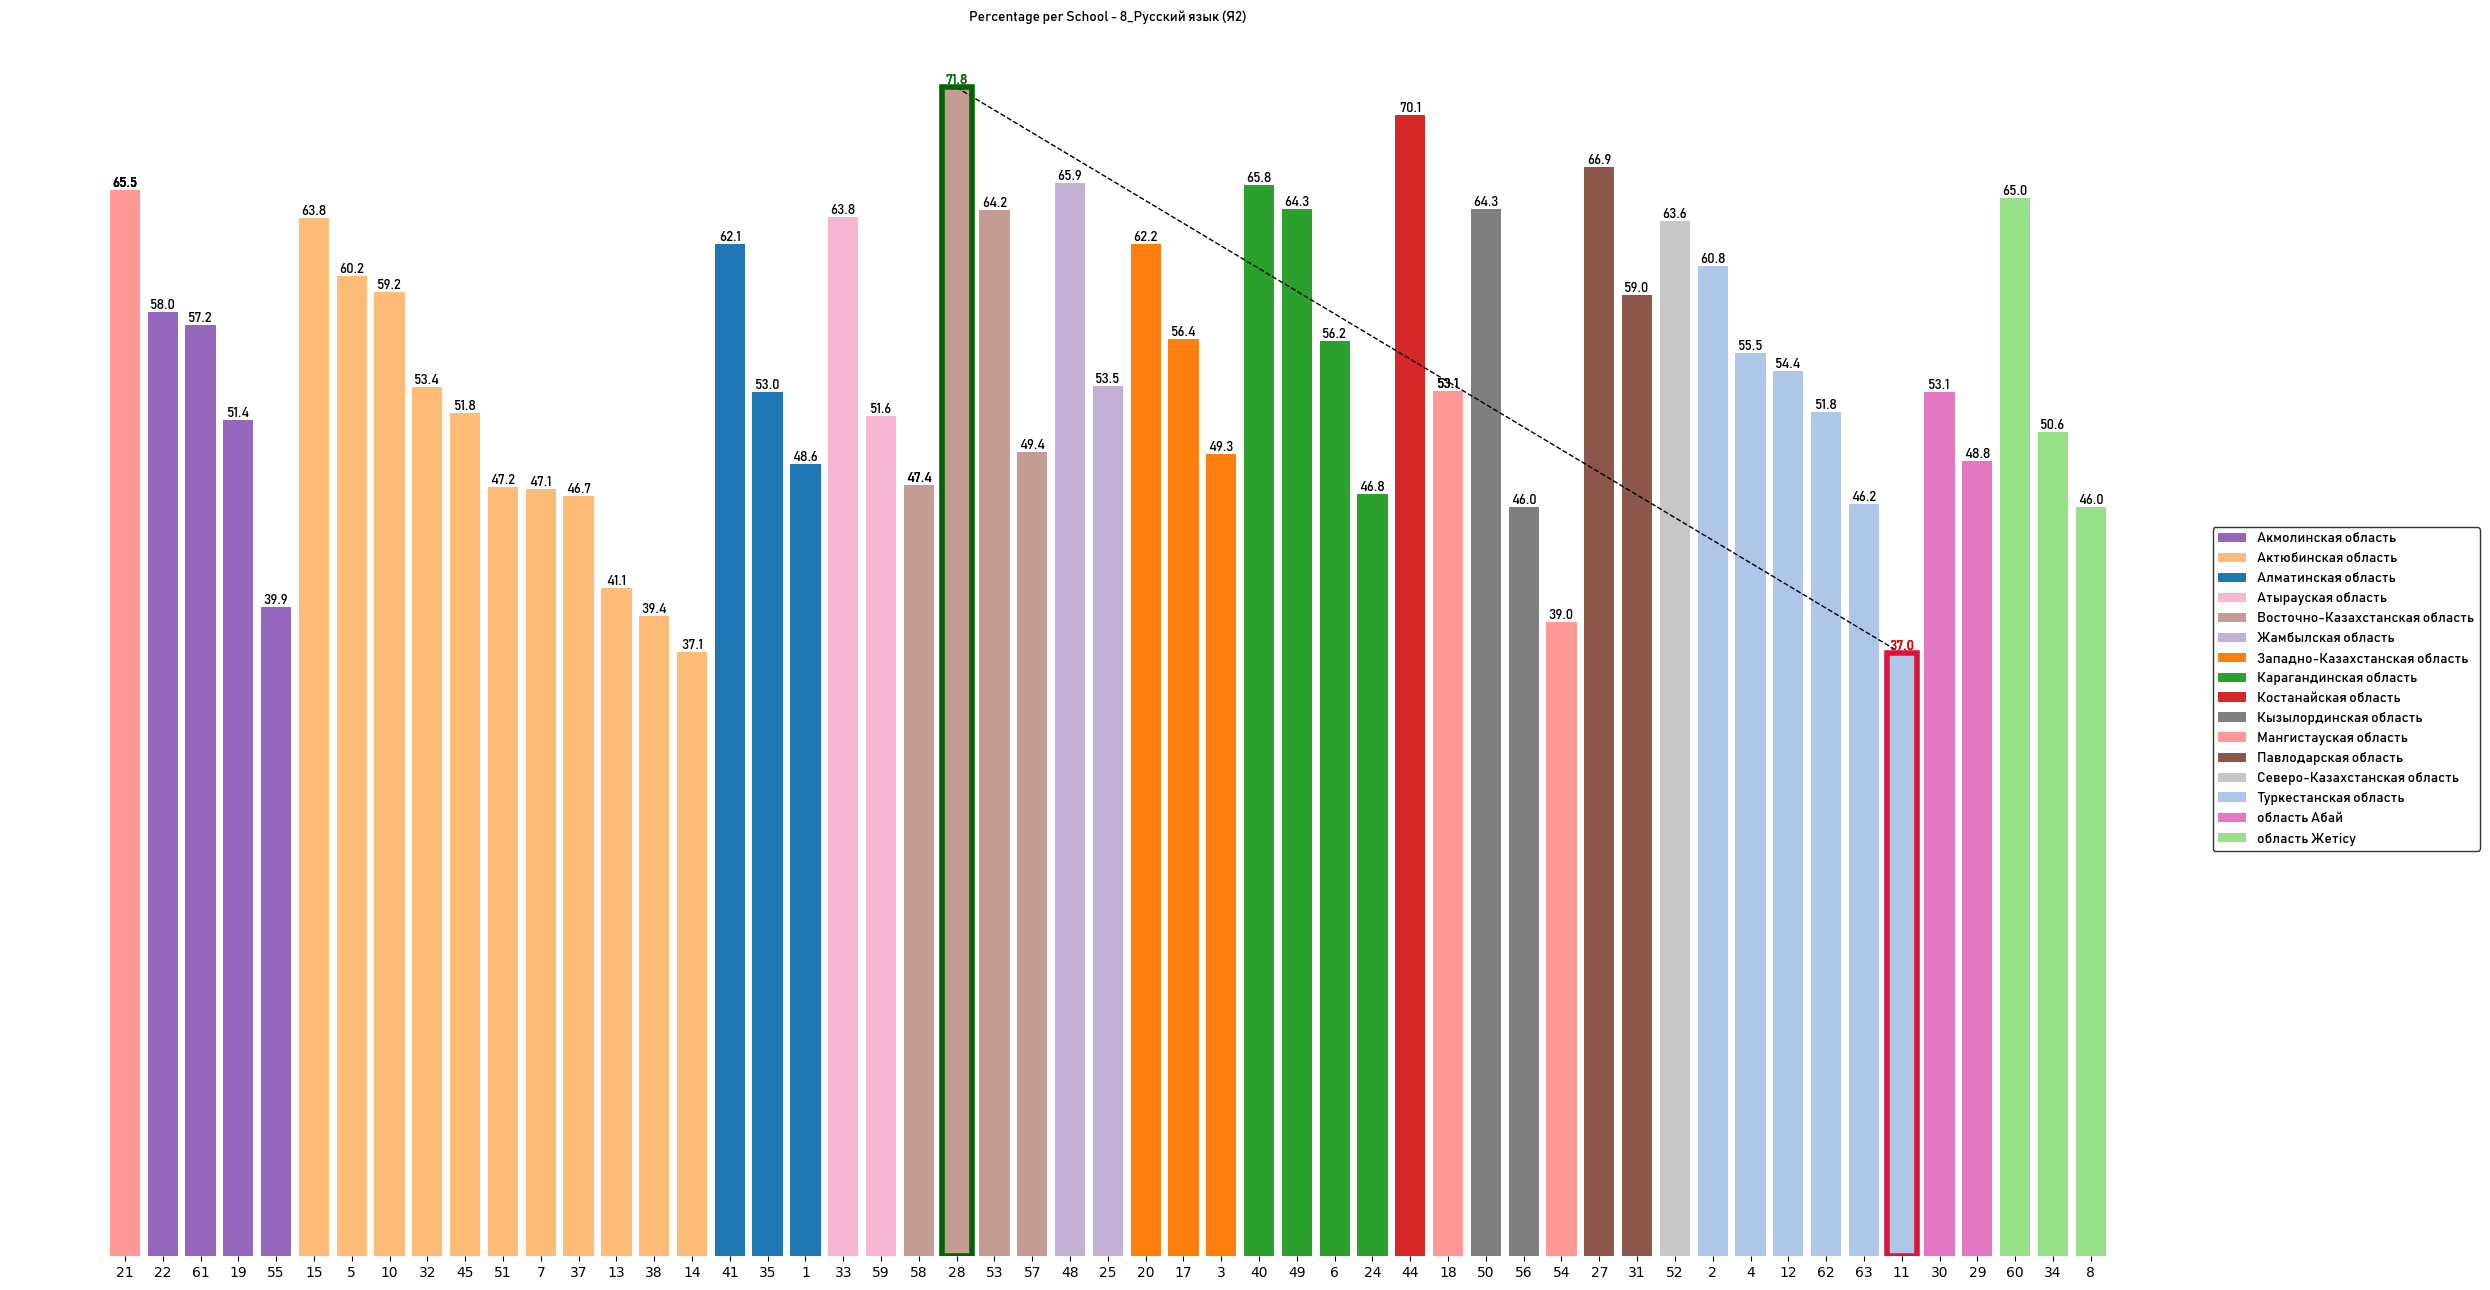

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


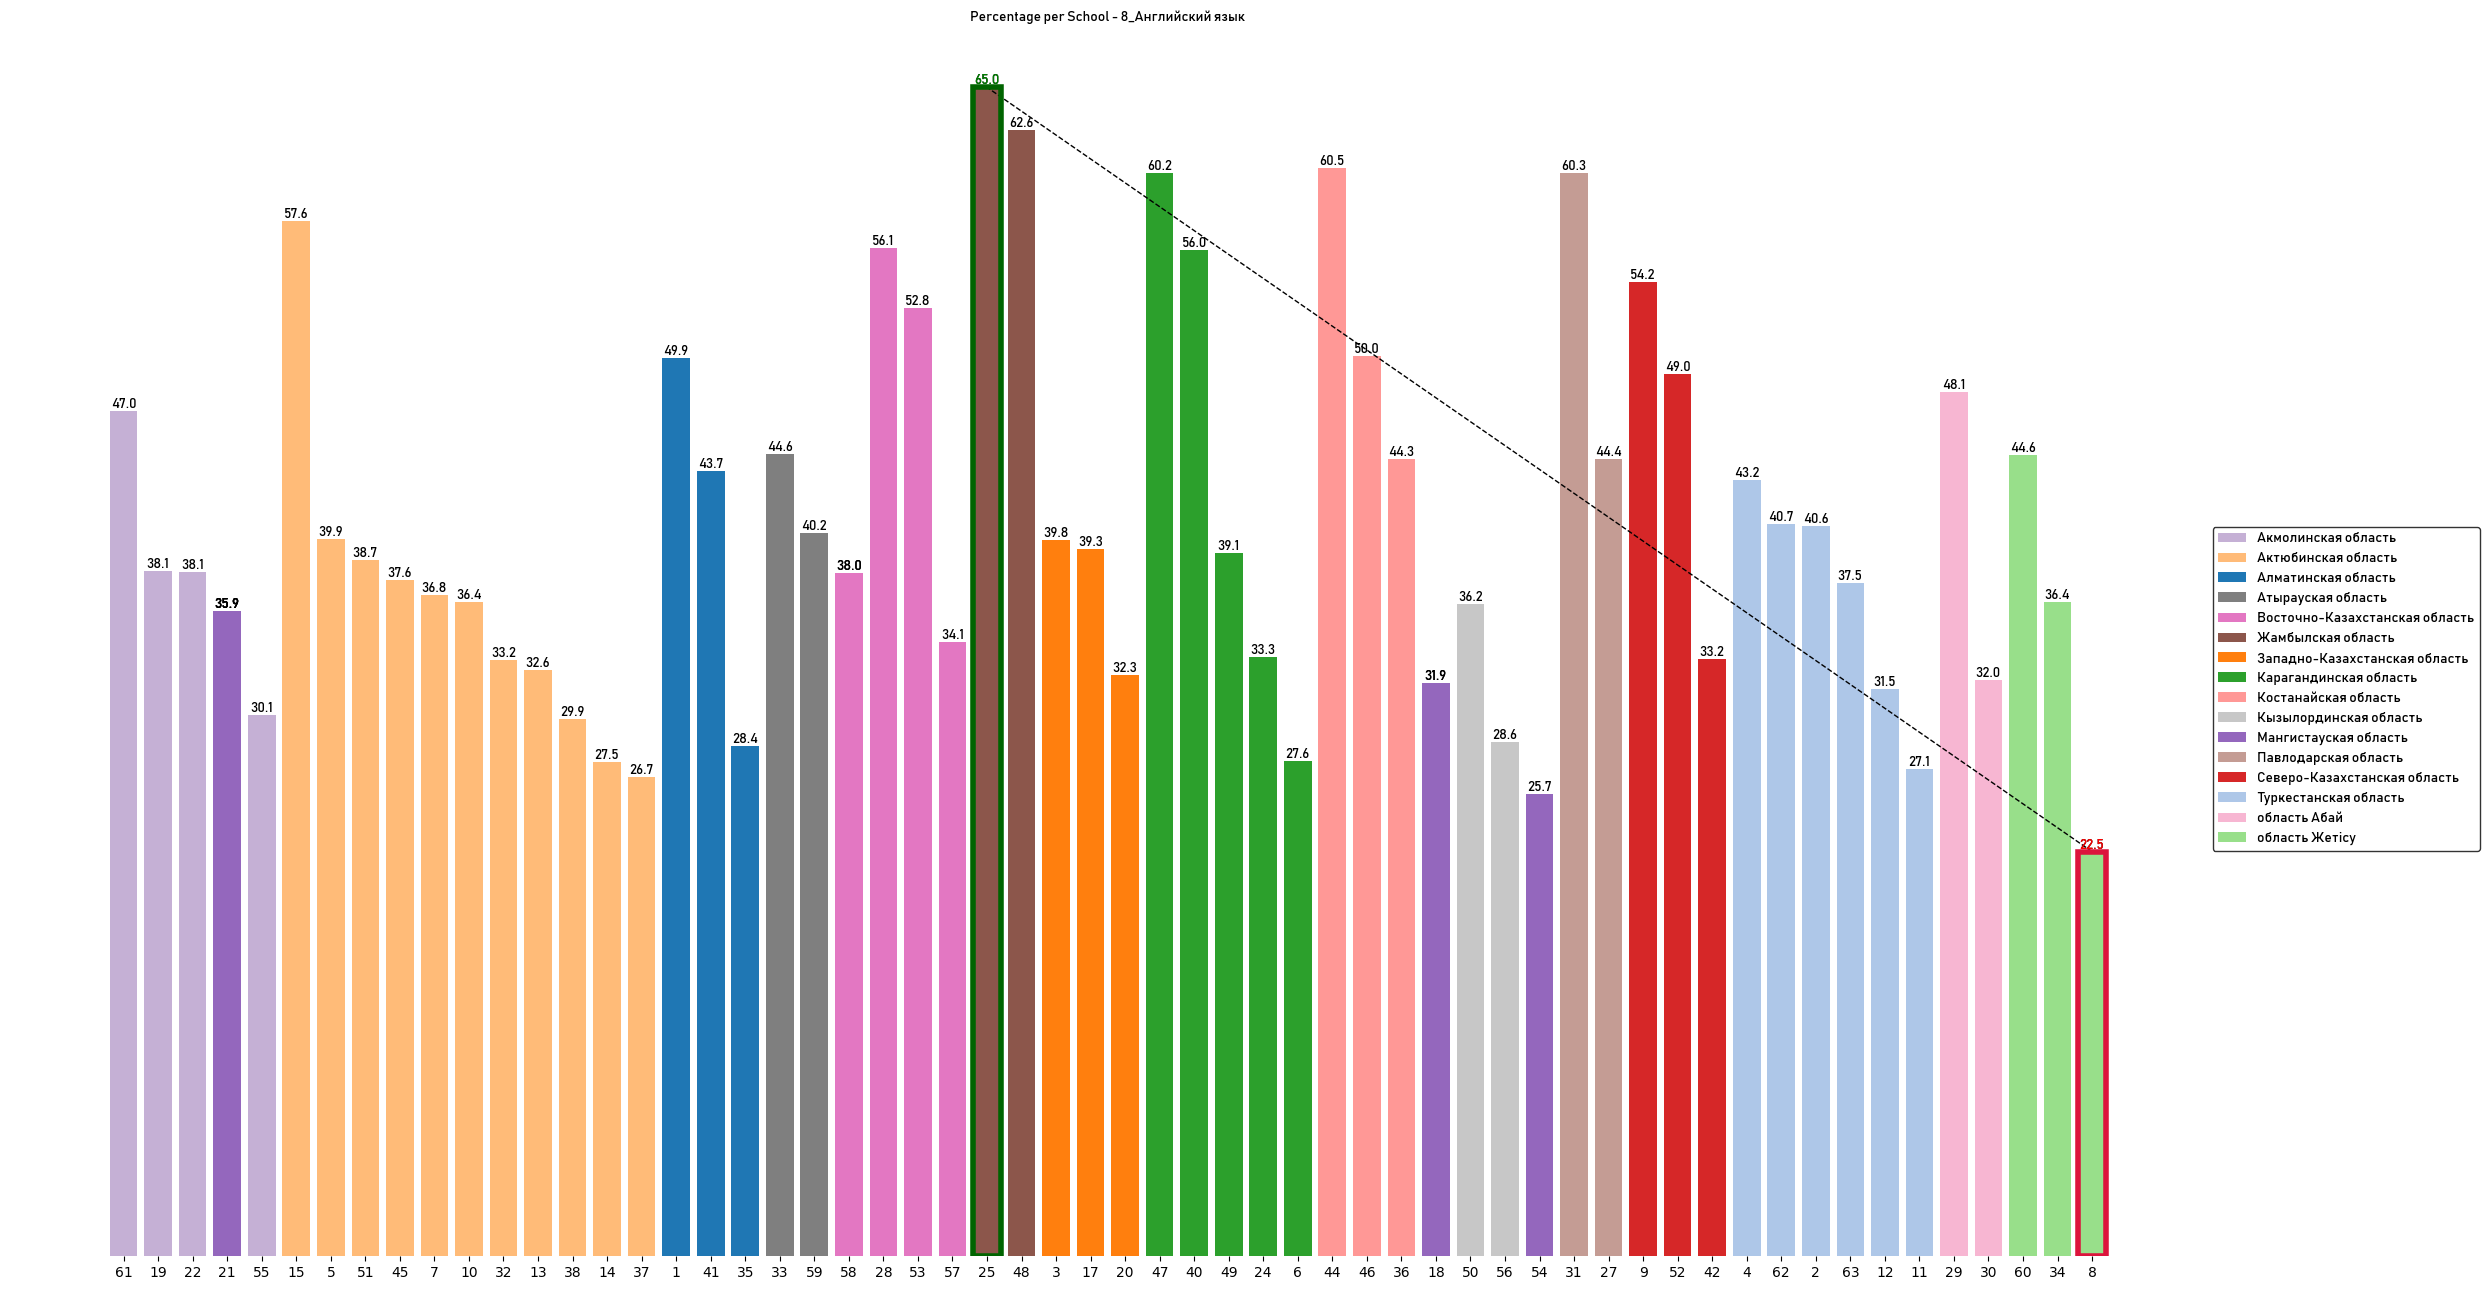

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


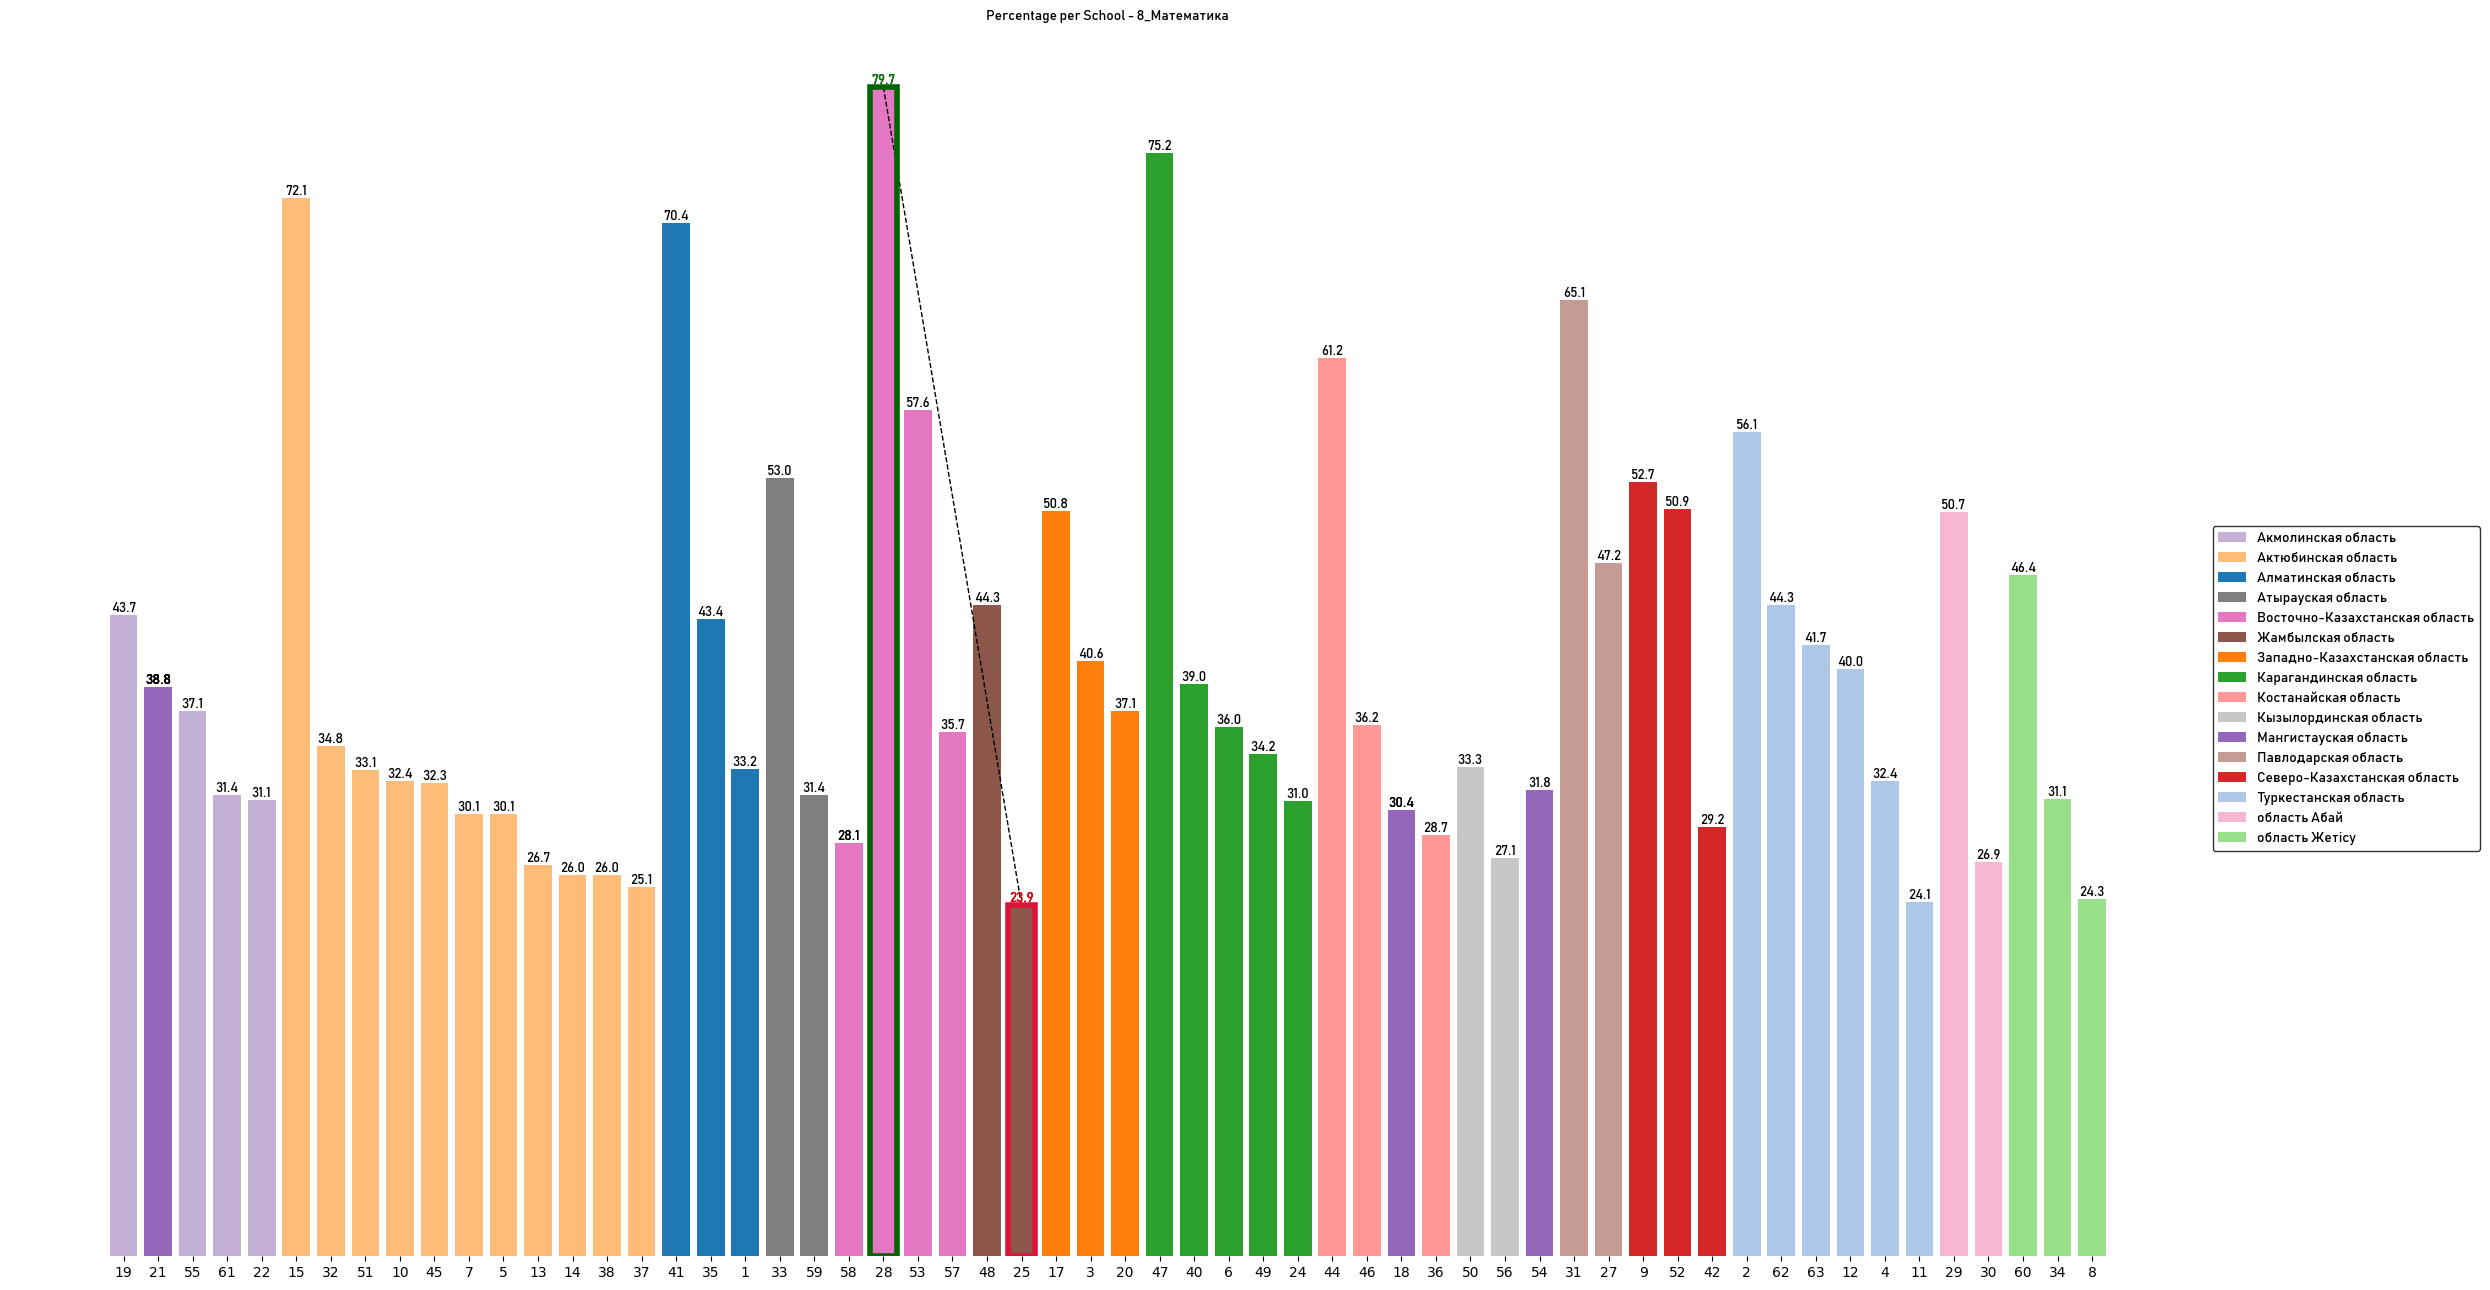

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


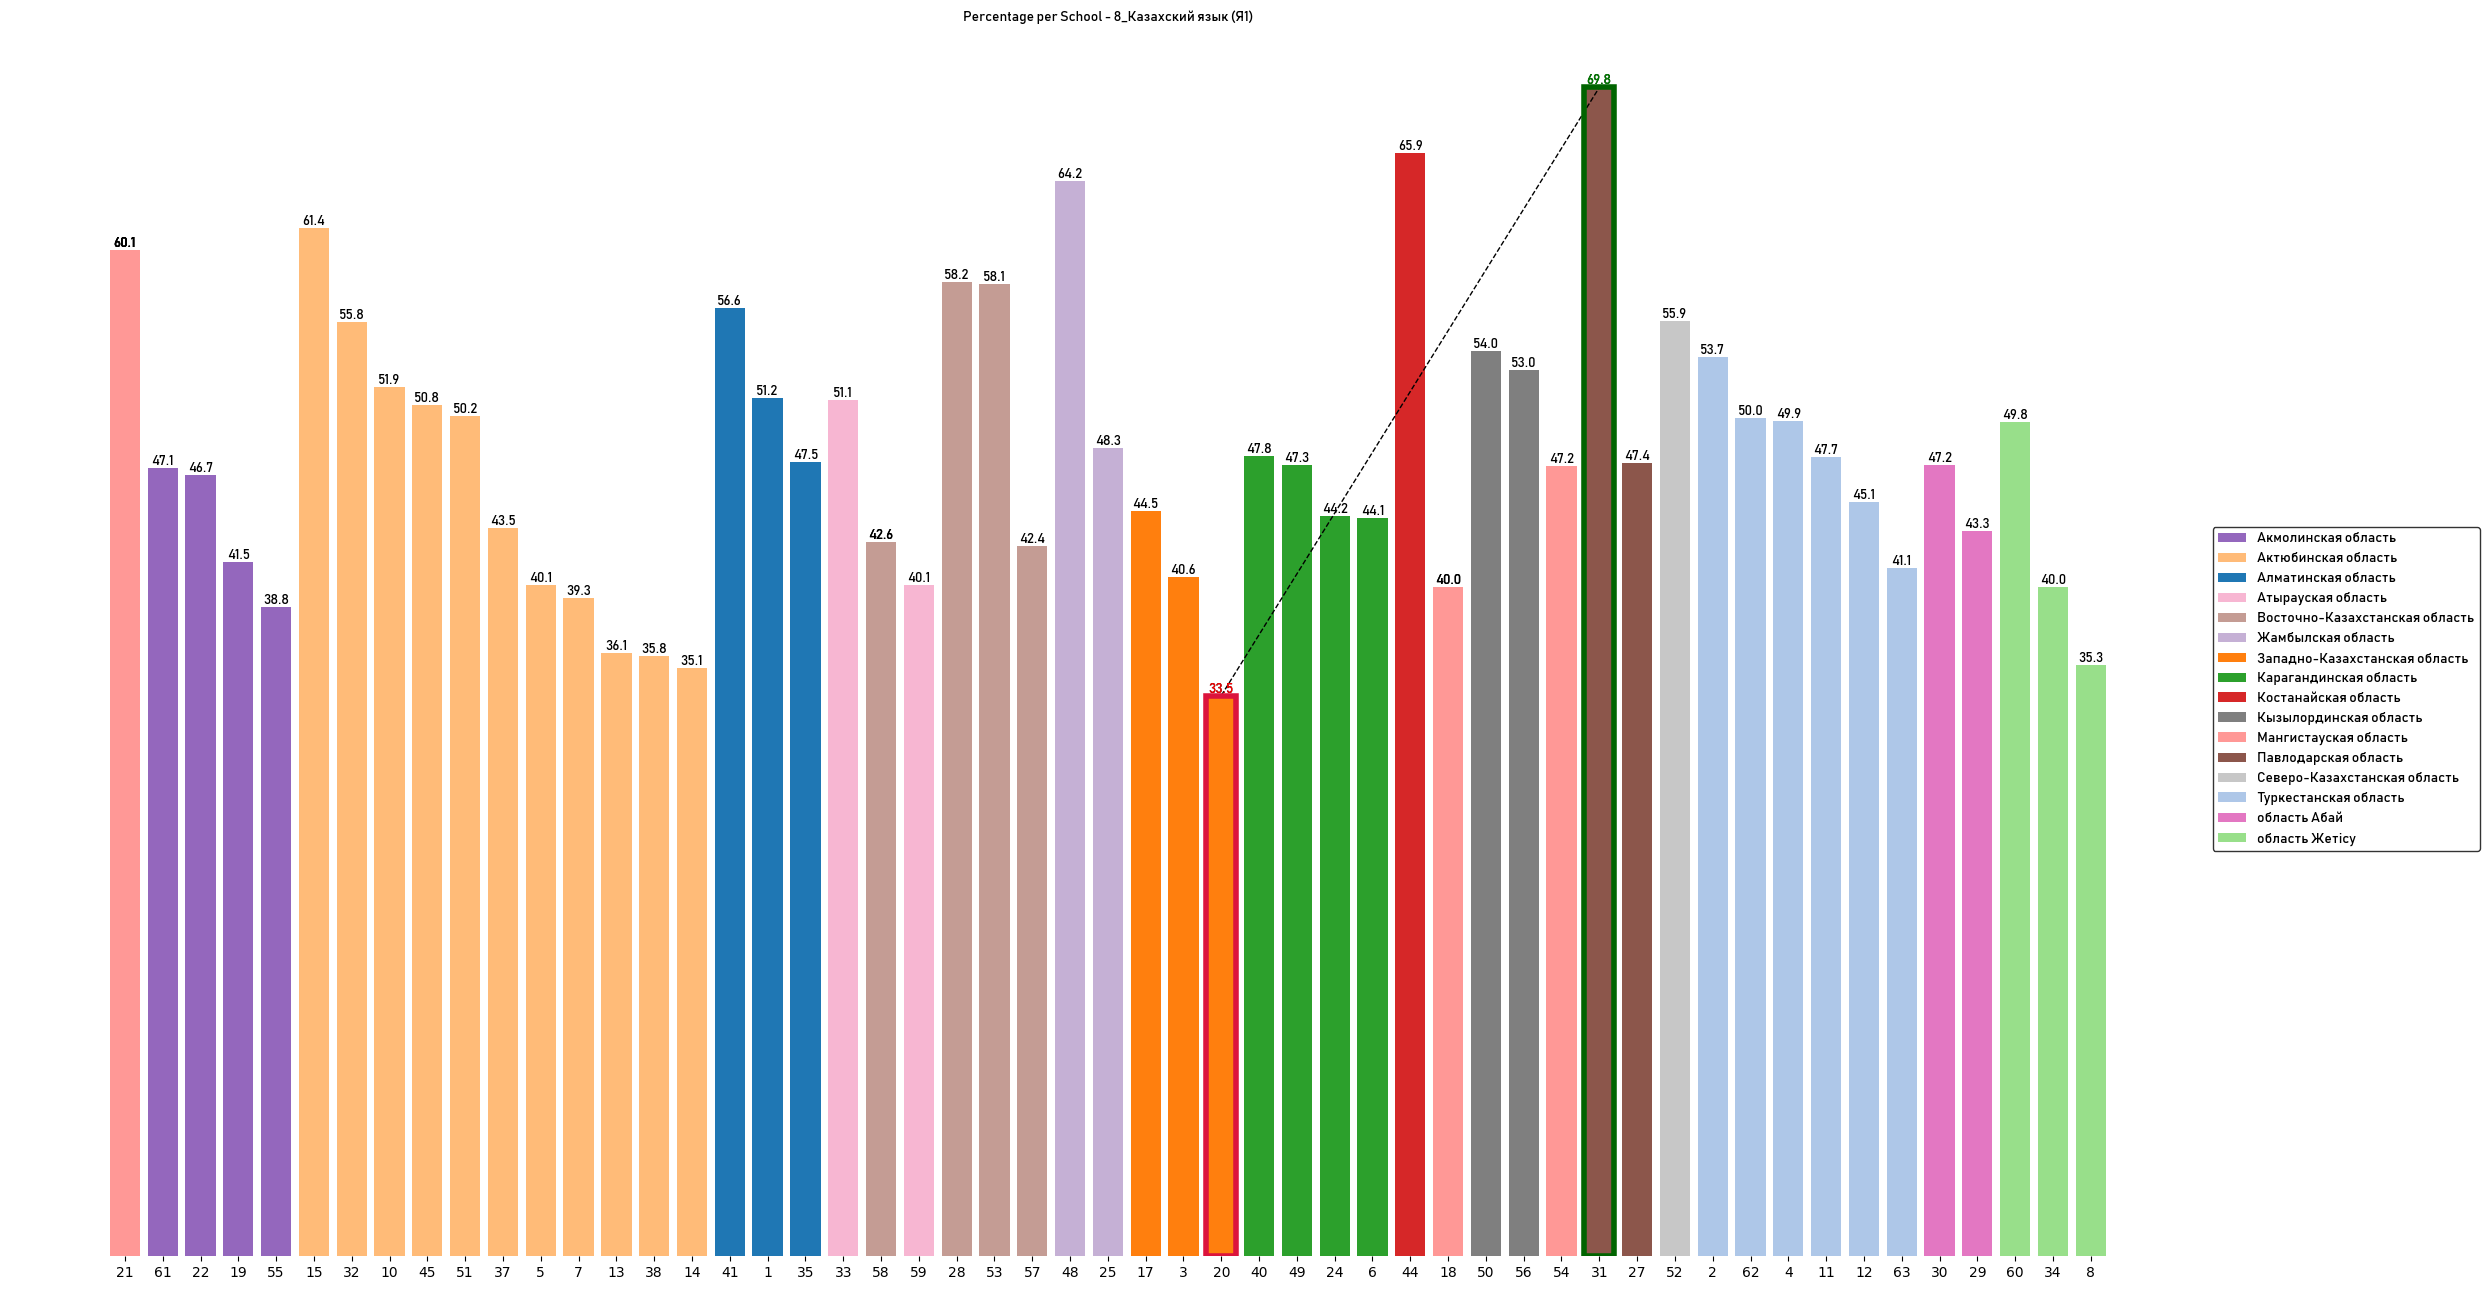

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


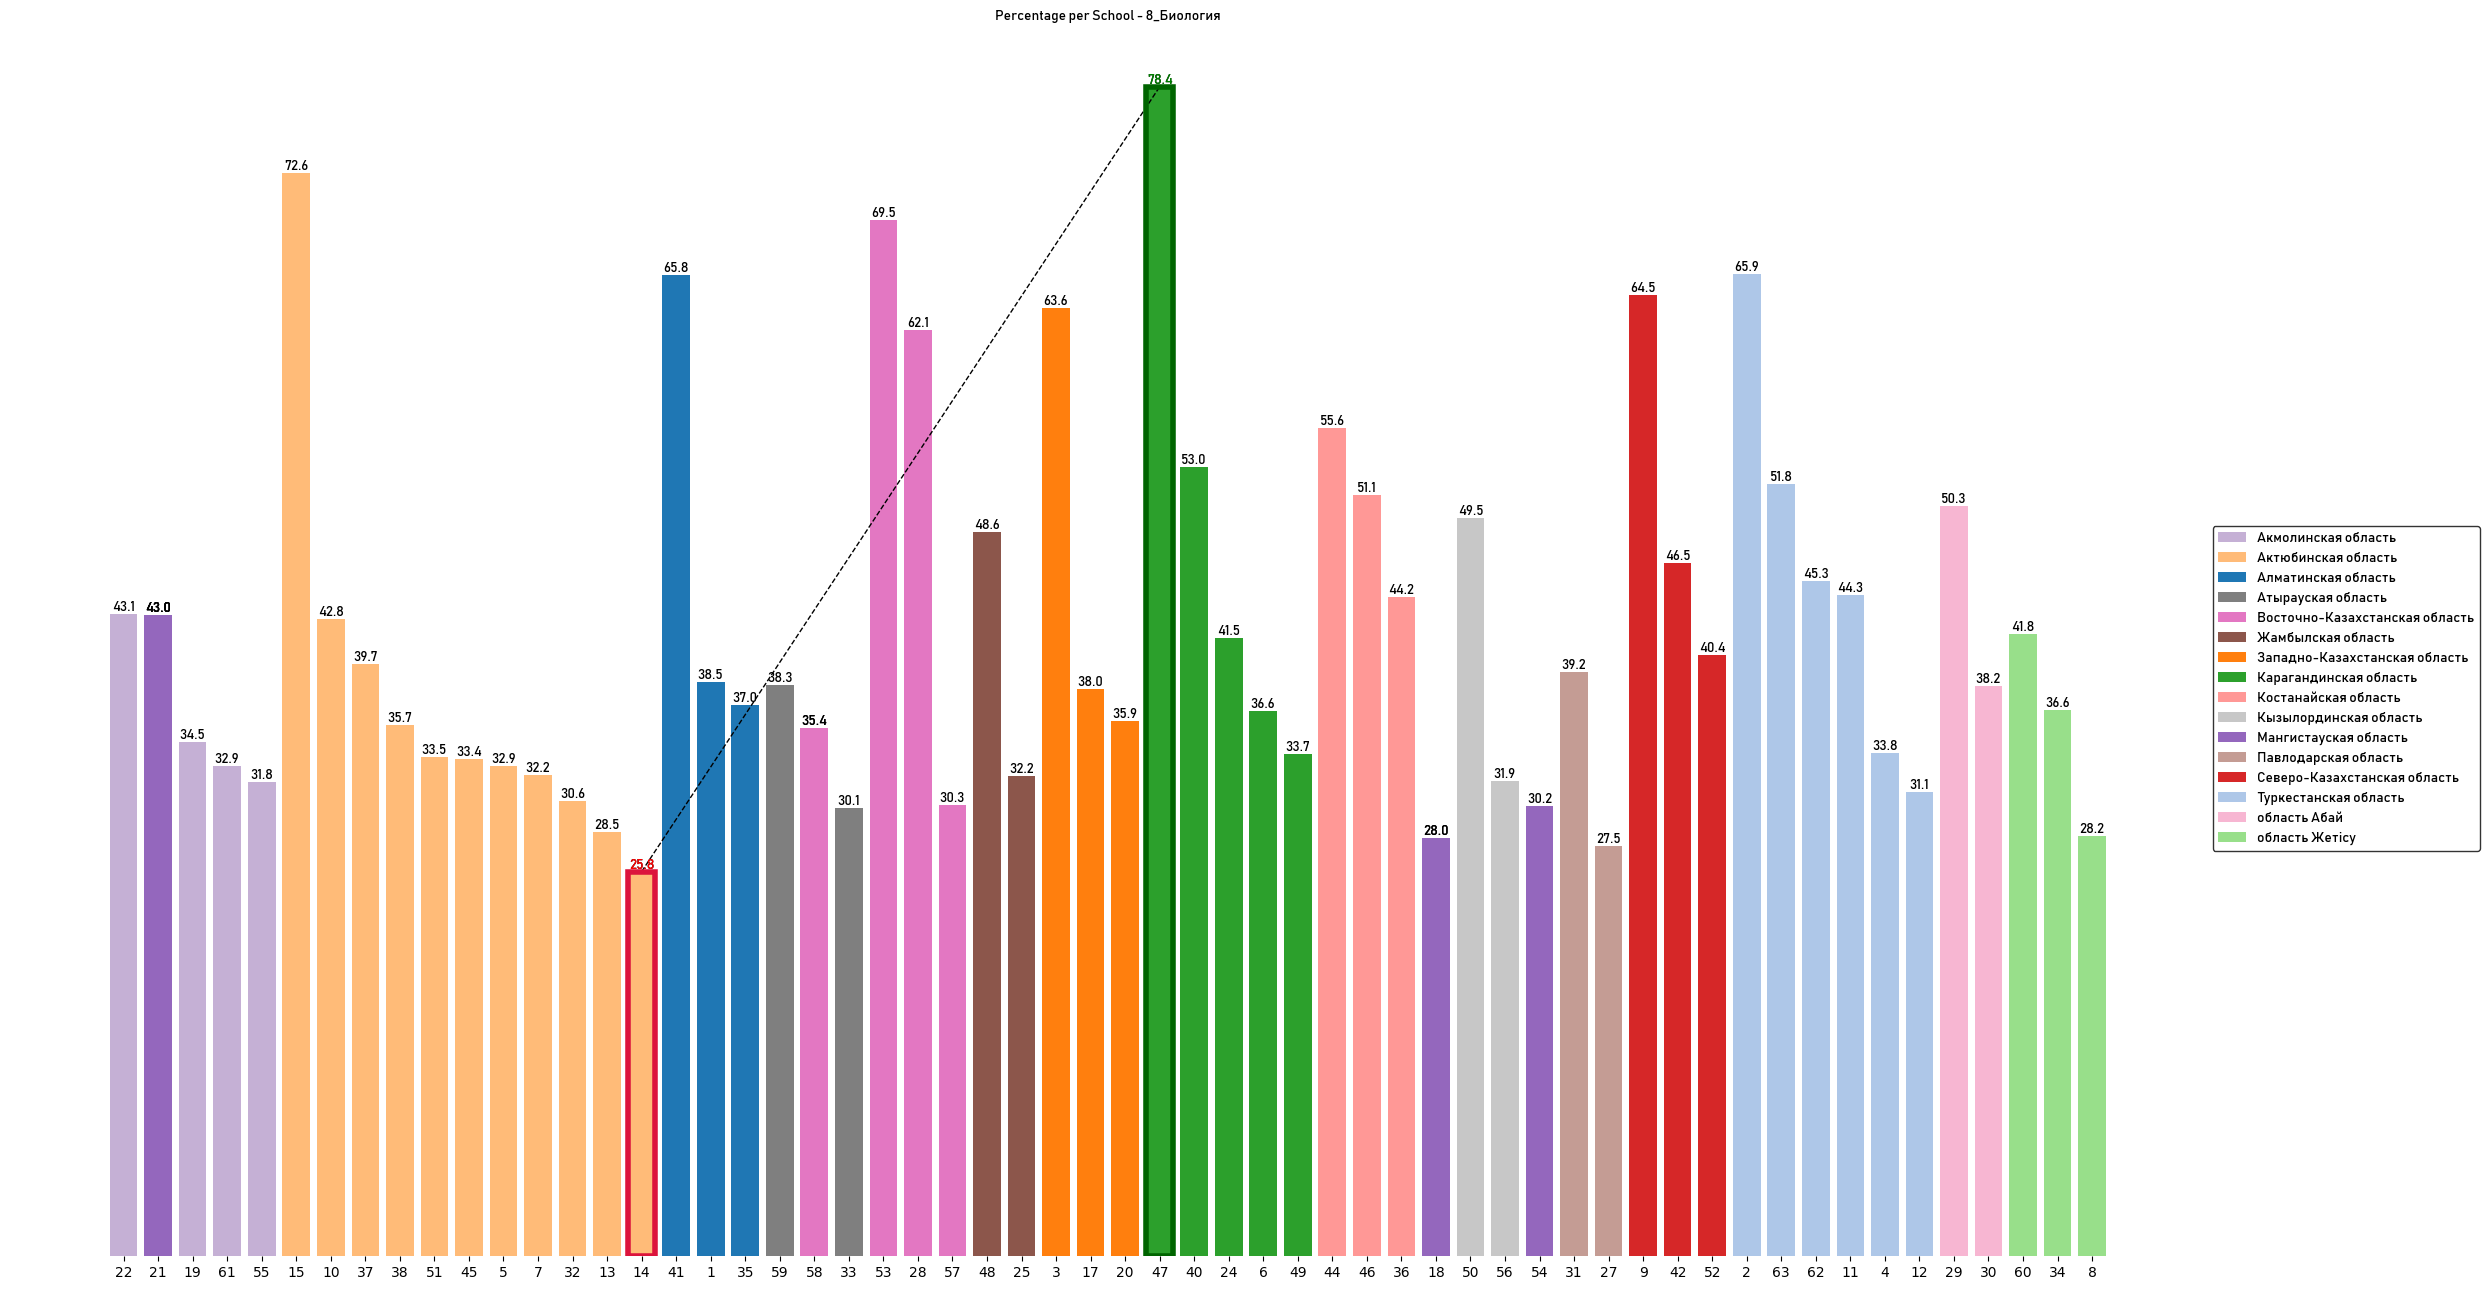

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


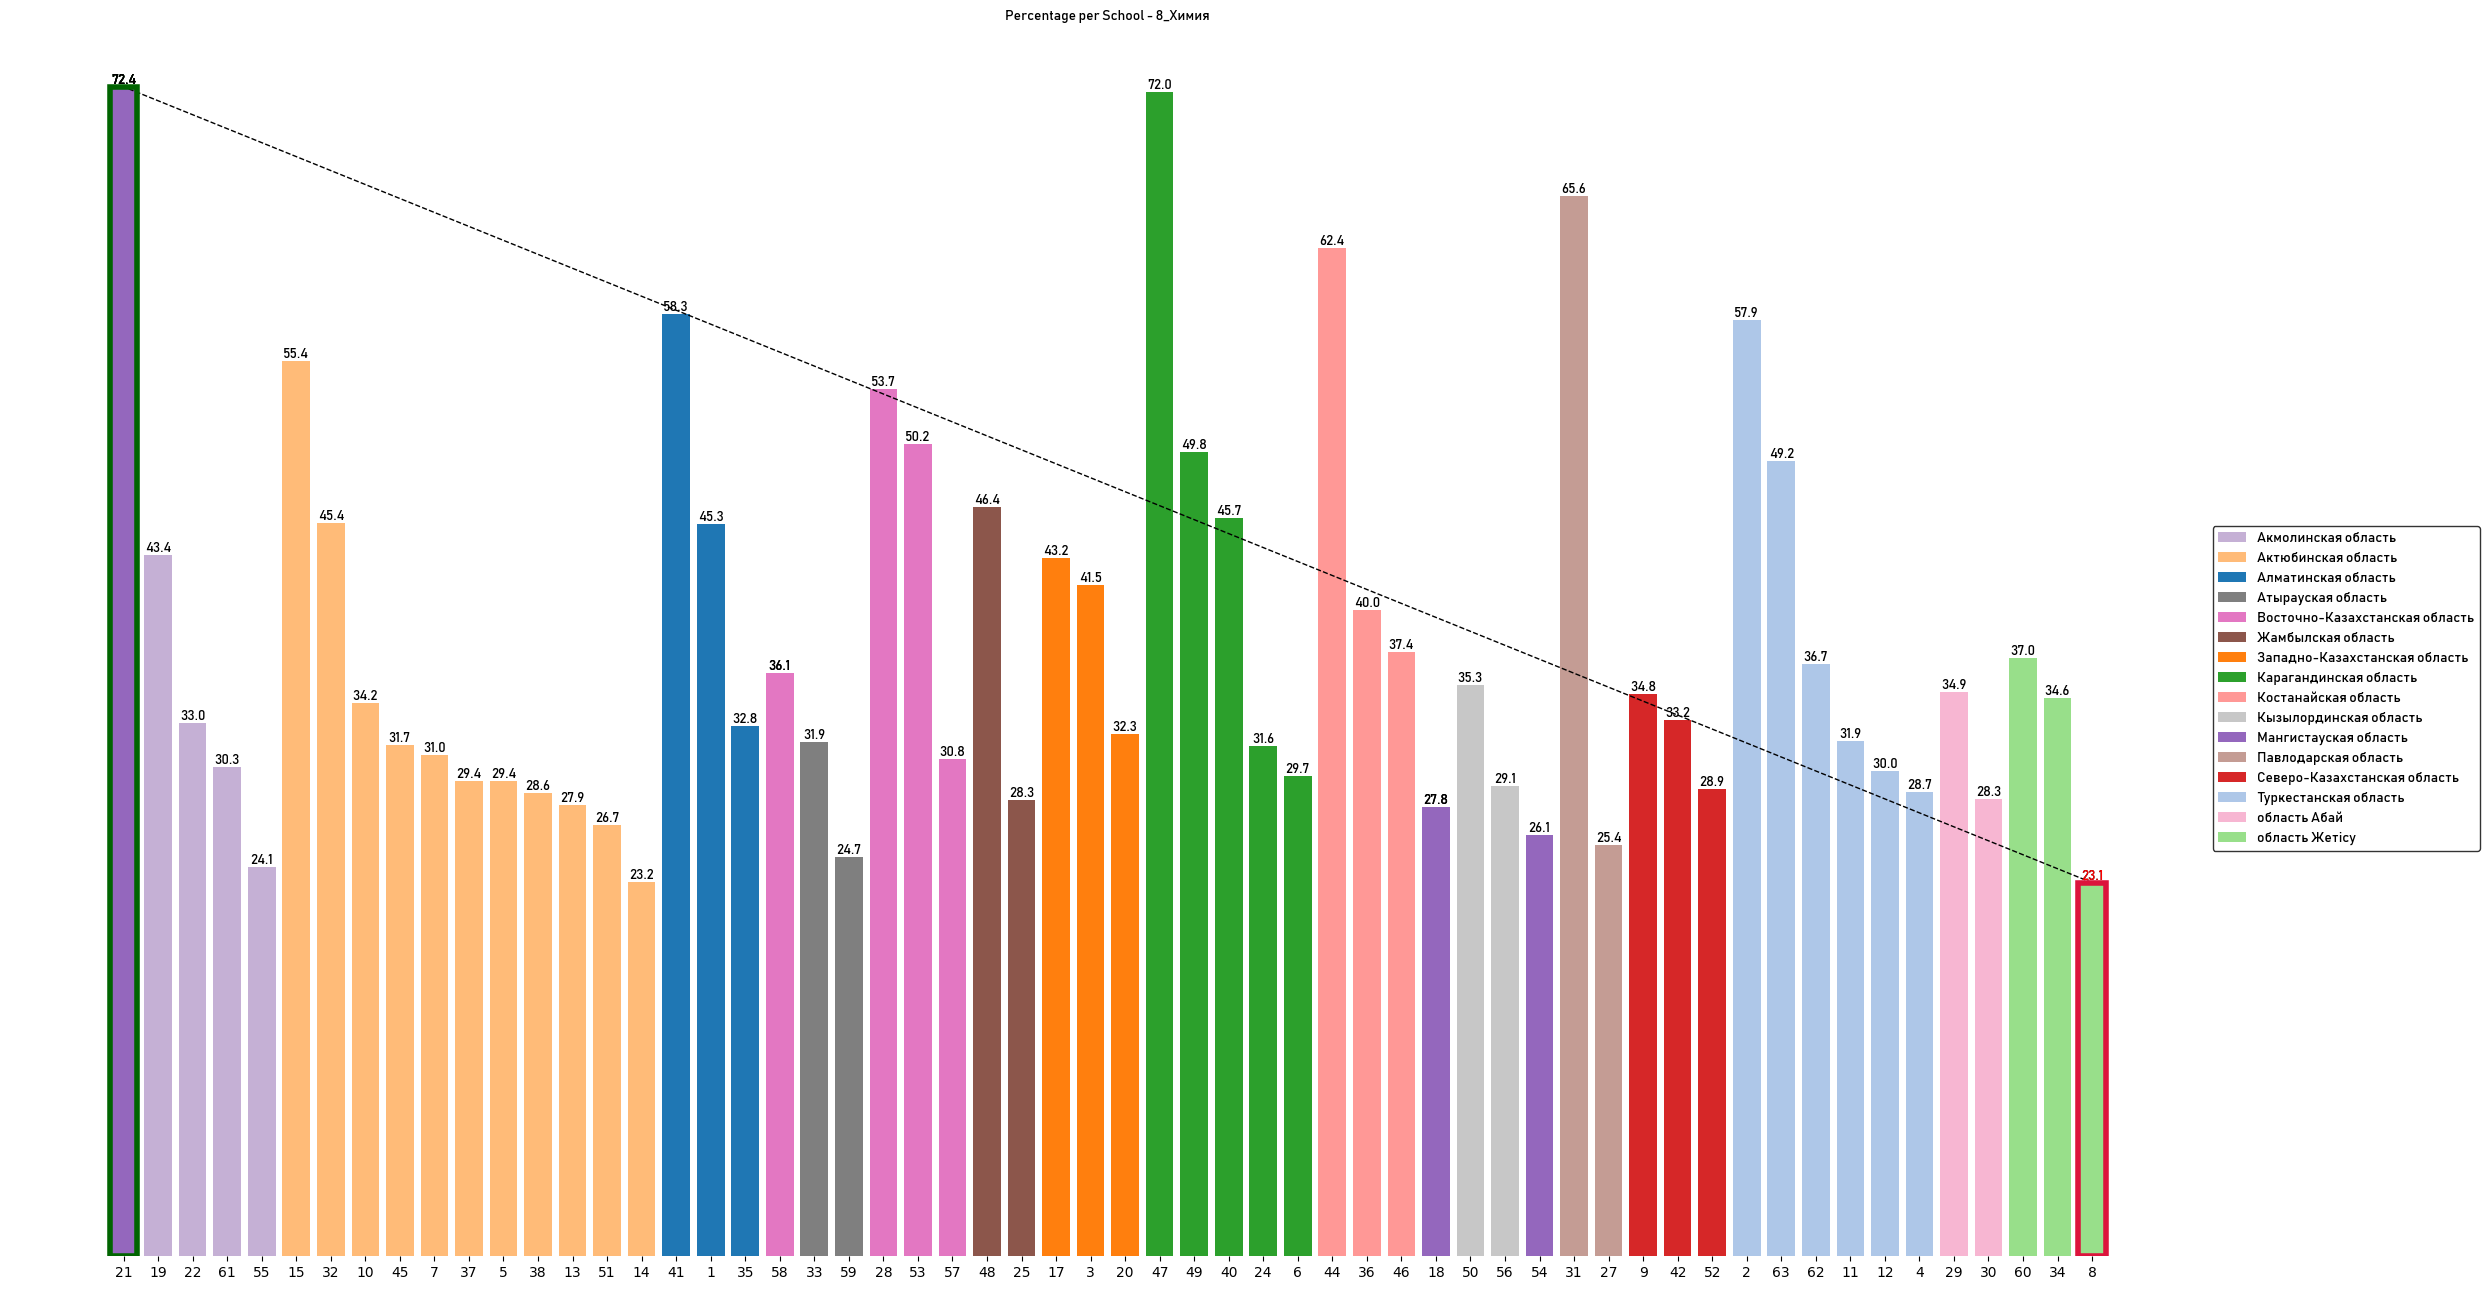

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


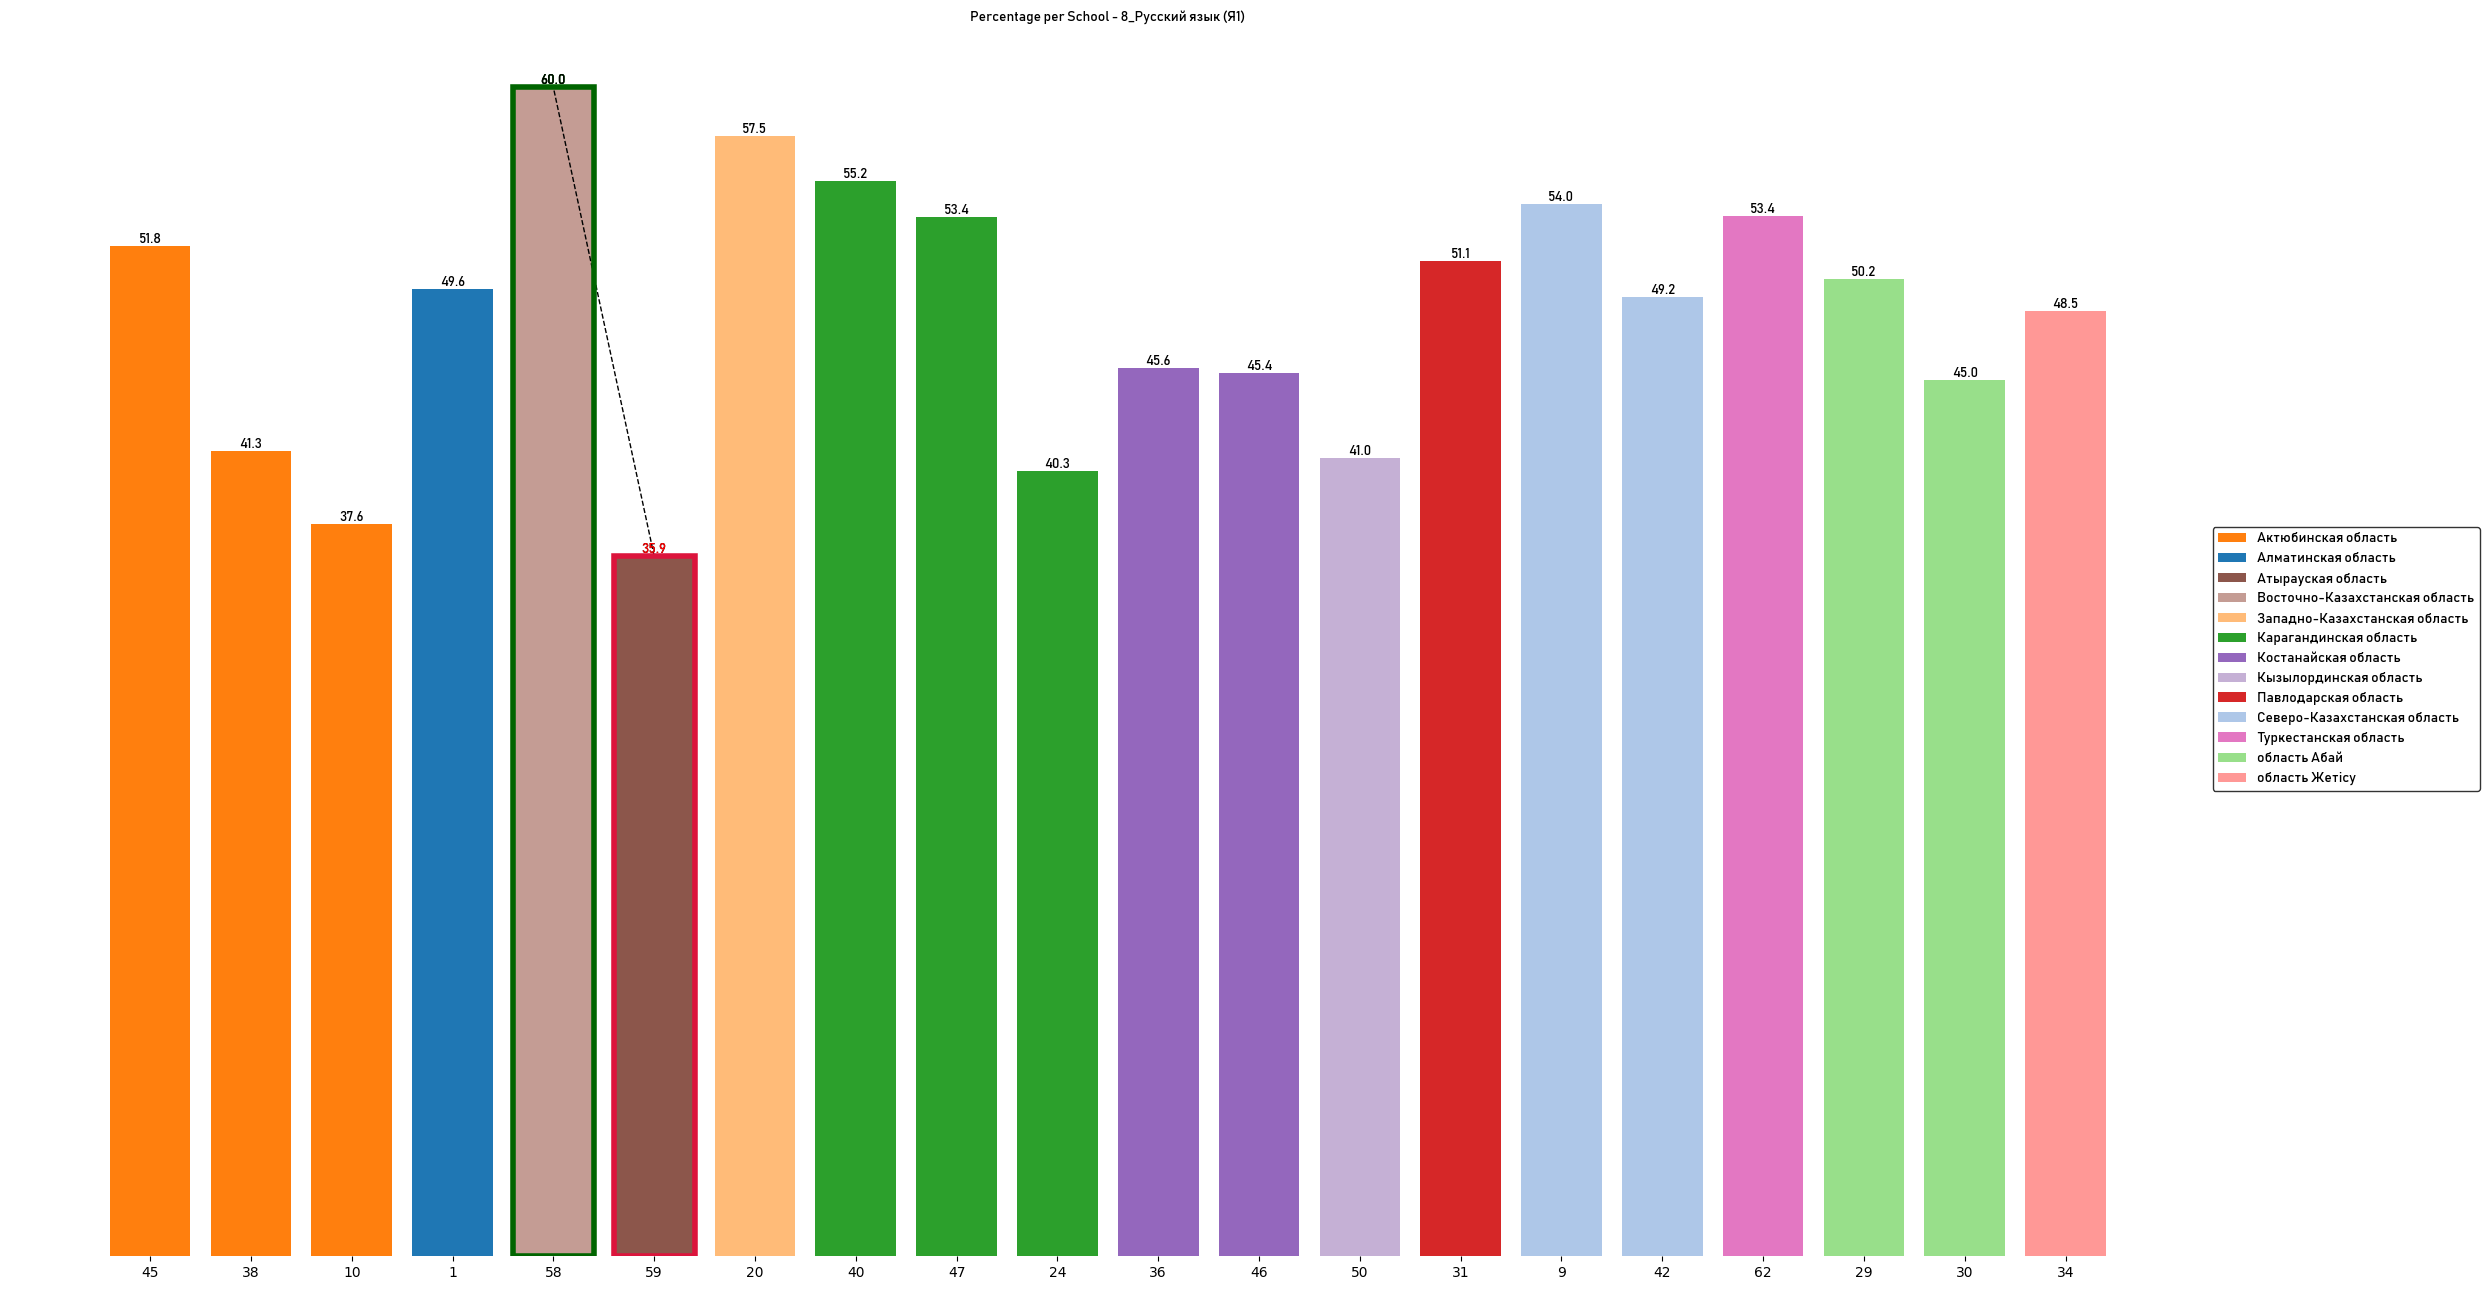

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


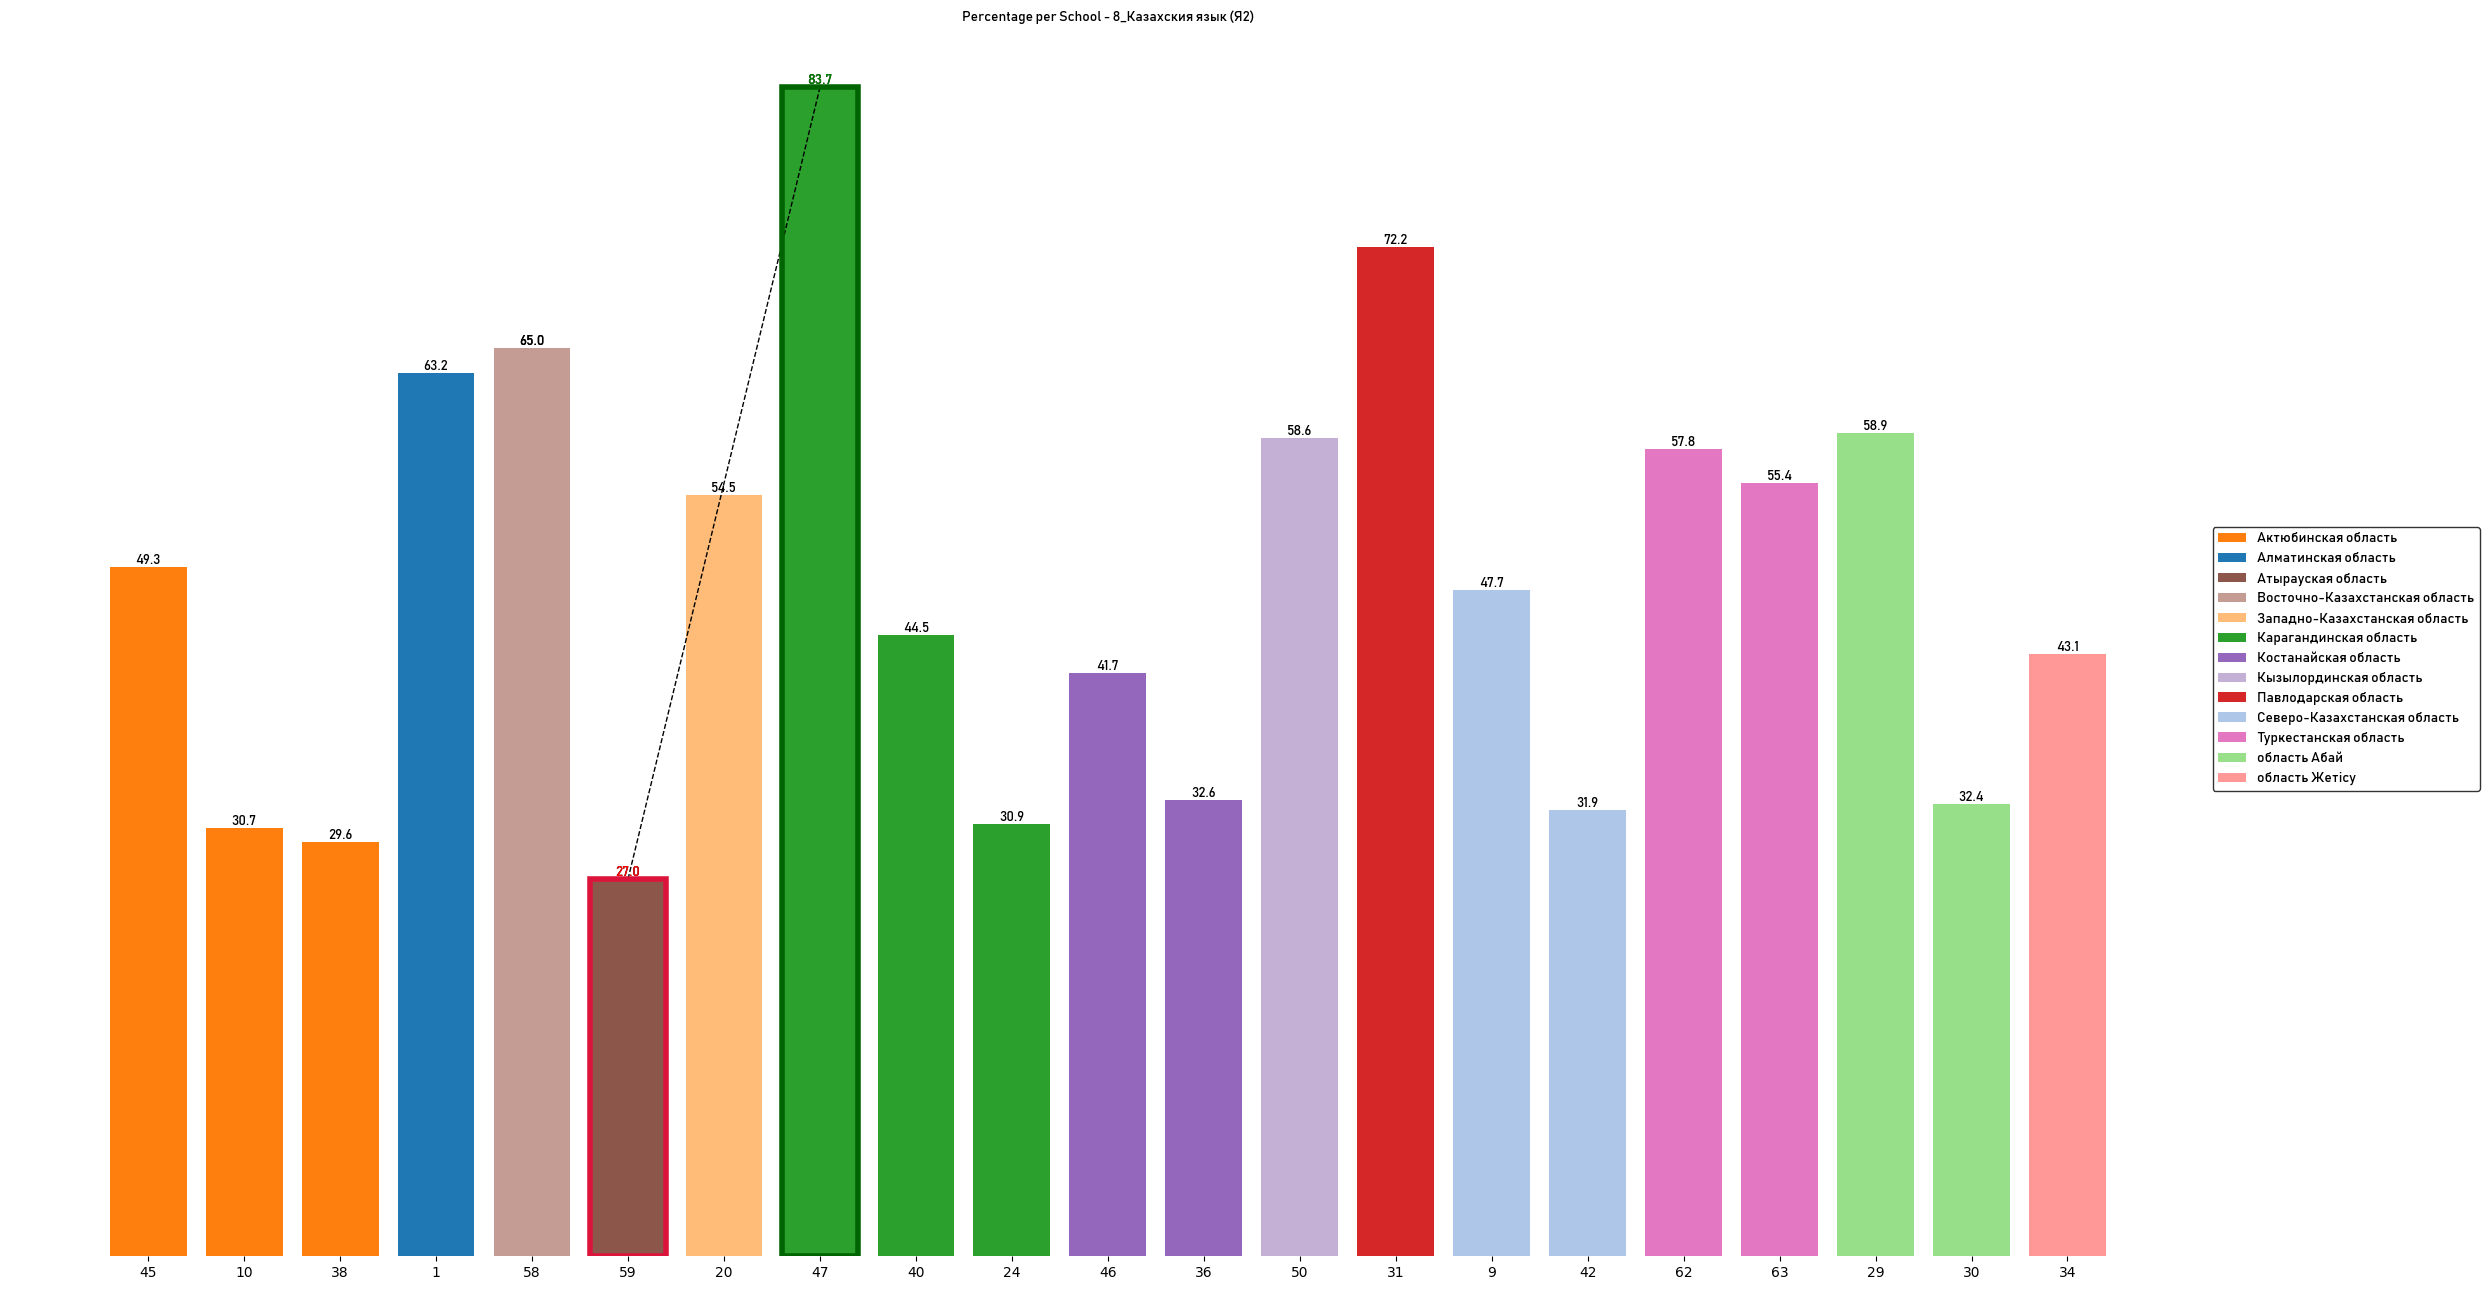

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


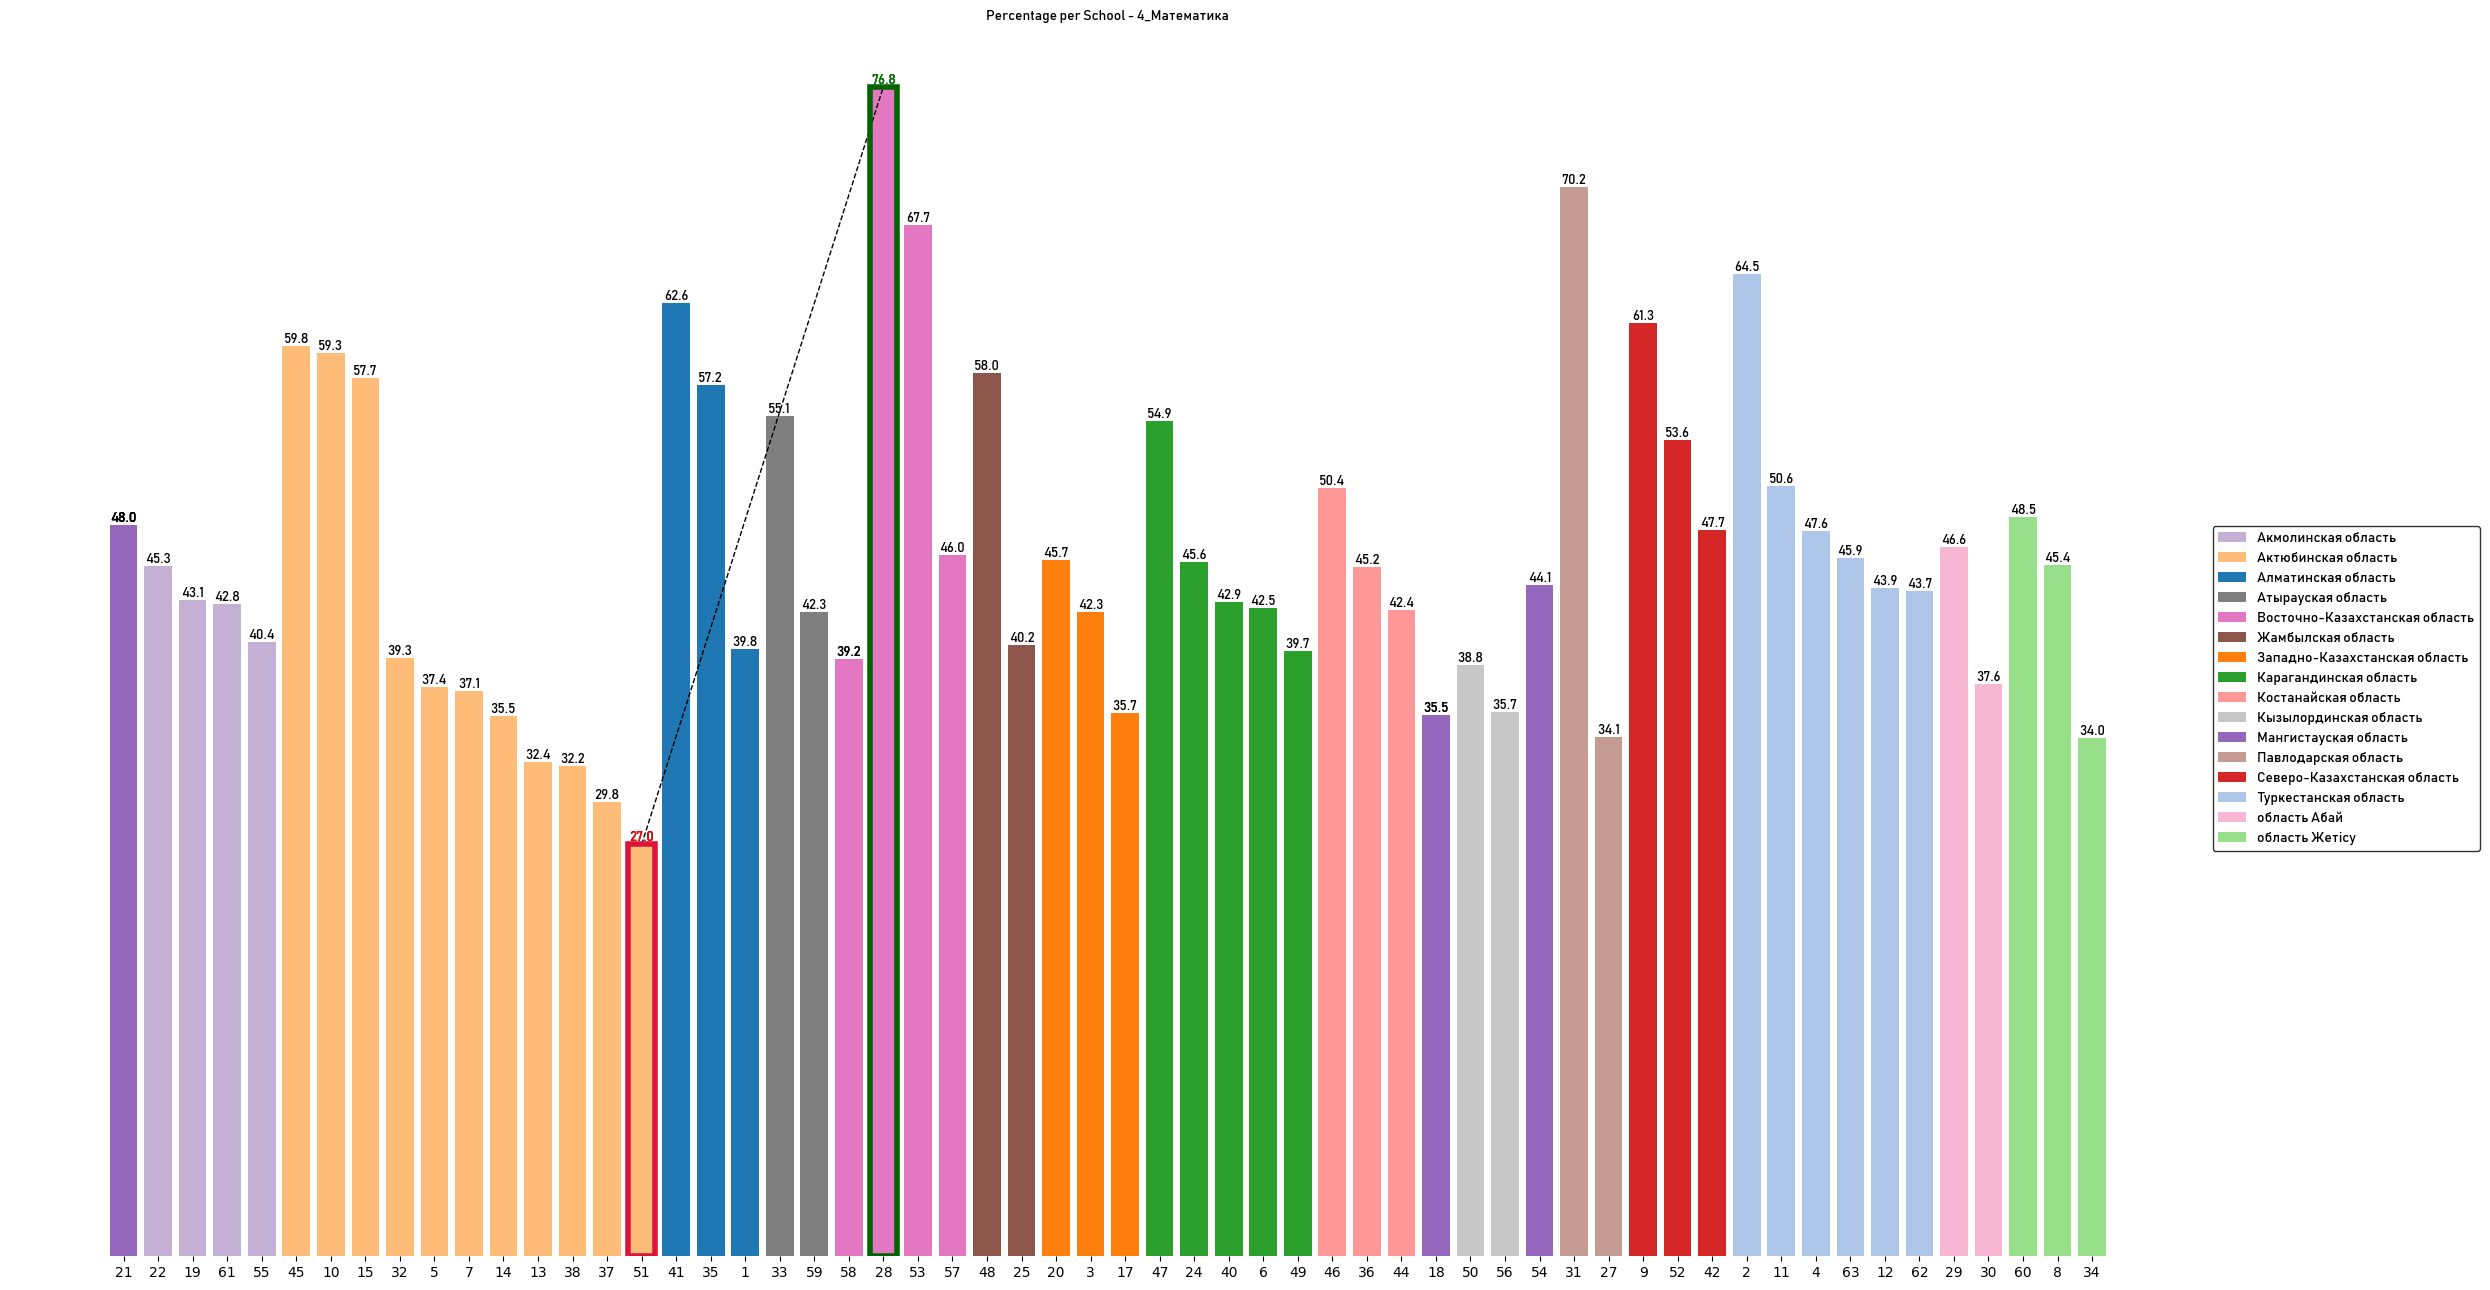

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


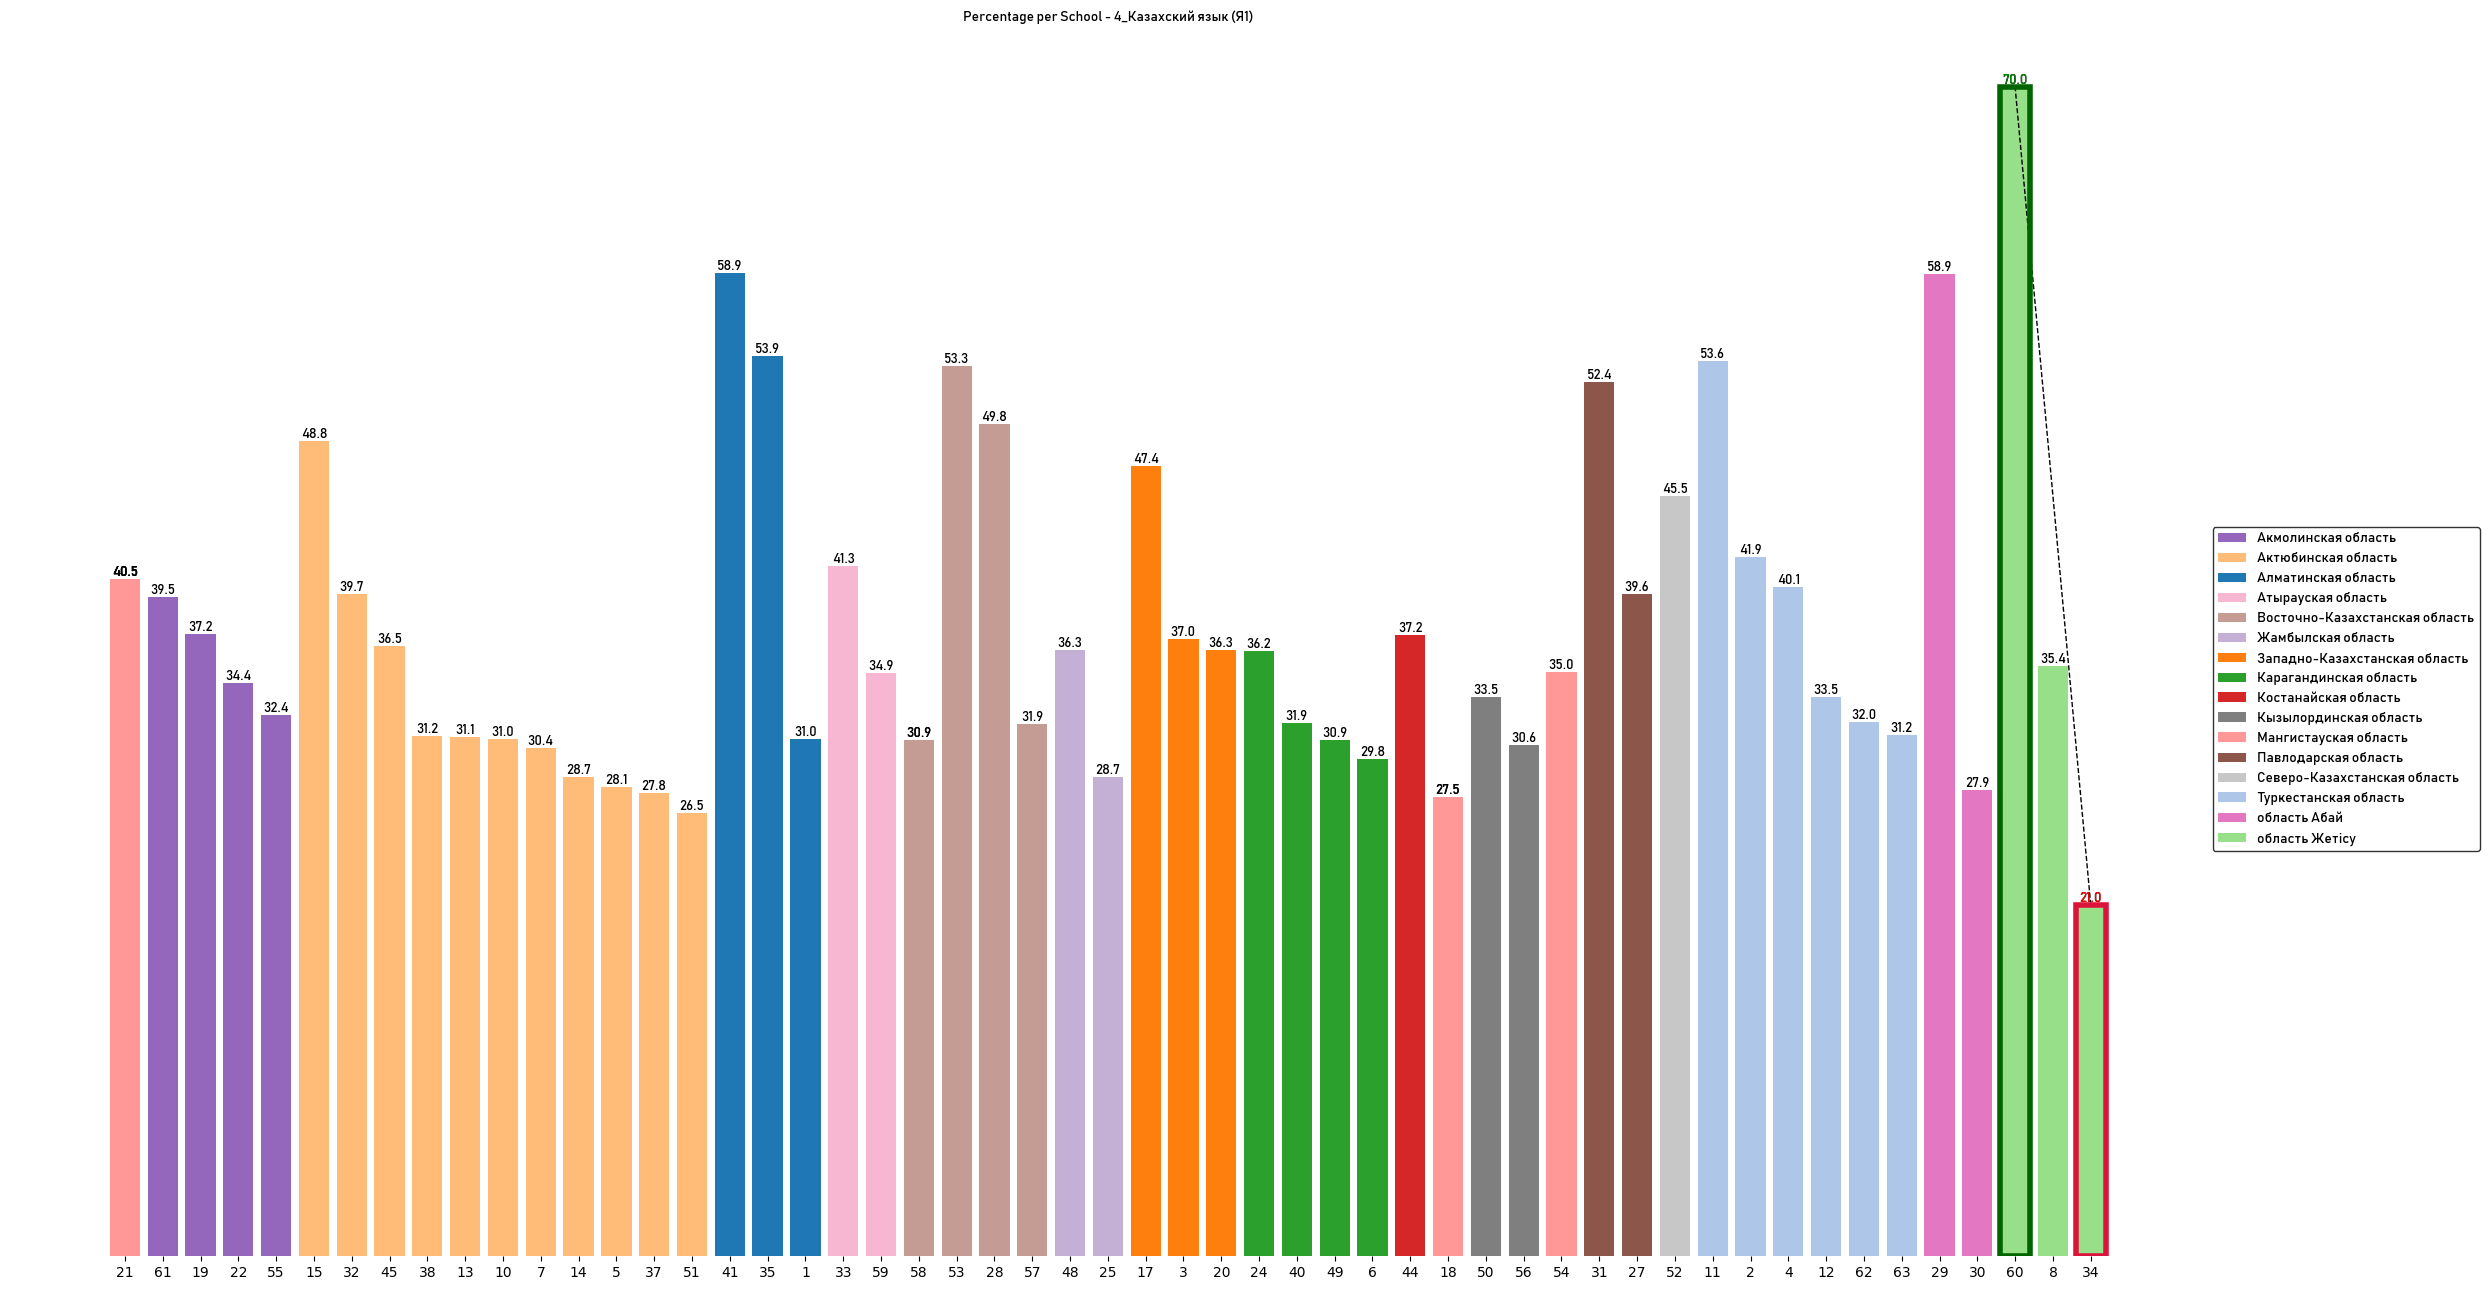

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


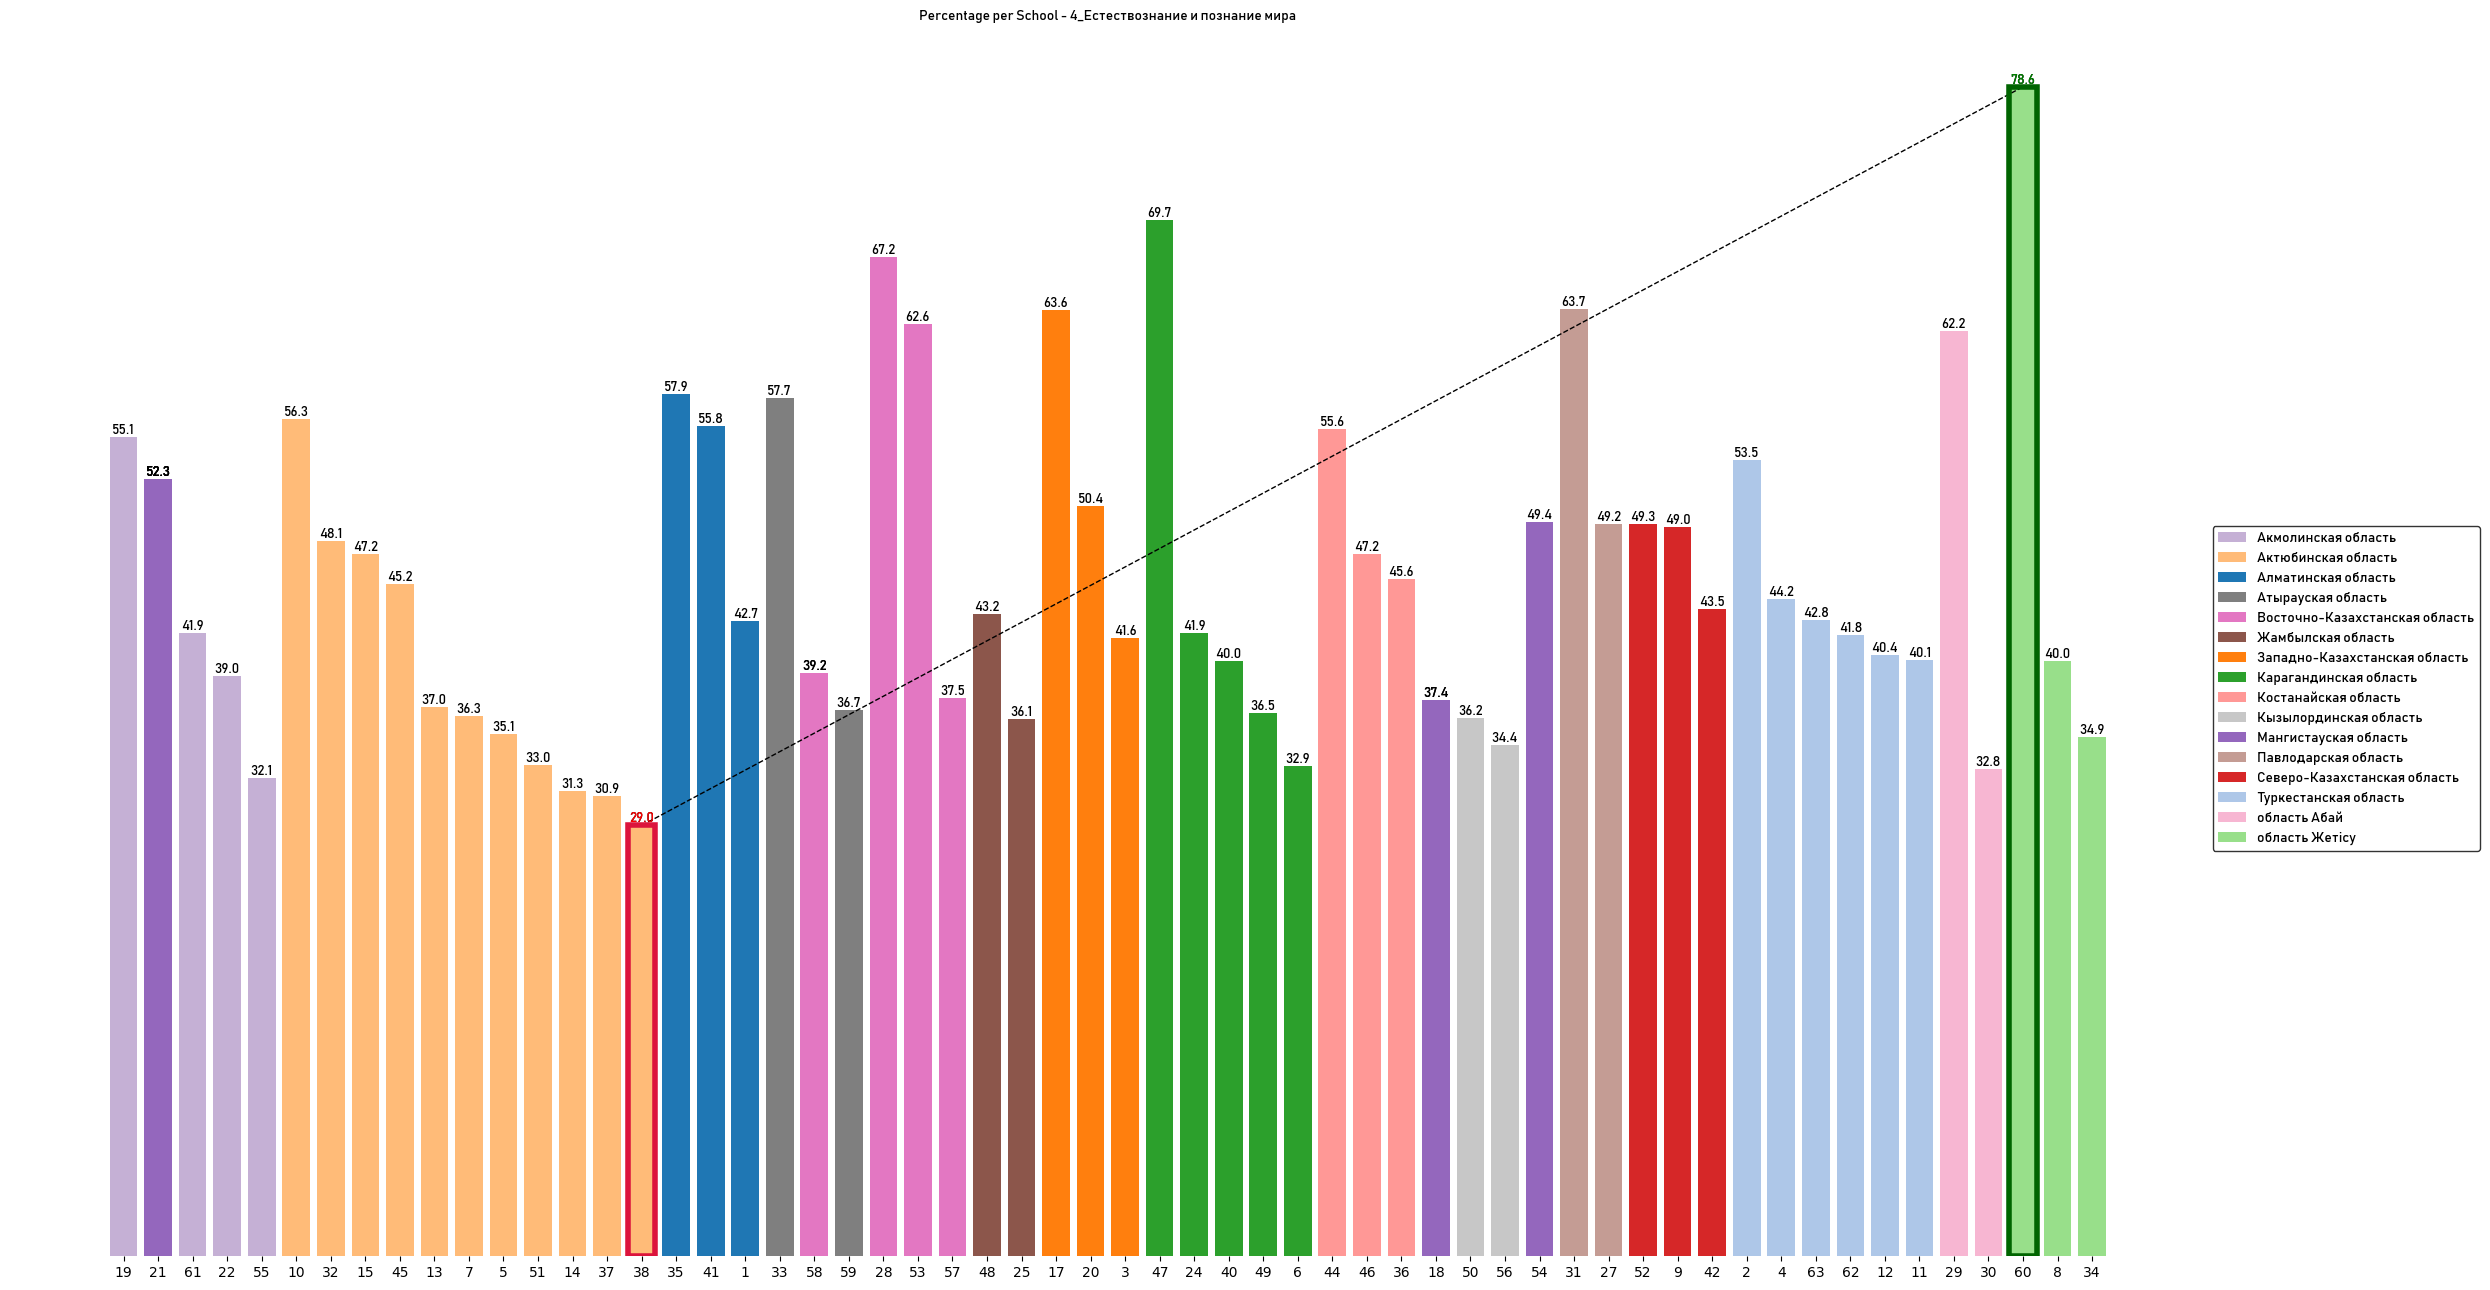

C:\Users\kassenov_r\AppData\Local\Temp\ipykernel_760\2713807468.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_dict[region] = plt.cm.get_cmap('tab20')(i)


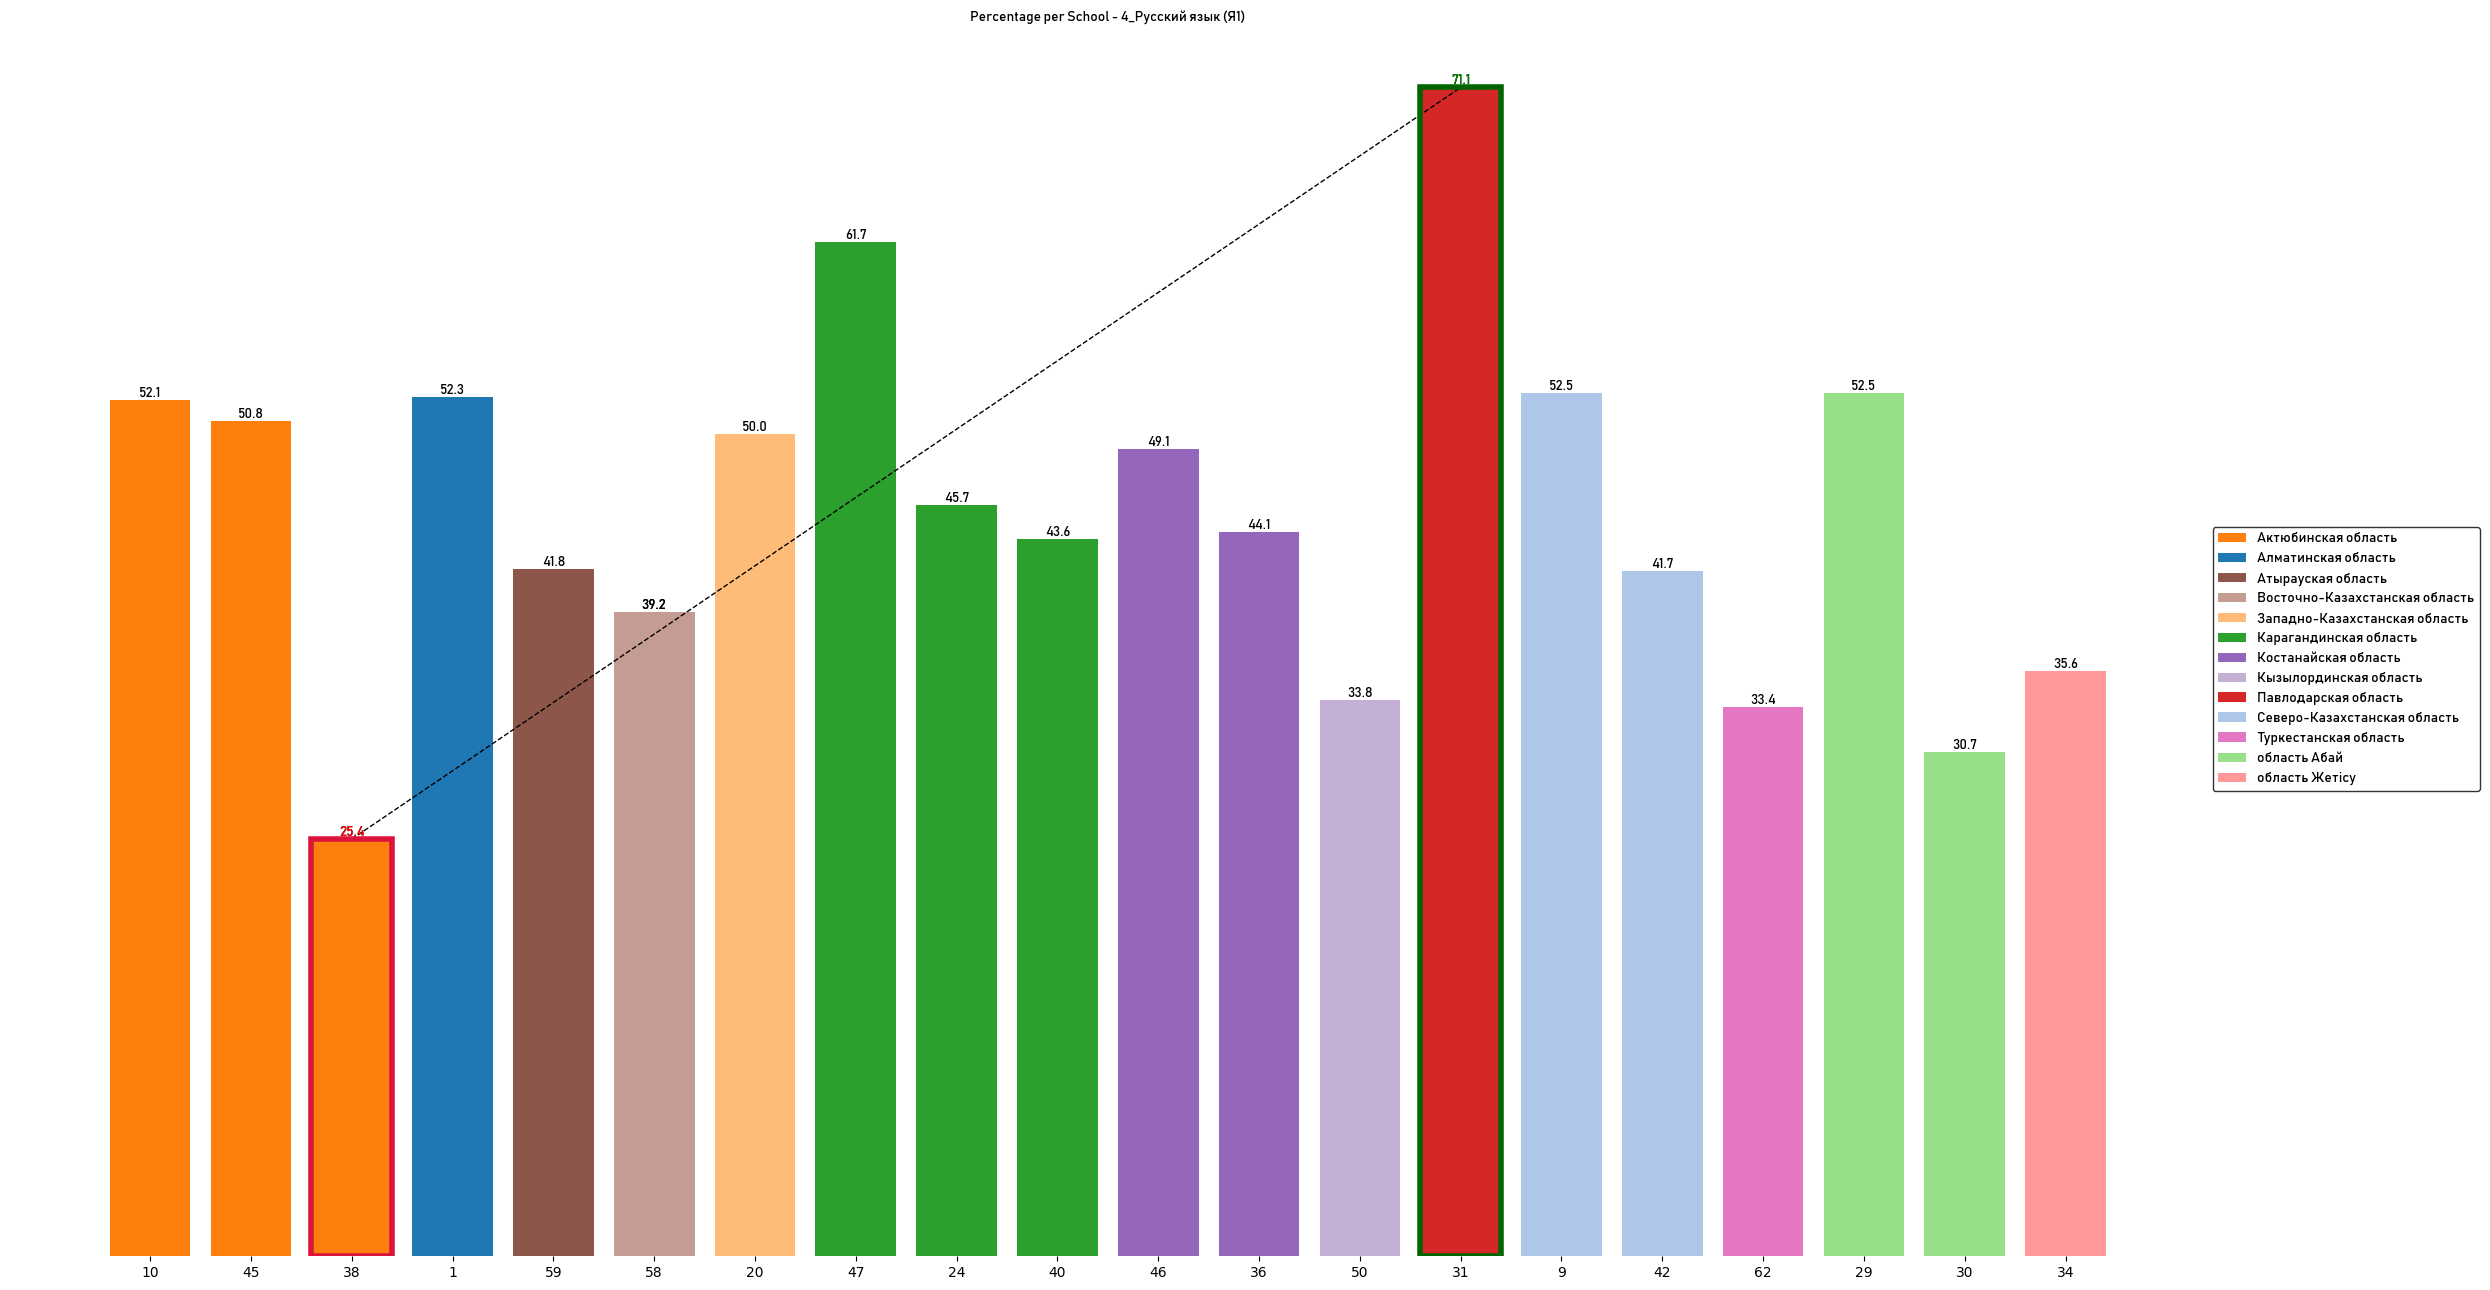

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.font_manager as fm

# Assuming 'table' is a dictionary containing DataFrames

# Specify the path to the strict and condensed font file (.ttf format)
font_path = r"C:\Users\kassenov_r\report-automation\suburban_schools\presentation\images\BAHNSCHRIFT.TTF" 

for table_name, df in tables.items():
    plt.figure(figsize=(25, 13))  # Adjust the figure size as needed for each chart
    df['school_id'] = df['school_id'].astype(str)
    
    # Replace NaN values in 'region' column with 'Unknown'
    df['region'].fillna('Unknown', inplace=True)

    regions = df['region'].unique()
    color_dict = {}

    for i, region in enumerate(regions):
        color_dict[region] = plt.cm.get_cmap('tab20')(i)

    # Exclude 'nan' string explicitly for plotting
    df_no_nan = df[df['region'] != 'nan']

    # Sorting the DataFrame by 'percent' in descending order within each 'region'
    df_sorted = df_no_nan.sort_values(by=['region', 'percent'], ascending=[True, False])

    for region, group in df_sorted.groupby('region'):
        if region in color_dict:
            bars = plt.bar(group['school_id'], group['percent'], label=region, color=color_dict[region])
        else:
            bars = plt.bar(group['school_id'], group['percent'], label=region)
    
    # Iterate through bars to find the maximum and minimum values across all regions
    all_bars = [bar for sublist in [container for container in plt.gca().containers] for bar in sublist]
    max_bar = max(all_bars, key=lambda x: x.get_height())
    min_bar = min(all_bars, key=lambda x: x.get_height())
    
    for bar in all_bars:
        height = bar.get_height()
        # Set the font properties for data labels
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                 ha='center', va='bottom', 
                 color='black', fontproperties=fm.FontProperties(fname=font_path))
        # Set the highest data label to green and the lowest to red
        if bar == max_bar:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                     ha='center', va='bottom', 
                     color='green', fontproperties=fm.FontProperties(fname=font_path))
        elif bar == min_bar:
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}',
                     ha='center', va='bottom', 
                     color='red', fontproperties=fm.FontProperties(fname=font_path))

    # Highlighting the max and min bars with rectangles
    max_rect = patches.Rectangle((max_bar.get_x(), 0), 
                                 max_bar.get_width(), max_bar.get_height(), 
                                 edgecolor='darkgreen', facecolor='none', lw=4, zorder=5)
    min_rect = patches.Rectangle((min_bar.get_x(), 0), 
                                 min_bar.get_width(), min_bar.get_height(), 
                                 edgecolor='crimson', facecolor='none', lw=4, zorder=5)

    plt.gca().add_patch(max_rect)
    plt.gca().add_patch(min_rect)
    
    # Adding a thinner dashed line between the min and max bars
    plt.plot([min_bar.get_x() + min_bar.get_width() / 2, max_bar.get_x() + max_bar.get_width() / 2],
             [min_bar.get_height(), max_bar.get_height()],
             linestyle='--', color='black', lw=1)
    
    # Set the font family to the strict and condensed font for labels and title
    prop = fm.FontProperties(fname=font_path)
    plt.xlabel('', fontproperties=prop)
    plt.title(f'Percentage per School - {table_name}', fontproperties=prop)
    legend = plt.legend(title='', bbox_to_anchor=(1, 0.6), loc='upper left', prop=prop, fontsize=50)
    legend.get_frame().set_linewidth(1)  # Adjust legend box border width
    legend.get_frame().set_edgecolor('black')  # Adjust legend box edge color
    legend.get_frame().set_facecolor('white')  # Adjust legend box face color
    plt.tick_params(axis='y', labelleft=False)  # Remove y-axis labels
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(axis='y', linestyle='')  # Remove grid lines along the y-axis
    plt.box(False)  # Remove box border around the plot
    plt.tight_layout()
    plt.savefig(rf"C:\Users\kassenov_r\report-automation\suburban_schools\presentation\images\{table_name}.png")
    plt.show()

---